# I. Modélisation statistique

In [1]:
!pip install s3fs
!pip install pandas
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn
!pip install matplotlib

## I.1. Chargement et préparation des données

### A) Importation des données

In [2]:
import pandas as pd

# Importation des données avec code_insee en index
donnees = pd.read_csv("data/bdd_finale.csv", sep=',', encoding='utf-8', index_col=0)
donnees.head()

beneficiaire_trans_eco  moyenne_conso_agri_hab  \
code_insee                                                   
22001                            0                2.994071   
22002                            0                1.283886   
22003                            0                0.000000   
22004                            0                0.200325   
22005                            0                0.121358   

            moyenne_conso_indus_hab  moyenne_conso_tertiaire_hab  \
code_insee                                                         
22001                      0.000503                     0.631181   
22002                      0.032120                     0.173206   
22003                      0.000000                     0.524098   
22004                      0.675332                     1.267791   
22005                      0.082905                     1.151104   

            moyenne_conso_residentiel_hab  moyenne_conso_totale_hab  \
code_insee                                                            
22001                            3.688905                  7.378017   
22002                            3.248865                  4.775226   
22003                            2.908468                  3.472740   
22004                            3.034877                  5.203150   
22005                            3.532942                  4.926877   

            emissions_ges  nb_actes_france_renov  friche  ecoquartiers  ...  \
code_insee                                                              ...   
22001               14871                     88       2             0  ...   
22002                8621                     38       0             0  ...   
22003                3028                     49       0             0  ...   
22004               29130                     46       6             0  ...   
22005                4136                     10       3             0  ...   

            CSP_maire  com_variation_encours_dette_ha_pct part_inactifs  \
code_insee                                                                
22001              12                                18.9     12.751678   
22002              54                               -39.3     11.062718   
22003              56                                99.8     14.239130   
22004              33                               -34.1     17.234927   
22005              77                               -14.5     14.188533   

            part_actifs  dependance_eco  abstention_municipales  \
code_insee                                                        
22001         47.147651             107                    17.4   
22002         50.522648              96                    53.8   
22003         48.804348             113                    53.7   
22004         40.540541             126                    44.8   
22005         42.371234             140                    22.9   

            taux_creation_ent  total_entreprises  part_licencies_sportifs  \
code_insee                                                                  
22001                    15.0                 20                23.825503   
22002                    12.1                 33                30.836237   
22003                    36.7                 30                35.760870   
22004                    12.6                238                24.282744   
22005                    18.8                 64                27.891156   

            part_jeunes_sans_diplome  
code_insee                            
22001                            9.1  
22002                            4.0  
22003                            0.0  
22004                           12.4  
22005                            2.6  

[5 rows x 31 columns]

### B) Formatage des données

Nous allons pouvoir observer le type des données que nous avons. Cela va nous permettre de déterminer si on a besoin de modifier certaines variables pour qu'elles soient bien en variables catégorielles.

In [3]:
donnees.dtypes

beneficiaire_trans_eco                  int64
moyenne_conso_agri_hab                float64
moyenne_conso_indus_hab               float64
moyenne_conso_tertiaire_hab           float64
moyenne_conso_residentiel_hab         float64
moyenne_conso_totale_hab              float64
emissions_ges                           int64
nb_actes_france_renov                   int64
friche                                  int64
ecoquartiers                            int64
part_residences_secondaires           float64
beneficiaire_prog                       int64
climat                                 object
gridens7                                int64
superf_choro                          float64
departement                             int64
gare_tgv                                int64
part_trajets_voiture                  float64
med_disp                                int64
an                                      int64
p_pop                                   int64
CSP_maire                         

In [4]:
# Conversion des variables en variables catégorielles
donnees["beneficiaire_trans_eco"] = donnees["beneficiaire_trans_eco"].astype('category')
donnees["ecoquartiers"] = donnees["ecoquartiers"].astype('category')
donnees["beneficiaire_prog"] = donnees["beneficiaire_prog"].astype('category')
donnees["gridens7"] = donnees["gridens7"].astype('category')
donnees["departement"] = donnees["departement"].astype('category')
donnees["gare_tgv"] = donnees["gare_tgv"].astype('category')
donnees["CSP_maire"] = donnees["CSP_maire"].astype('category')


# Cas de la variable climat
donnees = pd.get_dummies(donnees, columns = ["climat"]) # On crée des variables binaires pour la variable climat car on a des chaînes de caractères

In [5]:
donnees.dtypes

beneficiaire_trans_eco                category
moyenne_conso_agri_hab                 float64
moyenne_conso_indus_hab                float64
moyenne_conso_tertiaire_hab            float64
moyenne_conso_residentiel_hab          float64
moyenne_conso_totale_hab               float64
emissions_ges                            int64
nb_actes_france_renov                    int64
friche                                   int64
ecoquartiers                          category
part_residences_secondaires            float64
beneficiaire_prog                     category
gridens7                              category
superf_choro                           float64
departement                           category
gare_tgv                              category
part_trajets_voiture                   float64
med_disp                                 int64
an                                       int64
p_pop                                    int64
CSP_maire                             category
com_variation

Nous allons observer si on a des données manquantes dans notre jeu de données.

In [6]:
donnees.isna().sum()

beneficiaire_trans_eco                0
moyenne_conso_agri_hab                0
moyenne_conso_indus_hab               0
moyenne_conso_tertiaire_hab           0
moyenne_conso_residentiel_hab         0
moyenne_conso_totale_hab              0
emissions_ges                         0
nb_actes_france_renov                 0
friche                                0
ecoquartiers                          0
part_residences_secondaires           0
beneficiaire_prog                     0
gridens7                              0
superf_choro                          0
departement                           0
gare_tgv                              0
part_trajets_voiture                  0
med_disp                              0
an                                    0
p_pop                                 0
CSP_maire                             0
com_variation_encours_dette_ha_pct    0
part_inactifs                         0
part_actifs                           0
dependance_eco                        0


### C) Séparation de la variable à expliquer et des variables explicatives

In [7]:
# Définir X et y pour avoir les variables explicatives et la variable à expliquer beneficiaire_trans_eco
X = donnees.drop(columns=['beneficiaire_trans_eco'])

# Variable à expliquer : beneficiaire_trans_eco
y = donnees["beneficiaire_trans_eco"]

In [8]:
# import numpy as np

# # Convertir les listes en tableaux numpy
# X = np.array(X)
# y = np.array(y)

In [9]:
print("Dimensions de X:", X.shape)
print("Dimensions de y:", y.shape)

Dimensions de X: (1207, 32)
Dimensions de y: (1207,)


In [10]:
# import numpy as np

# np.unique(y)

## I.2. Modélisation

Nous allons d'abord diviser notre jeu de données en jeux d'apprentissage et de test.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [12]:
X_train.shape, y_train.shape

((965, 32), (965,))

In [13]:
X_test.shape, y_test.shape

((242, 32), (242,))

## I.2.1. Régression logistique

### A) Construction des modèles

Nous allons maintenant définir notre modèle de régression logistique, sans pénalité.

In [14]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

etapes_reg_log_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_reg_log_smote = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('smote', SMOTE(k_neighbors=5)), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_reg_log_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('adasyn', ADASYN(n_neighbors=5)), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_reg_log_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('borderline_smote', BorderlineSMOTE(k_neighbors=5)), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]


etapes_reg_log = [('std_scaler', StandardScaler()),
                   ('reg_log', LogisticRegression())

]

# Création des pipelines
modele_reg_log_smote  = Pipeline(steps=etapes_reg_log_smote)
modele_reg_log_oversampler  = Pipeline(steps=etapes_reg_log_oversampler)
modele_reg_log_adasyn  = Pipeline(steps=etapes_reg_log_adasyn)
modele_reg_log_borderline_smote  = Pipeline(steps=etapes_reg_log_borderline_smote)
modele_reg_log  = Pipeline(steps=etapes_reg_log)

On entraîne le modèle sur les données pour estimer les coefficients.

In [15]:
modele_reg_log_smote.fit(X_train, y_train)
modele_reg_log_oversampler.fit(X_train, y_train)
modele_reg_log_adasyn.fit(X_train, y_train)
modele_reg_log_borderline_smote.fit(X_train, y_train)
modele_reg_log.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('reg_log', LogisticRegression())])

On cherche à prédire de nouvelles données grâce aux données test

In [16]:
y_proba_reg_log_smote = modele_reg_log_smote.predict_proba(X_test)[:,1]
y_pred_reg_log_smote = modele_reg_log_smote.predict(X_test)

y_proba_reg_log_oversampler = modele_reg_log_oversampler.predict_proba(X_test)[:, 1]
y_pred_reg_log_oversampler = modele_reg_log_oversampler.predict(X_test)

y_proba_reg_log_adasyn = modele_reg_log_adasyn.predict_proba(X_test)[:, 1]
y_pred_reg_log_adasyn = modele_reg_log_adasyn.predict(X_test)

y_proba_reg_log_borderline_smote = modele_reg_log_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_reg_log_borderline_smote = modele_reg_log_borderline_smote.predict(X_test)

y_proba_reg_log = modele_reg_log.predict_proba(X_test)[:, 1]
y_pred_reg_log = modele_reg_log.predict(X_test)

### B) Mesure de la performance des modèles initiaux

Nous allons maintenant évaluer la performance de notre modèle

In [17]:
from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score


# Calcul des métriques
auc_roc_reg_log_smote = roc_auc_score(y_test, y_proba_reg_log_smote)
auc_pr_reg_log_smote  = average_precision_score(y_test, y_proba_reg_log_smote)
log_loss_value_reg_log_smote  = log_loss(y_test, y_proba_reg_log_smote)
precision_reg_log_smote  = precision_score(y_test, y_pred_reg_log_smote)
recall_reg_log_smote  = recall_score(y_test, y_pred_reg_log_smote)
f1_reg_log_smote = f1_score(y_test, y_pred_reg_log_smote)
mcc_reg_log_smote  = matthews_corrcoef(y_test, y_pred_reg_log_smote)
balanced_acc_reg_log_smote  = balanced_accuracy_score(y_test, y_pred_reg_log_smote)
specificity_reg_log_smote  = confusion_matrix(y_test, y_pred_reg_log_smote)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_smote)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_smote)[0, 1])
cohen_kappa_reg_log_smote  = cohen_kappa_score(y_test, y_pred_reg_log_smote)

In [18]:
# Calcul des métriques

# Calcul des métriques
auc_roc_reg_log_oversampler = roc_auc_score(y_test, y_proba_reg_log_oversampler)
auc_pr_reg_log_oversampler = average_precision_score(y_test, y_proba_reg_log_oversampler)
log_loss_value_reg_log_oversampler = log_loss(y_test, y_proba_reg_log_oversampler)
precision_reg_log_oversampler = precision_score(y_test, y_pred_reg_log_oversampler)
recall_reg_log_oversampler = recall_score(y_test, y_pred_reg_log_oversampler)
f1_reg_log_oversampler = f1_score(y_test, y_pred_reg_log_oversampler)
mcc_reg_log_oversampler = matthews_corrcoef(y_test, y_pred_reg_log_oversampler)
balanced_acc_reg_log_oversampler = balanced_accuracy_score(y_test, y_pred_reg_log_oversampler)
specificity_reg_log_oversampler = confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 1])
cohen_kappa_reg_log_oversampler = cohen_kappa_score(y_test, y_pred_reg_log_oversampler)

In [19]:
# Calcul des métriques

# Calcul des métriques
auc_roc_reg_log_adasyn = roc_auc_score(y_test, y_proba_reg_log_adasyn)
auc_pr_reg_log_adasyn = average_precision_score(y_test, y_proba_reg_log_adasyn)
log_loss_value_reg_log_adasyn = log_loss(y_test, y_proba_reg_log_adasyn)
precision_reg_log_adasyn = precision_score(y_test, y_pred_reg_log_adasyn)
recall_reg_log_adasyn = recall_score(y_test, y_pred_reg_log_adasyn)
f1_reg_log_adasyn = f1_score(y_test, y_pred_reg_log_adasyn)
mcc_reg_log_adasyn = matthews_corrcoef(y_test, y_pred_reg_log_adasyn)
balanced_acc_reg_log_adasyn = balanced_accuracy_score(y_test, y_pred_reg_log_adasyn)
specificity_reg_log_adasyn = confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 1])
cohen_kappa_reg_log_adasyn = cohen_kappa_score(y_test, y_pred_reg_log_adasyn)

In [20]:
# Calcul des métriques

auc_roc_reg_log_borderline_smote = roc_auc_score(y_test, y_proba_reg_log_borderline_smote)
auc_pr_reg_log_borderline_smote = average_precision_score(y_test, y_proba_reg_log_borderline_smote)
log_loss_value_reg_log_borderline_smote = log_loss(y_test, y_proba_reg_log_borderline_smote)
precision_reg_log_borderline_smote = precision_score(y_test, y_pred_reg_log_borderline_smote)
recall_reg_log_borderline_smote = recall_score(y_test, y_pred_reg_log_borderline_smote)
f1_reg_log_borderline_smote = f1_score(y_test, y_pred_reg_log_borderline_smote)
mcc_reg_log_borderline_smote = matthews_corrcoef(y_test, y_pred_reg_log_borderline_smote)
balanced_acc_reg_log_borderline_smote = balanced_accuracy_score(y_test, y_pred_reg_log_borderline_smote)
specificity_reg_log_borderline_smote = confusion_matrix(y_test, y_pred_reg_log_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_borderline_smote)[0, 1])
cohen_kappa_reg_log_borderline_smote = cohen_kappa_score(y_test, y_pred_reg_log_borderline_smote)


In [21]:
auc_roc_reg_log = roc_auc_score(y_test, y_proba_reg_log)
auc_pr_reg_log = average_precision_score(y_test, y_proba_reg_log)
log_loss_value_reg_log = log_loss(y_test, y_proba_reg_log)
precision_reg_log = precision_score(y_test, y_pred_reg_log)
recall_reg_log = recall_score(y_test, y_pred_reg_log)
f1_reg_log = f1_score(y_test, y_pred_reg_log)
mcc_reg_log = matthews_corrcoef(y_test, y_pred_reg_log)
balanced_acc_reg_log = balanced_accuracy_score(y_test, y_pred_reg_log)
specificity_reg_log = confusion_matrix(y_test, y_pred_reg_log)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log)[0, 0] + confusion_matrix(y_test, y_pred_reg_log)[0, 1])
cohen_kappa_reg_log = cohen_kappa_score(y_test, y_pred_reg_log)

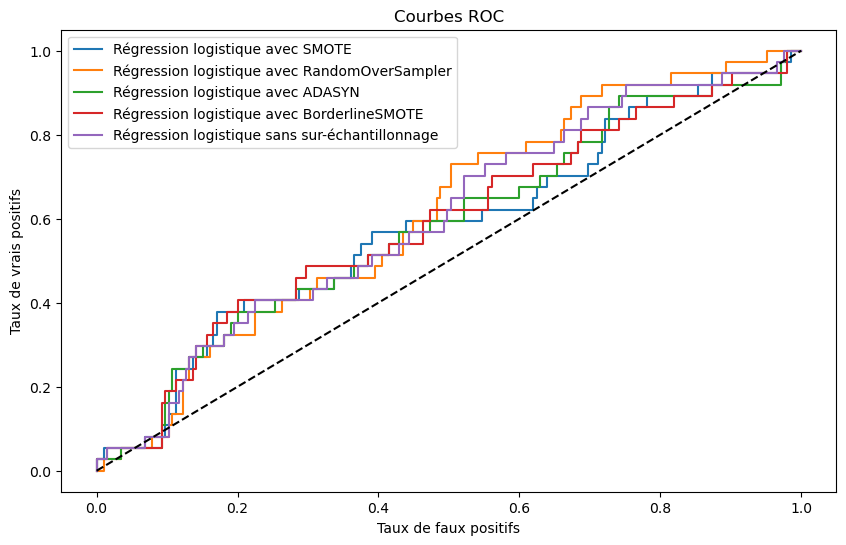

In [22]:
# Comparaison des courbes ROC

from sklearn.metrics import roc_curve

fpr_reg_log_smote, tpr_reg_log_smote, _ = roc_curve(y_test, y_proba_reg_log_smote)
fpr_reg_log_oversampler, tpr_reg_log_oversampler, _ = roc_curve(y_test, y_proba_reg_log_oversampler)
fpr_reg_log_adasyn, tpr_reg_log_adasyn, _ = roc_curve(y_test, y_proba_reg_log_adasyn)
fpr_reg_log_borderline_smote, tpr_reg_log_borderline_smote, _ = roc_curve(y_test, y_proba_reg_log_borderline_smote)
fpr_reg_log, tpr_reg_log, _ = roc_curve(y_test, y_proba_reg_log)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fpr_reg_log_smote, tpr_reg_log_smote, label='Régression logistique avec SMOTE')
plt.plot(fpr_reg_log_oversampler, tpr_reg_log_oversampler, label='Régression logistique avec RandomOverSampler')
plt.plot(fpr_reg_log_adasyn, tpr_reg_log_adasyn, label='Régression logistique avec ADASYN')
plt.plot(fpr_reg_log_borderline_smote, tpr_reg_log_borderline_smote, label='Régression logistique avec BorderlineSMOTE')
plt.plot(fpr_reg_log, tpr_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()


# Export de l'image 
plt.savefig('data/Courbes_ROC_reg_log.png')

plt.show()

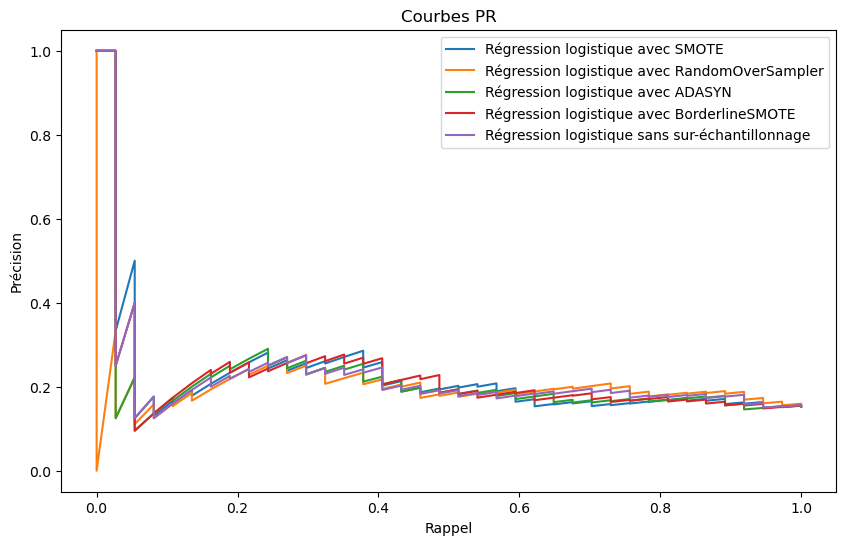

In [23]:
# Comparaison des courbes PR

from sklearn.metrics import precision_recall_curve

precision_reg_log_smote, recall_reg_log_smote, _ = precision_recall_curve(y_test, y_proba_reg_log_smote)
precision_reg_log_oversampler, recall_reg_log_oversampler, _ = precision_recall_curve(y_test, y_proba_reg_log_oversampler)
precision_reg_log_adasyn, recall_reg_log_adasyn, _ = precision_recall_curve(y_test, y_proba_reg_log_adasyn)
precision_reg_log_borderline_smote, recall_reg_log_borderline_smote, _ = precision_recall_curve(y_test, y_proba_reg_log_borderline_smote)
precision_reg_log, recall_reg_log, _ = precision_recall_curve(y_test, y_proba_reg_log)

plt.figure(figsize=(10, 6))
plt.plot(recall_reg_log_smote, precision_reg_log_smote, label='Régression logistique avec SMOTE')
plt.plot(recall_reg_log_oversampler, precision_reg_log_oversampler, label='Régression logistique avec RandomOverSampler')
plt.plot(recall_reg_log_adasyn, precision_reg_log_adasyn, label='Régression logistique avec ADASYN')
plt.plot(recall_reg_log_borderline_smote, precision_reg_log_borderline_smote, label='Régression logistique avec BorderlineSMOTE')
plt.plot(recall_reg_log, precision_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbes PR')
plt.legend()
plt.show()

In [24]:
# Résultats

resultats_reg_log = pd.DataFrame({
    "Régression logistique sans sur-échantillonnage": [auc_roc_reg_log, auc_pr_reg_log, f1_reg_log,  balanced_acc_reg_log],
    "Régression logistique avec SMOTE": [auc_roc_reg_log_smote, auc_pr_reg_log_smote, f1_reg_log_smote, balanced_acc_reg_log_smote],
    "Régression logistique avec RandomOverSampler": [auc_roc_reg_log_oversampler, auc_pr_reg_log_oversampler,  f1_reg_log_oversampler, balanced_acc_reg_log_oversampler],
    "Régression logistique avec ADASYN": [auc_roc_reg_log_adasyn, auc_pr_reg_log_adasyn, f1_reg_log_adasyn, balanced_acc_reg_log_adasyn],
    "Régression logistique avec BorderlineSMOTE": [auc_roc_reg_log_borderline_smote, auc_pr_reg_log_borderline_smote,  f1_reg_log_borderline_smote, balanced_acc_reg_log_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_reg_log = resultats_reg_log.round(3)
resultats_reg_log

Régression logistique sans sur-échantillonnage  \
AUC-ROC                                                     0.600   
AUC-PR                                                      0.228   
F1-score                                                    0.050   
Balanced accuracy                                           0.509   

                   Régression logistique avec SMOTE  \
AUC-ROC                                       0.581   
AUC-PR                                        0.229   
F1-score                                      0.270   
Balanced accuracy                             0.554   

                   Régression logistique avec RandomOverSampler  \
AUC-ROC                                                   0.610   
AUC-PR                                                    0.204   
F1-score                                                  0.154   
Balanced accuracy                                         0.511   

                   Régression logistique avec ADASYN  \
AUC-ROC                                        0.581   
AUC-PR                                         0.221   
F1-score                                       0.281   
Balanced accuracy                              0.564   

                   Régression logistique avec BorderlineSMOTE  
AUC-ROC                                                 0.590  
AUC-PR                                                  0.230  
F1-score                                                0.277  
Balanced accuracy                                       0.560

In [25]:
# Export des résultats en lateX

# Export des résultats
resultats_reg_log.to_csv("data/resultats_reg_log.csv", index=True)
latex_table_reg_log = resultats_reg_log.to_latex(index=True)
print(latex_table_reg_log)

\begin{tabular}{lrrrrr}
\toprule
 & Régression logistique sans sur-échantillonnage & Régression logistique avec SMOTE & Régression logistique avec RandomOverSampler & Régression logistique avec ADASYN & Régression logistique avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.600000 & 0.581000 & 0.610000 & 0.581000 & 0.590000 \\
AUC-PR & 0.228000 & 0.229000 & 0.204000 & 0.221000 & 0.230000 \\
F1-score & 0.050000 & 0.270000 & 0.154000 & 0.281000 & 0.277000 \\
Balanced accuracy & 0.509000 & 0.554000 & 0.511000 & 0.564000 & 0.560000 \\
\bottomrule
\end{tabular}



### C) Ajustement des hyperparamètres

Pour la régression logistique, les hyperparamètres les plus courants à optimiser sont :
- C : Ce paramètre de régularisation inverse. Une valeur plus petite indique une régularisation plus forte.
- solver : L'algorithme utilisé pour l'optimisation. Les choix courants sont 'liblinear', 'lbfgs', 'saga', etc.
- penalty : Le type de régularisation à utiliser ('l1', 'l2', 'elasticnet', 'none')
- fonction de lien

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score, roc_auc_score

# Définir les grilles de paramètres pour chaque pipeline
param_grid_reg_log_oversampler = {
    'oversampler__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1.0],
    'reg_log__C': [0.01, 0.1, 1, 10, 100], # Inverse de la force de régularisation : pas d'utilité pour la régression logistique sans régularisation
    'reg_log__penalty': ['l2', 'none'],  # Compatible avec solver='saga'
    'reg_log__solver': ['saga']
}

param_grid_reg_log_smote = {
    'smote__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1.0],
    'smote__k_neighbors': [3, 5, 7],
    'reg_log__C': [0.01, 0.1, 1, 10, 100], # Inverse de la force de régularisation : pas d'utilité pour la régression logistique sans régularisation
    'reg_log__penalty': ['l2', 'none'],  # Compatible avec solver='saga'
    'reg_log__solver': ['saga']
}

param_grid_reg_log_adasyn = {
    'adasyn__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1.0],
    'adasyn__n_neighbors': [3, 5, 7],
    'reg_log__penalty': ['l2', 'none'],  # Compatible avec solver='saga'
    'reg_log__solver': ['saga'],
    'reg_log__C': [0.01, 0.1, 1, 10, 100], # Inverse de la force de régularisation 
}

param_grid_reg_log_borderline_smote = {
    'borderline_smote__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1.0],
    'borderline_smote__k_neighbors': [3, 5, 7],
    'reg_log__C': [0.01, 0.1, 1, 10, 100], # Inverse de la force de régularisation : pas d'utilité pour la régression logistique sans régularisation
    'reg_log__penalty': ['l2', 'none'],  # Compatible avec solver='saga'
    'reg_log__solver': ['saga']
}

grille_param_reg_log_ = {
    'reg_log__C': [0.01, 0.1, 1, 10, 100], # Inverse de la force de régularisation : pas d'utilité pour la régression logistique sans régularisation
    'reg_log__penalty': ['l2', 'none'],  # Compatible avec solver='saga'
    'reg_log__solver': ['saga']
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score)
}

# Création des GridSearchCV pour chaque pipeline
grille_recherche_reg_log_oversampler = RandomizedSearchCV(
    estimator=modele_reg_log_oversampler,
    param_distributions=param_grid_reg_log_oversampler,
    scoring=scoring,
    refit = 'AUC',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grille_recherche_reg_log_smote = RandomizedSearchCV(
    estimator=modele_reg_log_smote,
    param_distributions=param_grid_reg_log_smote,
    scoring=scoring,
    refit = 'AUC',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grille_recherche_reg_log_adasyn = RandomizedSearchCV(
    estimator=modele_reg_log_adasyn,
    param_distributions=param_grid_reg_log_adasyn,
    scoring=scoring,
    refit = 'AUC',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grille_recherche_reg_log_borderline_smote = RandomizedSearchCV(
    estimator=modele_reg_log_borderline_smote,
    param_distributions=param_grid_reg_log_borderline_smote,
    scoring=scoring,
    refit = 'AUC',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grille_recherche_reg_log = RandomizedSearchCV(
    estimator= modele_reg_log,
    param_distributions=grille_param_reg_log_,
    scoring=scoring,
    refit = 'AUC',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [27]:
# Récupération des meilleurs modèles

modele_reg_log_oversampler_opt = grille_recherche_reg_log_oversampler.fit(X_train, y_train).best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y,

In [28]:
modele_reg_log_smote_opt = grille_recherche_reg_log_smote.fit(X_train, y_train).best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, 

In [29]:
modele_reg_log_adasyn_opt = grille_recherche_reg_log_adasyn.fit(X_train, y_train).best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y,

In [30]:
modele_reg_log_borderline_smote_opt = grille_recherche_reg_log_borderline_smote.fit(X_train, y_train).best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y,

In [31]:
modele_reg_log_opt = grille_recherche_reg_log.fit(X_train, y_train).best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [32]:
# Affichage des meilleurs paramètres pour chaque pipeline
print("Meilleurs paramètres pour la régression logistique avec RandomOverSampler:", modele_reg_log_oversampler_opt)
print("Meilleurs paramètres pour la régression logistique avec SMOTE:", modele_reg_log_smote_opt)
print("Meilleurs paramètres pour la régression logistique avec ADASYN:", modele_reg_log_adasyn_opt)
print("Meilleurs paramètres pour la régression logistique avec BorderlineSMOTE:", modele_reg_log_borderline_smote_opt)
print("Meilleurs paramètres pour la régression logistique sans sur-échantillonnage:", modele_reg_log_opt)

Meilleurs paramètres pour la régression logistique avec RandomOverSampler: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler(sampling_strategy=1.0)),
                ('reg_log', LogisticRegression(C=0.1, solver='saga'))])
Meilleurs paramètres pour la régression logistique avec SMOTE: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('smote', SMOTE(k_neighbors=7, sampling_strategy=1.0)),
                ('reg_log',
                 LogisticRegression(C=0.01, penalty='none', solver='saga'))])
Meilleurs paramètres pour la régression logistique avec ADASYN: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('adasyn', ADASYN(n_neighbors=3, sampling_strategy=0.75)),
                ('reg_log',
                 LogisticRegression(C=0.1, penalty='none', solver='saga'))])
Meilleurs paramètres pour la régression logistique avec BorderlineSMOTE: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('bo

In [33]:
# Entraînement des meilleurs modèles

modele_reg_log_oversampler_opt.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler(sampling_strategy=1.0)),
                ('reg_log', LogisticRegression(C=0.1, solver='saga'))])

In [34]:
modele_reg_log_smote_opt.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('smote', SMOTE(k_neighbors=7, sampling_strategy=1.0)),
                ('reg_log',
                 LogisticRegression(C=0.01, penalty='none', solver='saga'))])

In [35]:
modele_reg_log_adasyn_opt.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('adasyn', ADASYN(n_neighbors=3, sampling_strategy=0.75)),
                ('reg_log',
                 LogisticRegression(C=0.1, penalty='none', solver='saga'))])

In [36]:
modele_reg_log_borderline_smote_opt.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('borderline_smote', BorderlineSMOTE(sampling_strategy=0.75)),
                ('reg_log',
                 LogisticRegression(C=0.1, penalty='none', solver='saga'))])

In [37]:
modele_reg_log_opt.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('reg_log', LogisticRegression(C=0.1, solver='saga'))])

In [38]:
# Prédiction sur l'échantillon test
y_proba_reg_log_smote_cv = modele_reg_log_smote_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_smote_cv = modele_reg_log_smote_opt.predict(X_test)

y_proba_reg_log_oversampler_cv = modele_reg_log_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_oversampler_cv = modele_reg_log_oversampler_opt.predict(X_test)

y_proba_reg_log_adasyn_cv = modele_reg_log_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_adasyn_cv = modele_reg_log_adasyn_opt.predict(X_test)

y_proba_reg_log_borderline_smote_cv = modele_reg_log_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_borderline_smote_cv = modele_reg_log_borderline_smote_opt.predict(X_test)

y_proba_reg_log_cv = modele_reg_log_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_cv = modele_reg_log_opt.predict(X_test)


### D) Mesure de la performance des modèles optimisés

In [39]:
# Calcul des métriques pour chaque modèle

# Calcul des métriques
auc_roc_reg_log_smote_cv = roc_auc_score(y_test, y_proba_reg_log_smote_cv)
auc_pr_reg_log_smote_cv = average_precision_score(y_test, y_proba_reg_log_smote_cv)
log_loss_value_reg_log_smote_cv = log_loss(y_test, y_proba_reg_log_smote_cv)
precision_reg_log_smote_cv = precision_score(y_test, y_pred_reg_log_smote_cv)
recall_reg_log_smote_cv = recall_score(y_test, y_pred_reg_log_smote_cv)
f1_reg_log_smote_cv = f1_score(y_test, y_pred_reg_log_smote_cv)
mcc_reg_log_smote_cv = matthews_corrcoef(y_test, y_pred_reg_log_smote_cv)
balanced_acc_reg_log_smote_cv = balanced_accuracy_score(y_test, y_pred_reg_log_smote_cv)
specificity_reg_log_smote_cv = confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 1])
cohen_kappa_reg_log_smote_cv = cohen_kappa_score(y_test, y_pred_reg_log_smote_cv)

In [40]:
auc_roc_reg_log_oversampler_cv = roc_auc_score(y_test, y_proba_reg_log_oversampler_cv)
auc_pr_reg_log_oversampler_cv = average_precision_score(y_test, y_proba_reg_log_oversampler_cv)
log_loss_value_reg_log_oversampler_cv = log_loss(y_test, y_proba_reg_log_oversampler_cv)
precision_reg_log_oversampler_cv = precision_score(y_test, y_pred_reg_log_oversampler_cv)
recall_reg_log_oversampler_cv = recall_score(y_test, y_pred_reg_log_oversampler_cv)
f1_reg_log_oversampler_cv = f1_score(y_test, y_pred_reg_log_oversampler_cv)
mcc_reg_log_oversampler_cv = matthews_corrcoef(y_test, y_pred_reg_log_oversampler_cv)
balanced_acc_reg_log_oversampler_cv = balanced_accuracy_score(y_test, y_pred_reg_log_oversampler_cv)
specificity_reg_log_oversampler_cv = confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 1])
cohen_kappa_reg_log_oversampler_cv = cohen_kappa_score(y_test, y_pred_reg_log_oversampler_cv)

In [41]:
auc_roc_reg_log_adasyn_cv = roc_auc_score(y_test, y_proba_reg_log_adasyn_cv)
auc_pr_reg_log_adasyn_cv = average_precision_score(y_test, y_proba_reg_log_adasyn_cv)
log_loss_value_reg_log_adasyn_cv = log_loss(y_test, y_proba_reg_log_adasyn_cv)
precision_reg_log_adasyn_cv = precision_score(y_test, y_pred_reg_log_adasyn_cv)
recall_reg_log_adasyn_cv = recall_score(y_test, y_pred_reg_log_adasyn_cv)
f1_reg_log_adasyn_cv = f1_score(y_test, y_pred_reg_log_adasyn_cv)
mcc_reg_log_adasyn_cv = matthews_corrcoef(y_test, y_pred_reg_log_adasyn_cv)
balanced_acc_reg_log_adasyn_cv = balanced_accuracy_score(y_test, y_pred_reg_log_adasyn_cv)
specificity_reg_log_adasyn_cv = confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 1])
cohen_kappa_reg_log_adasyn_cv = cohen_kappa_score(y_test, y_pred_reg_log_adasyn_cv)

In [42]:
auc_roc_reg_log_borderline_smote = roc_auc_score(y_test, y_proba_reg_log_borderline_smote_cv)
auc_pr_reg_log_borderline_smote = average_precision_score(y_test, y_proba_reg_log_borderline_smote_cv)
log_loss_value_reg_log_borderline_smote = log_loss(y_test, y_proba_reg_log_borderline_smote_cv)
precision_reg_log_borderline_smote = precision_score(y_test, y_pred_reg_log_borderline_smote_cv)
recall_reg_log_borderline_smote = recall_score(y_test, y_pred_reg_log_borderline_smote_cv)
f1_reg_log_borderline_smote = f1_score(y_test, y_pred_reg_log_borderline_smote_cv)
mcc_reg_log_borderline_smote = matthews_corrcoef(y_test, y_pred_reg_log_borderline_smote_cv)
balanced_acc_reg_log_borderline_smote = balanced_accuracy_score(y_test, y_pred_reg_log_borderline_smote_cv)
specificity_reg_log_borderline_smote = confusion_matrix(y_test, y_pred_reg_log_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_borderline_smote_cv)[0, 1])
cohen_kappa_reg_log_borderline_smote = cohen_kappa_score(y_test, y_pred_reg_log_borderline_smote_cv)

In [43]:
auc_roc_reg_log_cv = roc_auc_score(y_test, y_proba_reg_log_cv)
auc_pr_reg_log_cv = average_precision_score(y_test, y_proba_reg_log_cv)
log_loss_value_reg_log_cv = log_loss(y_test, y_proba_reg_log_cv)
precision_reg_log_cv = precision_score(y_test, y_pred_reg_log_cv)
recall_reg_log_cv = recall_score(y_test, y_pred_reg_log_cv)
f1_reg_log_cv = f1_score(y_test, y_pred_reg_log_cv)
mcc_reg_log_cv = matthews_corrcoef(y_test, y_pred_reg_log_cv)
balanced_acc_reg_log_cv = balanced_accuracy_score(y_test, y_pred_reg_log_cv)
specificity_reg_log_cv = confusion_matrix(y_test, y_pred_reg_log_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_cv)[0, 1])
cohen_kappa_reg_log_cv = cohen_kappa_score(y_test, y_pred_reg_log_cv)

In [44]:
# Affichage des résultats

resultats_reg_log_cv = pd.DataFrame({
    "Régression logistique sans sur-échantillonnage": [auc_roc_reg_log_cv, auc_pr_reg_log_cv, f1_reg_log_cv, balanced_acc_reg_log_cv],
    "Régression logistique avec SMOTE": [auc_roc_reg_log_smote_cv, auc_pr_reg_log_smote_cv, f1_reg_log_smote_cv, balanced_acc_reg_log_smote_cv],
    "Régression logistique avec RandomOverSampler": [auc_roc_reg_log_oversampler_cv, auc_pr_reg_log_oversampler_cv, f1_reg_log_oversampler_cv, balanced_acc_reg_log_oversampler_cv],
    "Régression logistique avec ADASYN": [auc_roc_reg_log_adasyn_cv, auc_pr_reg_log_adasyn_cv, f1_reg_log_adasyn_cv, balanced_acc_reg_log_adasyn_cv,],
    "Régression logistique avec BorderlineSMOTE": [auc_roc_reg_log_borderline_smote, auc_pr_reg_log_borderline_smote, f1_reg_log_borderline_smote, balanced_acc_reg_log_borderline_smote]},
    index = ["AUC-ROC", "AUC-PR", "F1-score","Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_reg_log_cv = resultats_reg_log_cv.round(3)
resultats_reg_log_cv

Régression logistique sans sur-échantillonnage  \
AUC-ROC                                                     0.589   
AUC-PR                                                      0.229   
F1-score                                                    0.050   
Balanced accuracy                                           0.509   

                   Régression logistique avec SMOTE  \
AUC-ROC                                       0.586   
AUC-PR                                        0.206   
F1-score                                      0.279   
Balanced accuracy                             0.562   

                   Régression logistique avec RandomOverSampler  \
AUC-ROC                                                   0.594   
AUC-PR                                                    0.231   
F1-score                                                  0.276   
Balanced accuracy                                         0.561   

                   Régression logistique avec ADASYN  \
AUC-ROC                                        0.587   
AUC-PR                                         0.222   
F1-score                                       0.292   
Balanced accuracy                              0.579   

                   Régression logistique avec BorderlineSMOTE  
AUC-ROC                                                 0.595  
AUC-PR                                                  0.210  
F1-score                                                0.286  
Balanced accuracy                                       0.573

In [45]:
# Export des résultats
resultats_reg_log_cv.to_csv("data/resultats_reg_log_opt.csv", index=True)
latex_table_reg_log = resultats_reg_log_cv.to_latex(index=True)
print(latex_table_reg_log)

\begin{tabular}{lrrrrr}
\toprule
 & Régression logistique sans sur-échantillonnage & Régression logistique avec SMOTE & Régression logistique avec RandomOverSampler & Régression logistique avec ADASYN & Régression logistique avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.589000 & 0.586000 & 0.594000 & 0.587000 & 0.595000 \\
AUC-PR & 0.229000 & 0.206000 & 0.231000 & 0.222000 & 0.210000 \\
F1-score & 0.050000 & 0.279000 & 0.276000 & 0.292000 & 0.286000 \\
Balanced accuracy & 0.509000 & 0.562000 & 0.561000 & 0.579000 & 0.573000 \\
\bottomrule
\end{tabular}



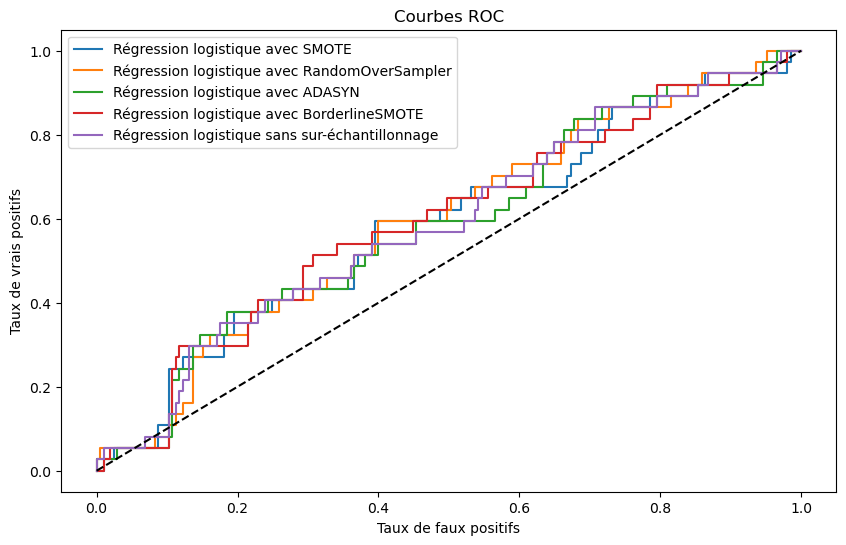

In [46]:
# Comparaison des courbes ROC

fpr_reg_log_smote_cv, tpr_reg_log_smote_cv, _ = roc_curve(y_test, y_proba_reg_log_smote_cv)
fpr_reg_log_oversampler_cv, tpr_reg_log_oversampler_cv, _ = roc_curve(y_test, y_proba_reg_log_oversampler_cv)
fpr_reg_log_adasyn_cv, tpr_reg_log_adasyn_cv, _ = roc_curve(y_test, y_proba_reg_log_adasyn_cv)
fpr_reg_log_borderline_smote_cv, tpr_reg_log_borderline_smote_cv, _ = roc_curve(y_test, y_proba_reg_log_borderline_smote_cv)
fpr_reg_log, tpr_reg_log, _ = roc_curve(y_test, y_proba_reg_log_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_reg_log_smote_cv, tpr_reg_log_smote_cv, label='Régression logistique avec SMOTE')
plt.plot(fpr_reg_log_oversampler_cv, tpr_reg_log_oversampler_cv, label='Régression logistique avec RandomOverSampler')
plt.plot(fpr_reg_log_adasyn_cv, tpr_reg_log_adasyn_cv, label='Régression logistique avec ADASYN')
plt.plot(fpr_reg_log_borderline_smote_cv, tpr_reg_log_borderline_smote_cv, label='Régression logistique avec BorderlineSMOTE')
plt.plot(fpr_reg_log, tpr_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_reg_log_cv.png')

plt.show()



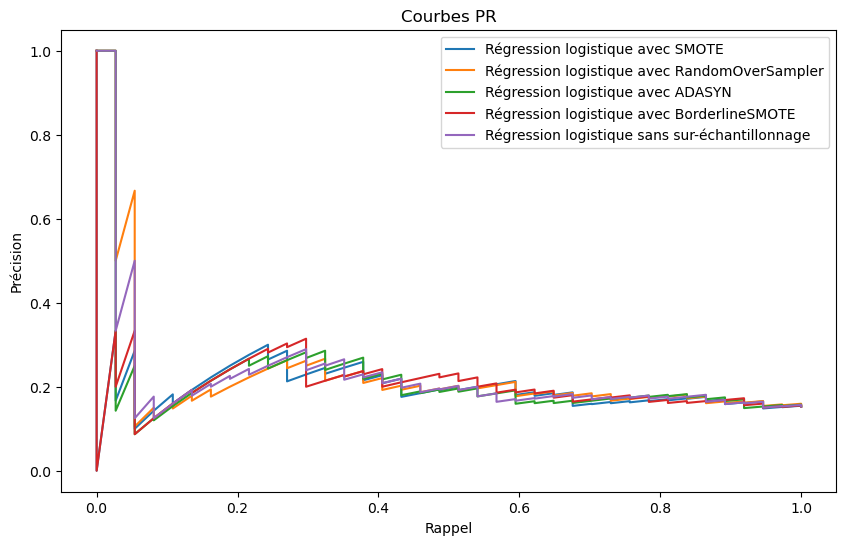

In [47]:
# Comparaison des courbes PR

precision_reg_log_smote_cv, recall_reg_log_smote_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_smote_cv)
precision_reg_log_oversampler_cv, recall_reg_log_oversampler_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_oversampler_cv)
precision_reg_log_adasyn_cv, recall_reg_log_adasyn_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_adasyn_cv)
precision_reg_log_borderline_smote_cv, recall_reg_log_borderline_smote_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_borderline_smote_cv)
precision_reg_log_cv, recall_reg_log_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_cv)

plt.figure(figsize=(10, 6))
plt.plot(recall_reg_log_smote_cv, precision_reg_log_smote_cv, label='Régression logistique avec SMOTE')
plt.plot(recall_reg_log_oversampler_cv, precision_reg_log_oversampler_cv, label='Régression logistique avec RandomOverSampler')
plt.plot(recall_reg_log_adasyn_cv, precision_reg_log_adasyn_cv, label='Régression logistique avec ADASYN')
plt.plot(recall_reg_log_borderline_smote_cv, precision_reg_log_borderline_smote_cv, label='Régression logistique avec BorderlineSMOTE')
plt.plot(recall_reg_log_cv, precision_reg_log_cv, label='Régression logistique sans sur-échantillonnage')

plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbes PR')

plt.legend()
plt.show()

### E) Importance des variables

In [48]:
# Importance des variables

# Récupération des coefficients de la régression logistique
coefficients_reg_log_smote = modele_reg_log_smote_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log_oversampler = modele_reg_log_oversampler_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log_adasyn = modele_reg_log_adasyn_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log_borderline_smote = modele_reg_log_borderline_smote_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log = modele_reg_log_opt.named_steps['reg_log'].coef_[0]

# Récupération des noms des variables
noms_variables = X.columns

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_reg_log_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_smote
})

resultats_importance_variables_reg_log_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_oversampler
})

resultats_importance_variables_reg_log_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_adasyn
})

resultats_importance_variables_reg_log_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_borderline_smote
})

resultats_importance_variables_reg_log = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log
})

# Affichage des résultats
resultats_importance_variables_reg_log_smote = resultats_importance_variables_reg_log_smote.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_oversampler = resultats_importance_variables_reg_log_oversampler.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_adasyn = resultats_importance_variables_reg_log_adasyn.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_borderline_smote = resultats_importance_variables_reg_log_borderline_smote.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log = resultats_importance_variables_reg_log.sort_values(by="Coefficient", ascending=False)

resultats_importance_variables_reg_log_smote

Variable  Coefficient
12                        superf_choro     0.563170
24              abstention_municipales     0.277498
15                part_trajets_voiture     0.202606
18                               p_pop     0.156963
27             part_licencies_sportifs     0.106855
6                nb_actes_france_renov     0.105113
31                          climat_Mer     0.098103
0               moyenne_conso_agri_hab     0.083911
21                       part_inactifs     0.071034
26                   total_entreprises     0.055629
20  com_variation_encours_dette_ha_pct     0.034196
30                     climat_Estuaire     0.031449
19                           CSP_maire     0.022942
14                            gare_tgv     0.020504
17                                  an     0.000000
8                         ecoquartiers    -0.009346
1              moyenne_conso_indus_hab    -0.016964
2          moyenne_conso_tertiaire_hab    -0.038982
4             moyenne_conso_totale_hab    -0.042211
28            part_jeunes_sans_diplome    -0.060129
7                               friche    -0.066915
23                      dependance_eco    -0.095019
29                        climat_Autre    -0.104092
10                   beneficiaire_prog    -0.123595
3        moyenne_conso_residentiel_hab    -0.125101
16                            med_disp    -0.145816
25                   taux_creation_ent    -0.159298
13                         departement    -0.176404
9          part_residences_secondaires    -0.233419
22                         part_actifs    -0.266602
11                            gridens7    -0.286075
5                        emissions_ges    -0.409348

In [49]:
resultats_importance_variables_reg_log_oversampler

Variable  Coefficient
12                        superf_choro     0.485499
6                nb_actes_france_renov     0.128057
27             part_licencies_sportifs     0.111184
31                          climat_Mer     0.111026
18                               p_pop     0.105122
24              abstention_municipales     0.082151
30                     climat_Estuaire     0.078371
0               moyenne_conso_agri_hab     0.074689
21                       part_inactifs     0.074175
14                            gare_tgv     0.068178
8                         ecoquartiers     0.067818
28            part_jeunes_sans_diplome     0.051946
26                   total_entreprises     0.047627
7                               friche     0.025490
1              moyenne_conso_indus_hab     0.023341
2          moyenne_conso_tertiaire_hab     0.016810
4             moyenne_conso_totale_hab     0.009311
23                      dependance_eco     0.000388
17                                  an     0.000000
15                part_trajets_voiture    -0.010375
19                           CSP_maire    -0.011636
20  com_variation_encours_dette_ha_pct    -0.013127
10                   beneficiaire_prog    -0.067596
16                            med_disp    -0.080319
13                         departement    -0.091875
22                         part_actifs    -0.096264
3        moyenne_conso_residentiel_hab    -0.114594
25                   taux_creation_ent    -0.117446
29                        climat_Autre    -0.128358
11                            gridens7    -0.174670
9          part_residences_secondaires    -0.264268
5                        emissions_ges    -0.412790

In [50]:
resultats_importance_variables_reg_log_adasyn

Variable  Coefficient
12                        superf_choro     0.544643
18                               p_pop     0.200707
24              abstention_municipales     0.117833
27             part_licencies_sportifs     0.103641
31                          climat_Mer     0.092066
15                part_trajets_voiture     0.090943
6                nb_actes_france_renov     0.090880
26                   total_entreprises     0.074663
21                       part_inactifs     0.041032
30                     climat_Estuaire     0.039391
8                         ecoquartiers     0.031043
1              moyenne_conso_indus_hab     0.026956
2          moyenne_conso_tertiaire_hab     0.018536
14                            gare_tgv     0.016415
17                                  an     0.000000
7                               friche    -0.003097
20  com_variation_encours_dette_ha_pct    -0.007056
4             moyenne_conso_totale_hab    -0.010106
0               moyenne_conso_agri_hab    -0.019666
19                           CSP_maire    -0.020175
23                      dependance_eco    -0.040243
28            part_jeunes_sans_diplome    -0.047557
29                        climat_Autre    -0.100124
25                   taux_creation_ent    -0.101059
16                            med_disp    -0.109957
3        moyenne_conso_residentiel_hab    -0.122898
13                         departement    -0.145275
10                   beneficiaire_prog    -0.156639
11                            gridens7    -0.175118
22                         part_actifs    -0.232648
9          part_residences_secondaires    -0.238476
5                        emissions_ges    -0.477998

In [51]:
resultats_importance_variables_reg_log_borderline_smote

Variable  Coefficient
12                        superf_choro     0.607263
24              abstention_municipales     0.318308
18                               p_pop     0.186396
27             part_licencies_sportifs     0.155603
7                               friche     0.099976
31                          climat_Mer     0.084968
21                       part_inactifs     0.084005
15                part_trajets_voiture     0.083412
14                            gare_tgv     0.073831
30                     climat_Estuaire     0.052194
19                           CSP_maire     0.038828
26                   total_entreprises     0.025040
1              moyenne_conso_indus_hab     0.014402
2          moyenne_conso_tertiaire_hab     0.014066
0               moyenne_conso_agri_hab     0.005082
8                         ecoquartiers     0.002382
28            part_jeunes_sans_diplome     0.000730
17                                  an     0.000000
6                nb_actes_france_renov    -0.013258
4             moyenne_conso_totale_hab    -0.022714
20  com_variation_encours_dette_ha_pct    -0.056276
9          part_residences_secondaires    -0.062722
29                        climat_Autre    -0.096311
16                            med_disp    -0.102969
25                   taux_creation_ent    -0.116639
10                   beneficiaire_prog    -0.147226
3        moyenne_conso_residentiel_hab    -0.155963
13                         departement    -0.167816
11                            gridens7    -0.186530
23                      dependance_eco    -0.186829
22                         part_actifs    -0.215835
5                        emissions_ges    -0.471704

In [52]:
resultats_importance_variables_reg_log

Variable  Coefficient
12                        superf_choro     0.393006
24              abstention_municipales     0.150404
14                            gare_tgv     0.095995
27             part_licencies_sportifs     0.081884
31                          climat_Mer     0.069654
30                     climat_Estuaire     0.061305
7                               friche     0.058852
18                               p_pop     0.047319
21                       part_inactifs     0.043384
6                nb_actes_france_renov     0.037527
15                part_trajets_voiture     0.037494
2          moyenne_conso_tertiaire_hab     0.032118
0               moyenne_conso_agri_hab     0.026040
19                           CSP_maire     0.020906
28            part_jeunes_sans_diplome     0.017458
1              moyenne_conso_indus_hab     0.009414
26                   total_entreprises     0.005321
8                         ecoquartiers     0.002619
20  com_variation_encours_dette_ha_pct     0.002258
17                                  an     0.000000
23                      dependance_eco    -0.002138
4             moyenne_conso_totale_hab    -0.002583
25                   taux_creation_ent    -0.070164
13                         departement    -0.072884
16                            med_disp    -0.075678
10                   beneficiaire_prog    -0.080056
29                        climat_Autre    -0.083522
3        moyenne_conso_residentiel_hab    -0.117400
22                         part_actifs    -0.138949
11                            gridens7    -0.143706
9          part_residences_secondaires    -0.159960
5                        emissions_ges    -0.189388

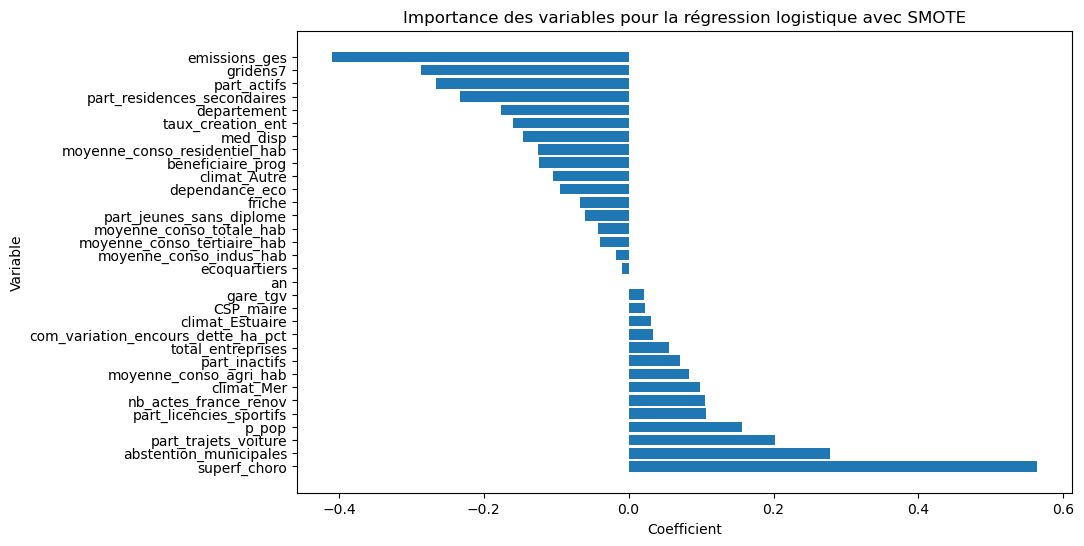

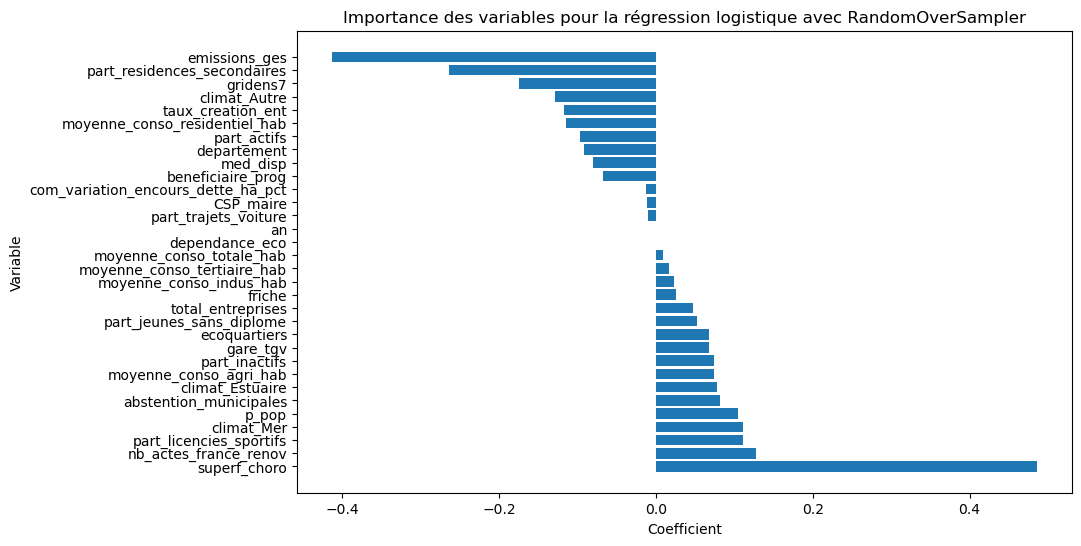

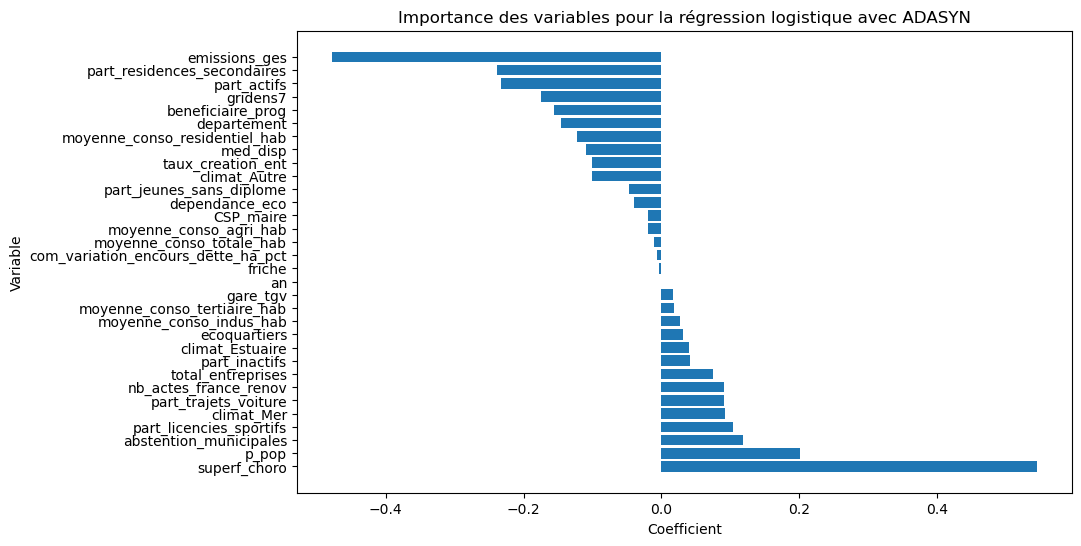

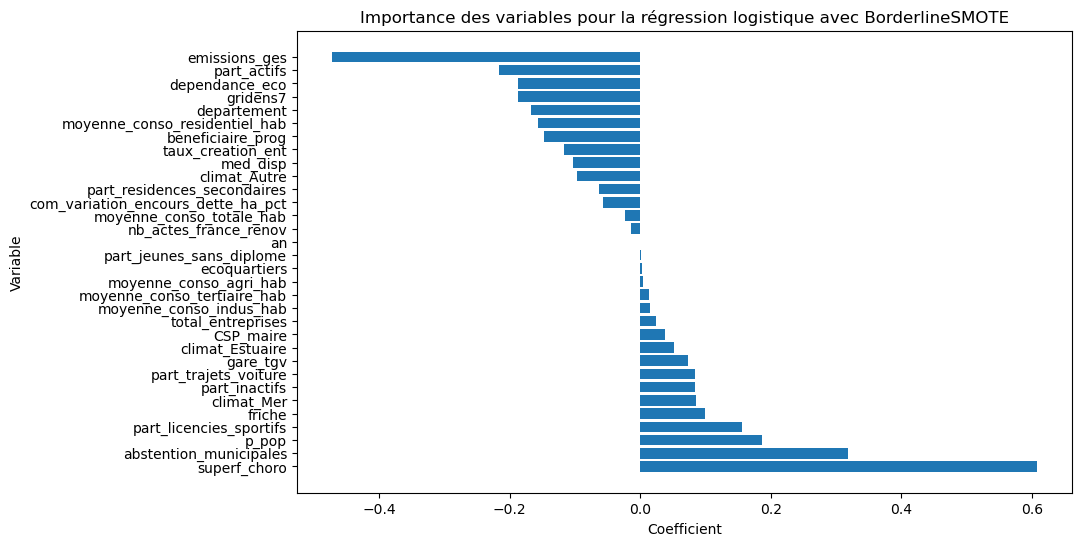

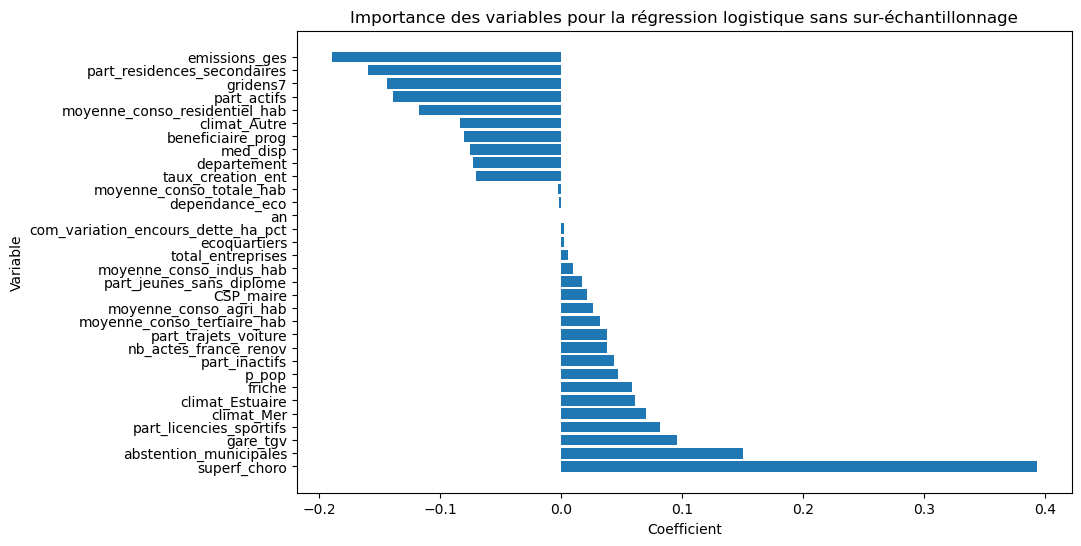

In [53]:
# Graphique pour l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_smote["Variable"], resultats_importance_variables_reg_log_smote["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec SMOTE")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_oversampler["Variable"], resultats_importance_variables_reg_log_oversampler["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec RandomOverSampler")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_adasyn["Variable"], resultats_importance_variables_reg_log_adasyn["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec ADASYN")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_borderline_smote["Variable"], resultats_importance_variables_reg_log_borderline_smote["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec BorderlineSMOTE")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log["Variable"], resultats_importance_variables_reg_log["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique sans sur-échantillonnage")
plt.show()

## I.2.3. Arbres de décision

### A) Construction des modèles

In [54]:
# Construction du modèle d'arbres de décision avec rééquilibrage des classes

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.pipeline import Pipeline

etapes_arbre_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5)), # Arbre de décision
        ]

etapes_arbre_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors= 5)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5)), # Arbre de décision
        ]

etapes_arbre_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5)), # Arbre de décision
        ]

etapes_arbre_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5)), # Arbre de décision
        ]

etapes_arbres = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('arbre', DecisionTreeClassifier(max_depth=5)), # Arbre de décision
        ]

# Justification de max_depth=5 : pour éviter l'overfitting
# On a choisi la valeur 5 car c'est une valeur standard qui permet de ne pas trop complexifier l'arbre de décision

modele_arbre_oversampler = Pipeline(steps=etapes_arbre_oversampler) # Création du pipeline
modele_arbre_smote = Pipeline(steps=etapes_arbre_smote) # Création du pipeline
modele_arbre_adasyn = Pipeline(steps=etapes_arbre_adasyn) # Création du pipeline
modele_arbre_borderline_smote = Pipeline(steps=etapes_arbre_borderline_smote) # Création du pipeline
modele_arbre = Pipeline(steps=etapes_arbres) # Création du pipeline

In [55]:
modele_arbre_oversampler.fit(X_train, y_train) # Entraînement
modele_arbre_smote.fit(X_train, y_train) # Entraînement
modele_arbre_adasyn.fit(X_train, y_train) # Entraînement
modele_arbre_borderline_smote.fit(X_train, y_train) # Entraînement
modele_arbre.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('arbre', DecisionTreeClassifier(max_depth=5))])

In [56]:
# Prédictions

y_proba_arbre_oversampler = modele_arbre_oversampler.predict_proba(X_test)[:, 1]
y_pred_arbre_oversampler = modele_arbre_oversampler.predict(X_test)

y_proba_arbre_smote = modele_arbre_smote.predict_proba(X_test)[:, 1]
y_pred_arbre_smote = modele_arbre_smote.predict(X_test)

y_proba_arbre_adasyn = modele_arbre_adasyn.predict_proba(X_test)[:, 1]
y_pred_arbre_adasyn = modele_arbre_adasyn.predict(X_test)

y_proba_arbre_borderline_smote = modele_arbre_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_arbre_borderline_smote = modele_arbre_borderline_smote.predict(X_test)

y_proba_arbre = modele_arbre.predict_proba(X_test)[:, 1]
y_pred_arbre = modele_arbre.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [57]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score

auc_roc_arbre_oversampler = roc_auc_score(y_test, y_proba_arbre_oversampler)
auc_pr_arbre_oversampler = average_precision_score(y_test, y_proba_arbre_oversampler)
log_loss_value_arbre_oversampler = log_loss(y_test, y_proba_arbre_oversampler)
precision_arbre_oversampler = precision_score(y_test, y_pred_arbre_oversampler)
recall_arbre_oversampler = recall_score(y_test, y_pred_arbre_oversampler)
f1_arbre_oversampler = f1_score(y_test, y_pred_arbre_oversampler)
mcc_arbre_oversampler = matthews_corrcoef(y_test, y_pred_arbre_oversampler)
balanced_acc_arbre_oversampler = balanced_accuracy_score(y_test, y_pred_arbre_oversampler)
specificity_arbre_oversampler = confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 1])
cohen_kappa_arbre_oversampler = cohen_kappa_score(y_test, y_pred_arbre_oversampler)

In [58]:
auc_roc_arbre_smote = roc_auc_score(y_test, y_proba_arbre_smote)
auc_pr_arbre_smote = average_precision_score(y_test, y_proba_arbre_smote)
log_loss_value_arbre_smote = log_loss(y_test, y_proba_arbre_smote)
precision_arbre_smote = precision_score(y_test, y_pred_arbre_smote)
recall_arbre_smote = recall_score(y_test, y_pred_arbre_smote)
f1_arbre_smote = f1_score(y_test, y_pred_arbre_smote)
mcc_arbre_smote = matthews_corrcoef(y_test, y_pred_arbre_smote)
balanced_acc_arbre_smote = balanced_accuracy_score(y_test, y_pred_arbre_smote)
specificity_arbre_smote = confusion_matrix(y_test, y_pred_arbre_smote)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_smote)[0, 0] + confusion_matrix(y_test, y_pred_arbre_smote)[0, 1])
cohen_kappa_arbre_smote = cohen_kappa_score(y_test, y_pred_arbre_smote)

In [59]:
auc_roc_arbre_adasyn = roc_auc_score(y_test, y_proba_arbre_adasyn)
auc_pr_arbre_adasyn = average_precision_score(y_test, y_proba_arbre_adasyn)
log_loss_value_arbre_adasyn = log_loss(y_test, y_proba_arbre_adasyn)
precision_arbre_adasyn = precision_score(y_test, y_pred_arbre_adasyn)
recall_arbre_adasyn = recall_score(y_test, y_pred_arbre_adasyn)
f1_arbre_adasyn = f1_score(y_test, y_pred_arbre_adasyn)
mcc_arbre_adasyn = matthews_corrcoef(y_test, y_pred_arbre_adasyn)
balanced_acc_arbre_adasyn = balanced_accuracy_score(y_test, y_pred_arbre_adasyn)
specificity_arbre_adasyn = confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 1])
cohen_kappa_arbre_adasyn = cohen_kappa_score(y_test, y_pred_arbre_adasyn)

In [60]:
auc_roc_arbre_borderline_smote = roc_auc_score(y_test, y_proba_arbre_borderline_smote)
auc_pr_arbre_borderline_smote = average_precision_score(y_test, y_proba_arbre_borderline_smote)
log_loss_value_arbre_borderline_smote = log_loss(y_test, y_proba_arbre_borderline_smote)
precision_arbre_borderline_smote = precision_score(y_test, y_pred_arbre_borderline_smote)
recall_arbre_borderline_smote = recall_score(y_test, y_pred_arbre_borderline_smote)
f1_arbre_borderline_smote = f1_score(y_test, y_pred_arbre_borderline_smote)
mcc_arbre_borderline_smote = matthews_corrcoef(y_test, y_pred_arbre_borderline_smote)
balanced_acc_arbre_borderline_smote = balanced_accuracy_score(y_test, y_pred_arbre_borderline_smote)
specificity_arbre_borderline_smote = confusion_matrix(y_test, y_pred_arbre_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_arbre_borderline_smote)[0, 1])
cohen_kappa_arbre_borderline_smote = cohen_kappa_score(y_test, y_pred_arbre_borderline_smote)

In [61]:
auc_roc_arbre = roc_auc_score(y_test, y_proba_arbre)
auc_pr_arbre = average_precision_score(y_test, y_proba_arbre)
log_loss_value_arbre = log_loss(y_test, y_proba_arbre)
precision_arbre = precision_score(y_test, y_pred_arbre)
recall_arbre = recall_score(y_test, y_pred_arbre)
f1_arbre = f1_score(y_test, y_pred_arbre)
mcc_arbre = matthews_corrcoef(y_test, y_pred_arbre)
balanced_acc_arbre = balanced_accuracy_score(y_test, y_pred_arbre)
specificity_arbre = confusion_matrix(y_test, y_pred_arbre)[0, 0] / (confusion_matrix(y_test, y_pred_arbre)[0, 0] + confusion_matrix(y_test, y_pred_arbre)[0, 1])
cohen_kappa_arbre = cohen_kappa_score(y_test, y_pred_arbre)

In [62]:
# Affichage des résultats
resultats_arbres = pd.DataFrame({
    "Arbre de décision sans sur-échantillonnage": [auc_roc_arbre, auc_pr_arbre, f1_arbre, balanced_acc_arbre],
    "Arbre de décision avec SMOTE": [auc_roc_arbre_smote, auc_pr_arbre_smote, f1_arbre_smote, balanced_acc_arbre_smote],
    "Arbre de décision avec RandomOverSampler": [auc_roc_arbre_oversampler, auc_pr_arbre_oversampler, f1_arbre_oversampler, balanced_acc_arbre_oversampler],
    "Arbre de décision avec ADASYN": [auc_roc_arbre_adasyn, auc_pr_arbre_adasyn, f1_arbre_adasyn, balanced_acc_arbre_adasyn],
    "Arbre de décision avec BorderlineSMOTE": [auc_roc_arbre_borderline_smote, auc_pr_arbre_borderline_smote, f1_arbre_borderline_smote, balanced_acc_arbre_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_arbres = resultats_arbres.round(3)
resultats_arbres

Arbre de décision sans sur-échantillonnage  \
AUC-ROC                                                 0.621   
AUC-PR                                                  0.212   
F1-score                                                0.172   
Balanced accuracy                                       0.529   

                   Arbre de décision avec SMOTE  \
AUC-ROC                                   0.540   
AUC-PR                                    0.174   
F1-score                                  0.270   
Balanced accuracy                         0.549   

                   Arbre de décision avec RandomOverSampler  \
AUC-ROC                                               0.510   
AUC-PR                                                0.168   
F1-score                                              0.169   
Balanced accuracy                                     0.513   

                   Arbre de décision avec ADASYN  \
AUC-ROC                                    0.542   
AUC-PR                                     0.168   
F1-score                                   0.242   
Balanced accuracy                          0.514   

                   Arbre de décision avec BorderlineSMOTE  
AUC-ROC                                             0.551  
AUC-PR                                              0.164  
F1-score                                            0.260  
Balanced accuracy                                   0.534

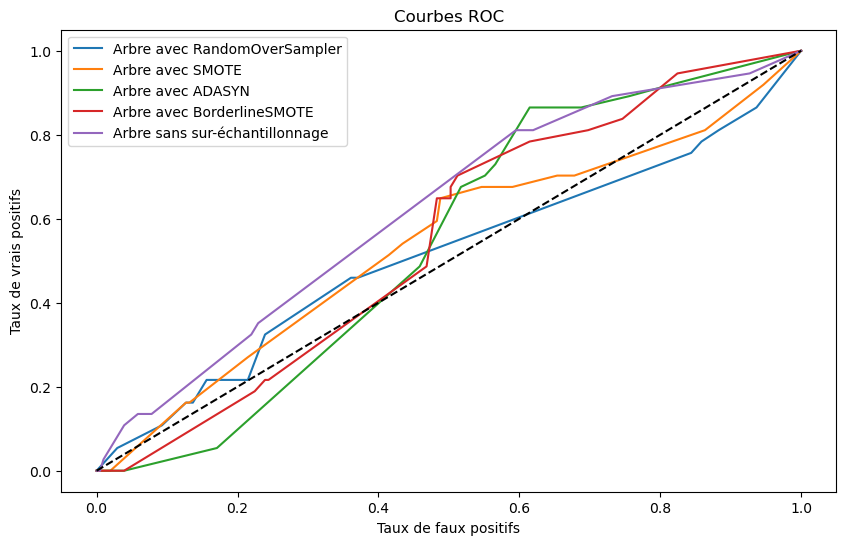

In [63]:
# Tracé des courbes ROC

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_arbre_oversampler, tpr_arbre_oversampler, _ = roc_curve(y_test, y_proba_arbre_oversampler)
fpr_arbre_smote, tpr_arbre_smote, _ = roc_curve(y_test, y_proba_arbre_smote)
fpr_arbre_adasyn, tpr_arbre_adasyn, _ = roc_curve(y_test, y_proba_arbre_adasyn)
fpr_arbre_borderline_smote, tpr_arbre_borderline_smote, _ = roc_curve(y_test, y_proba_arbre_borderline_smote)
fpr_arbre, tpr_arbre, _ = roc_curve(y_test, y_proba_arbre)

plt.figure(figsize=(10, 6))
plt.plot(fpr_arbre_oversampler, tpr_arbre_oversampler, label='Arbre avec RandomOverSampler')
plt.plot(fpr_arbre_smote, tpr_arbre_smote, label='Arbre avec SMOTE')
plt.plot(fpr_arbre_adasyn, tpr_arbre_adasyn, label='Arbre avec ADASYN')
plt.plot(fpr_arbre_borderline_smote, tpr_arbre_borderline_smote, label='Arbre avec BorderlineSMOTE')
plt.plot(fpr_arbre, tpr_arbre, label='Arbre sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Sauvegarde et export de l'image
plt.savefig('data/Courbes_ROC_arbres.png')

plt.show()



### C) Ajustement des hyperparamètres

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, cohen_kappa_score

# Définition de la grille des hyperparamètres pour l'arbre de décision
param_grid_arbres_oversampler = {
    'oversampler__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1], # Stratégie de sur-échantillonnage: 
    'arbre__criterion': ['gini', 'entropy'], # Critère d'impureté
    'arbre__max_depth': [3,6,9,15,21,27],  # Tester les profondeurs de 3 à 31 par pas de 3, # Profondeur maximale de l'arbre
    'arbre__min_samples_split': [2, 5, 10, 20,30], # Nombre minimum d'échantillons pour diviser un nœud
    'arbre__min_samples_leaf': [1, 2, 4] # Nombre minimum d'échantillons requis à chaque feuille
}

param_grid_arbres_smote = {
    'smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins à considérer pour la construction des échantillons synthétiques
    'smote__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1], # Stratégie de sur-échantillonnage:
    'arbre__criterion': ['gini', 'entropy'], # Critère d'impureté
    'arbre__max_depth': [3,6,9,15,21,27],  # Tester les profondeurs de 3 à 31 par pas de 3, # Profondeur maximale de l'arbre
    'arbre__min_samples_split': [2, 5, 10, 20,30], # Nombre minimum d'échantillons pour diviser un nœud
    'arbre__min_samples_leaf': [1, 2, 4] # Nombre minimum d'échantillons requis à chaque feuille
}

param_grid_arbres_adasyn = {
    'adasyn__n_neighbors': [3, 5, 7, 9], # Nombre de voisins à considérer pour la construction des échantillons synthétiques
    'adasyn__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1], # Stratégie de sur-échantillonnage
    'arbre__criterion': ['gini', 'entropy'], # Critère d'impureté
    'arbre__max_depth': [3,6,9,15,21,27],  # Tester les profondeurs de 3 à 31 par pas de 3, # Profondeur maximale de l'arbre
    'arbre__min_samples_split': [2, 5, 10, 20,30], # Nombre minimum d'échantillons pour diviser un nœud
    'arbre__min_samples_leaf': [1, 2, 4] # Nombre minimum d'échantillons requis à chaque feuille
}

param_grid_arbres_borderline_smote = {
    'borderline_smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins à considérer pour la construction des échantillons synthétiques
    'borderline_smote__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1], # Stratégie de sur-échantillonnage
    'arbre__criterion': ['gini', 'entropy'], # Critère d'impureté
    'arbre__max_depth': [3,6,9,15,21,27],  # Tester les profondeurs de 3 à 31 par pas de 3, # Profondeur maximale de l'arbre
    'arbre__min_samples_split': [2, 5, 10, 20,30], # Nombre minimum d'échantillons pour diviser un nœud
    'arbre__min_samples_leaf': [1, 2, 4] # Nombre minimum d'échantillons requis à chaque feuille
}

param_grid_arbres = {
    'arbre__criterion': ['gini', 'entropy'], # Critère d'impureté
    'arbre__max_depth': [3,6,9,15,21,27],  # Tester les profondeurs de 3 à 31 par pas de 3, # Profondeur maximale de l'arbre
    'arbre__min_samples_split': [2, 5, 10, 20,30], # Nombre minimum d'échantillons pour diviser un nœud
    'arbre__min_samples_leaf': [1, 2, 4] # Nombre minimum d'échantillons requis à chaque feuille
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced accuracy' : make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}


# Justification de l'optimisation des hyperparamètres

# max_depth : pour éviter l'overfitting, on cherche à limiter la profondeur de l'arbre
# Profondeur Minimale : 3 (pour permettre à l'arbre de commencer à capturer les interactions entre variables)
# Profondeur Maximale : Min(2 * nombre de variables utilisables, nombre total de variables), donc dans ce cas, min(2 * 31, 31) = 31. Cela suppose que chaque variable pourrait être utilisée au maximum deux fois dans le chemin le plus long, mais cela reste une heuristique.
# Pas : 3 ou 5 pour commencer, puis affiner en fonction des résultats obtenus.

In [65]:
# Ajustement des hyperparamètres

grille_recherche_arbre_oversampler = RandomizedSearchCV(modele_arbre_oversampler, param_grid_arbres_oversampler, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_arbre_smote = RandomizedSearchCV(modele_arbre_smote, param_grid_arbres_smote, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_arbre_adasyn = RandomizedSearchCV(modele_arbre_adasyn, param_grid_arbres_adasyn, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_arbre_borderline_smote = RandomizedSearchCV(modele_arbre_borderline_smote, param_grid_arbres_borderline_smote, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_arbre = RandomizedSearchCV(modele_arbre, param_grid_arbres, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)

In [66]:
modele_arbre_oversampler_opt = grille_recherche_arbre_oversampler.fit(X_train, y_train).best_estimator_ 

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, 

In [67]:
modele_arbre_smote_opt = grille_recherche_arbre_smote.fit(X_train, y_train).best_estimator_

In [68]:
modele_arbre_adasyn_opt = grille_recherche_arbre_adasyn.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, 

In [69]:
modele_arbre_borderline_smote_opt = grille_recherche_arbre_borderline_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, 

In [70]:
modele_arbre_opt = grille_recherche_arbre.fit(X_train, y_train).best_estimator_

In [71]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_arbre_oversampler_cv = modele_arbre_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_oversampler_cv = modele_arbre_oversampler_opt.predict(X_test)

y_proba_arbre_smote_cv = modele_arbre_smote_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_smote_cv = modele_arbre_smote_opt.predict(X_test)

y_proba_arbre_adasyn_cv = modele_arbre_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_adasyn_cv = modele_arbre_adasyn_opt.predict(X_test)

y_proba_arbre_borderline_smote_cv = modele_arbre_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_borderline_smote_cv = modele_arbre_borderline_smote_opt.predict(X_test)

y_proba_arbre_cv = modele_arbre_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_cv = modele_arbre_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [72]:
# Mesure de la performance

# Calcul des métriques
auc_roc_arbre_oversampler_cv = roc_auc_score(y_test, y_proba_arbre_oversampler_cv)
auc_pr_arbre_oversampler_cv = average_precision_score(y_test, y_proba_arbre_oversampler_cv)
log_loss_value_arbre_oversampler_cv = log_loss(y_test, y_proba_arbre_oversampler_cv)
precision_arbre_oversampler_cv = precision_score(y_test, y_pred_arbre_oversampler_cv)
recall_arbre_oversampler_cv = recall_score(y_test, y_pred_arbre_oversampler_cv)
f1_arbre_oversampler_cv = f1_score(y_test, y_pred_arbre_oversampler_cv)
mcc_arbre_oversampler_cv = matthews_corrcoef(y_test, y_pred_arbre_oversampler_cv)
balanced_acc_arbre_oversampler_cv = balanced_accuracy_score(y_test, y_pred_arbre_oversampler_cv)
specificity_arbre_oversampler_cv = confusion_matrix(y_test, y_pred_arbre_oversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_oversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_oversampler_cv)[0, 1])
cohen_kappa_arbre_oversampler_cv = cohen_kappa_score(y_test, y_pred_arbre_oversampler_cv)

auc_roc_arbre_smote_cv = roc_auc_score(y_test, y_proba_arbre_smote_cv)
auc_pr_arbre_smote_cv = average_precision_score(y_test, y_proba_arbre_smote_cv)
log_loss_value_arbre_smote_cv = log_loss(y_test, y_proba_arbre_smote_cv)
precision_arbre_smote_cv = precision_score(y_test, y_pred_arbre_smote_cv)
recall_arbre_smote_cv = recall_score(y_test, y_pred_arbre_smote_cv)
f1_arbre_smote_cv = f1_score(y_test, y_pred_arbre_smote_cv)
mcc_arbre_smote_cv = matthews_corrcoef(y_test, y_pred_arbre_smote_cv)
specificity_arbre_smote_cv = confusion_matrix(y_test, y_pred_arbre_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_smote_cv)[0, 1])
balanced_acc_arbre_smote_cv = balanced_accuracy_score(y_test, y_pred_arbre_smote_cv)
cohen_kappa_arbre_smote_cv = cohen_kappa_score(y_test, y_pred_arbre_smote_cv)

auc_roc_arbre_adasyn_cv = roc_auc_score(y_test, y_proba_arbre_adasyn_cv)
auc_pr_arbre_adasyn_cv = average_precision_score(y_test, y_proba_arbre_adasyn_cv)
log_loss_value_arbre_adasyn_cv = log_loss(y_test, y_proba_arbre_adasyn_cv)
precision_arbre_adasyn_cv = precision_score(y_test, y_pred_arbre_adasyn_cv)
recall_arbre_adasyn_cv = recall_score(y_test, y_pred_arbre_adasyn_cv)
f1_arbre_adasyn_cv = f1_score(y_test, y_pred_arbre_adasyn_cv)
mcc_arbre_adasyn_cv = matthews_corrcoef(y_test, y_pred_arbre_adasyn_cv)
balanced_acc_arbre_adasyn_cv = balanced_accuracy_score(y_test, y_pred_arbre_adasyn_cv)
specificity_arbre_adasyn_cv = confusion_matrix(y_test, y_pred_arbre_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_adasyn_cv)[0, 1])
cohen_kappa_arbre_adasyn_cv = cohen_kappa_score(y_test, y_pred_arbre_adasyn_cv)

auc_roc_arbre_borderline_smote_cv = roc_auc_score(y_test, y_proba_arbre_borderline_smote_cv)
auc_pr_arbre_borderline_smote_cv = average_precision_score(y_test, y_proba_arbre_borderline_smote_cv)
log_loss_value_arbre_borderline_smote_cv = log_loss(y_test, y_proba_arbre_borderline_smote_cv)
precision_arbre_borderline_smote_cv = precision_score(y_test, y_pred_arbre_borderline_smote_cv)
recall_arbre_borderline_smote_cv = recall_score(y_test, y_pred_arbre_borderline_smote_cv)
f1_arbre_borderline_smote_cv = f1_score(y_test, y_pred_arbre_borderline_smote_cv)
mcc_arbre_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_arbre_borderline_smote_cv)
balanced_acc_arbre_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_arbre_borderline_smote_cv)
specificity_arbre_borderline_smote_cv = confusion_matrix(y_test, y_pred_arbre_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_borderline_smote_cv)[0, 1])
cohens_kappa_arbre_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_arbre_borderline_smote_cv)

auc_roc_arbre_cv = roc_auc_score(y_test, y_proba_arbre_cv)
auc_pr_arbre_cv = average_precision_score(y_test, y_proba_arbre_cv)
log_loss_value_arbre_cv = log_loss(y_test, y_proba_arbre_cv)
precision_arbre_cv = precision_score(y_test, y_pred_arbre_cv)
recall_arbre_cv = recall_score(y_test, y_pred_arbre_cv)
f1_arbre_cv = f1_score(y_test, y_pred_arbre_cv)
mcc_arbre_cv = matthews_corrcoef(y_test, y_pred_arbre_cv)
balanced_acc_arbre_cv = balanced_accuracy_score(y_test, y_pred_arbre_cv)
specificity_arbre_cv = confusion_matrix(y_test, y_pred_arbre_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_cv)[0, 1])
cohen_kappa_arbre_cv = cohen_kappa_score(y_test, y_pred_arbre_cv)

In [73]:
# Affichage des résultats

resultats_arbres_cv = pd.DataFrame({
    "Arbre de décision sans sur-échantillonnage": [auc_roc_arbre_cv, auc_pr_arbre_cv, f1_arbre_cv, balanced_acc_arbre_cv],
    "Arbre de décision avec SMOTE": [auc_roc_arbre_smote_cv, auc_pr_arbre_smote_cv, f1_arbre_smote_cv, balanced_acc_arbre_smote_cv],
    "Arbre de décision avec RandomOverSampler": [auc_roc_arbre_oversampler_cv, auc_pr_arbre_oversampler_cv,  f1_arbre_oversampler_cv, balanced_acc_arbre_oversampler_cv],
    "Arbre de décision avec ADASYN": [auc_roc_arbre_adasyn_cv, auc_pr_arbre_adasyn_cv, f1_arbre_adasyn_cv, balanced_acc_arbre_adasyn_cv ],
    "Arbre de décision avec BorderlineSMOTE": [auc_roc_arbre_borderline_smote_cv, auc_pr_arbre_borderline_smote_cv, f1_arbre_borderline_smote_cv, balanced_acc_arbre_borderline_smote_cv]
    },
    index = ["AUC-ROC", "AUC-PR", "F1", "Balanced Accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_arbres_cv = resultats_arbres_cv.round(3)
resultats_arbres_cv


Arbre de décision sans sur-échantillonnage  \
AUC-ROC                                                 0.597   
AUC-PR                                                  0.213   
F1                                                      0.263   
Balanced Accuracy                                       0.564   

                   Arbre de décision avec SMOTE  \
AUC-ROC                                   0.606   
AUC-PR                                    0.221   
F1                                        0.295   
Balanced Accuracy                         0.580   

                   Arbre de décision avec RandomOverSampler  \
AUC-ROC                                               0.507   
AUC-PR                                                0.160   
F1                                                    0.235   
Balanced Accuracy                                     0.533   

                   Arbre de décision avec ADASYN  \
AUC-ROC                                    0.666   
AUC-PR                                     0.232   
F1                                         0.378   
Balanced Accuracy                          0.676   

                   Arbre de décision avec BorderlineSMOTE  
AUC-ROC                                             0.590  
AUC-PR                                              0.190  
F1                                                  0.267  
Balanced Accuracy                                   0.562

In [74]:
# Export
resultats_arbres_cv.to_csv("data/resultats_arbres_opt.csv", index=True)
latex_table_arbres = resultats_arbres_cv.to_latex(index=True)
print(latex_table_arbres)

\begin{tabular}{lrrrrr}
\toprule
 & Arbre de décision sans sur-échantillonnage & Arbre de décision avec SMOTE & Arbre de décision avec RandomOverSampler & Arbre de décision avec ADASYN & Arbre de décision avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.597000 & 0.606000 & 0.507000 & 0.666000 & 0.590000 \\
AUC-PR & 0.213000 & 0.221000 & 0.160000 & 0.232000 & 0.190000 \\
F1 & 0.263000 & 0.295000 & 0.235000 & 0.378000 & 0.267000 \\
Balanced Accuracy & 0.564000 & 0.580000 & 0.533000 & 0.676000 & 0.562000 \\
\bottomrule
\end{tabular}



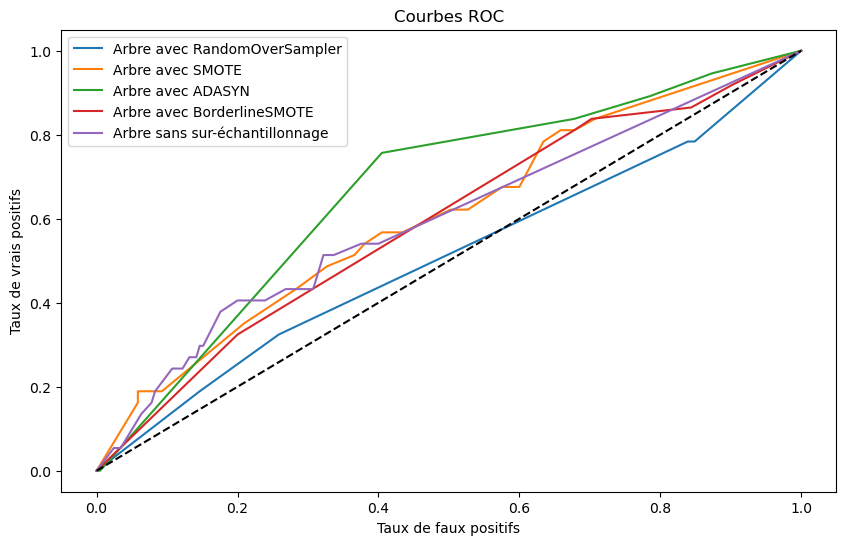

In [75]:
# Comparaison des courbes ROC

fpr_arbre_oversampler_cv, tpr_arbre_oversampler_cv, _ = roc_curve(y_test, y_proba_arbre_oversampler_cv)
fpr_arbre_smote_cv, tpr_arbre_smote_cv, _ = roc_curve(y_test, y_proba_arbre_smote_cv)
fpr_arbre_adasyn_cv, tpr_arbre_adasyn_cv, _ = roc_curve(y_test, y_proba_arbre_adasyn_cv)
fpr_arbre_borderline_smote_cv, tpr_arbre_borderline_smote_cv, _ = roc_curve(y_test, y_proba_arbre_borderline_smote_cv)
fpr_arbre_cv, tpr_arbre_cv, _ = roc_curve(y_test, y_proba_arbre_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_arbre_oversampler_cv, tpr_arbre_oversampler_cv, label='Arbre avec RandomOverSampler')
plt.plot(fpr_arbre_smote_cv, tpr_arbre_smote_cv, label='Arbre avec SMOTE')
plt.plot(fpr_arbre_adasyn_cv, tpr_arbre_adasyn_cv, label='Arbre avec ADASYN')
plt.plot(fpr_arbre_borderline_smote_cv, tpr_arbre_borderline_smote_cv, label='Arbre avec BorderlineSMOTE')
plt.plot(fpr_arbre_cv, tpr_arbre_cv, label='Arbre sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_arbres_cv.png')

plt.show()

### E) Importance des variables

In [76]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_arbre_oversampler = modele_arbre_oversampler_opt.named_steps['arbre'].feature_importances_
importances_arbre_smote = modele_arbre_smote_opt.named_steps['arbre'].feature_importances_
importances_arbre_adasyn = modele_arbre_adasyn_opt.named_steps['arbre'].feature_importances_
importances_arbre_borderline_smote = modele_arbre_borderline_smote_opt.named_steps['arbre'].feature_importances_
importances_arbre = modele_arbre_opt.named_steps['arbre'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_arbre_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_oversampler
})

resultats_importance_variables_arbre_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_smote
})

resultats_importance_variables_arbre_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_adasyn
})

resultats_importance_variables_arbre_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_borderline_smote
})

resultats_importance_variables_arbre = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre
})

# Affichage des résultats
resultats_importance_variables_arbre_oversampler = resultats_importance_variables_arbre_oversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_smote = resultats_importance_variables_arbre_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_adasyn = resultats_importance_variables_arbre_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_borderline_smote = resultats_importance_variables_arbre_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre = resultats_importance_variables_arbre.sort_values(by="Importance", ascending=False)

resultats_importance_variables_arbre_oversampler

Variable  Importance
18                               p_pop    0.403112
16                            med_disp    0.244597
5                        emissions_ges    0.150450
26                   total_entreprises    0.109384
3        moyenne_conso_residentiel_hab    0.049616
20  com_variation_encours_dette_ha_pct    0.042841
30                     climat_Estuaire    0.000000
29                        climat_Autre    0.000000
28            part_jeunes_sans_diplome    0.000000
27             part_licencies_sportifs    0.000000
17                                  an    0.000000
25                   taux_creation_ent    0.000000
24              abstention_municipales    0.000000
23                      dependance_eco    0.000000
22                         part_actifs    0.000000
21                       part_inactifs    0.000000
19                           CSP_maire    0.000000
0               moyenne_conso_agri_hab    0.000000
1              moyenne_conso_indus_hab    0.000000
15                part_trajets_voiture    0.000000
14                            gare_tgv    0.000000
13                         departement    0.000000
12                        superf_choro    0.000000
11                            gridens7    0.000000
10                   beneficiaire_prog    0.000000
9          part_residences_secondaires    0.000000
8                         ecoquartiers    0.000000
7                               friche    0.000000
6                nb_actes_france_renov    0.000000
4             moyenne_conso_totale_hab    0.000000
2          moyenne_conso_tertiaire_hab    0.000000
31                          climat_Mer    0.000000

In [77]:
resultats_importance_variables_arbre_smote

Variable  Importance
7                               friche    0.206436
1              moyenne_conso_indus_hab    0.203769
13                         departement    0.192243
6                nb_actes_france_renov    0.085575
12                        superf_choro    0.067535
27             part_licencies_sportifs    0.051152
20  com_variation_encours_dette_ha_pct    0.049981
22                         part_actifs    0.047156
4             moyenne_conso_totale_hab    0.021574
2          moyenne_conso_tertiaire_hab    0.020523
28            part_jeunes_sans_diplome    0.018199
16                            med_disp    0.013153
21                       part_inactifs    0.010138
15                part_trajets_voiture    0.008299
0               moyenne_conso_agri_hab    0.004268
14                            gare_tgv    0.000000
24              abstention_municipales    0.000000
30                     climat_Estuaire    0.000000
29                        climat_Autre    0.000000
3        moyenne_conso_residentiel_hab    0.000000
5                        emissions_ges    0.000000
26                   total_entreprises    0.000000
25                   taux_creation_ent    0.000000
23                      dependance_eco    0.000000
11                            gridens7    0.000000
8                         ecoquartiers    0.000000
9          part_residences_secondaires    0.000000
10                   beneficiaire_prog    0.000000
19                           CSP_maire    0.000000
18                               p_pop    0.000000
17                                  an    0.000000
31                          climat_Mer    0.000000

In [78]:
resultats_importance_variables_arbre_adasyn

Variable  Importance
7                               friche    0.487885
1              moyenne_conso_indus_hab    0.395644
9          part_residences_secondaires    0.072833
28            part_jeunes_sans_diplome    0.027313
27             part_licencies_sportifs    0.008244
20  com_variation_encours_dette_ha_pct    0.008081
23                      dependance_eco    0.000000
19                           CSP_maire    0.000000
21                       part_inactifs    0.000000
22                         part_actifs    0.000000
0               moyenne_conso_agri_hab    0.000000
24              abstention_municipales    0.000000
18                               p_pop    0.000000
26                   total_entreprises    0.000000
29                        climat_Autre    0.000000
30                     climat_Estuaire    0.000000
25                   taux_creation_ent    0.000000
16                            med_disp    0.000000
17                                  an    0.000000
15                part_trajets_voiture    0.000000
14                            gare_tgv    0.000000
13                         departement    0.000000
12                        superf_choro    0.000000
11                            gridens7    0.000000
10                   beneficiaire_prog    0.000000
8                         ecoquartiers    0.000000
6                nb_actes_france_renov    0.000000
5                        emissions_ges    0.000000
4             moyenne_conso_totale_hab    0.000000
3        moyenne_conso_residentiel_hab    0.000000
2          moyenne_conso_tertiaire_hab    0.000000
31                          climat_Mer    0.000000

In [79]:
resultats_importance_variables_arbre_borderline_smote

Variable  Importance
1              moyenne_conso_indus_hab    0.482789
6                nb_actes_france_renov    0.273799
22                         part_actifs    0.113274
2          moyenne_conso_tertiaire_hab    0.075990
9          part_residences_secondaires    0.028311
19                           CSP_maire    0.025837
28            part_jeunes_sans_diplome    0.000000
27             part_licencies_sportifs    0.000000
26                   total_entreprises    0.000000
18                               p_pop    0.000000
25                   taux_creation_ent    0.000000
24              abstention_municipales    0.000000
23                      dependance_eco    0.000000
29                        climat_Autre    0.000000
21                       part_inactifs    0.000000
20  com_variation_encours_dette_ha_pct    0.000000
30                     climat_Estuaire    0.000000
0               moyenne_conso_agri_hab    0.000000
16                            med_disp    0.000000
17                                  an    0.000000
15                part_trajets_voiture    0.000000
14                            gare_tgv    0.000000
13                         departement    0.000000
12                        superf_choro    0.000000
11                            gridens7    0.000000
10                   beneficiaire_prog    0.000000
8                         ecoquartiers    0.000000
7                               friche    0.000000
5                        emissions_ges    0.000000
4             moyenne_conso_totale_hab    0.000000
3        moyenne_conso_residentiel_hab    0.000000
31                          climat_Mer    0.000000

In [80]:
resultats_importance_variables_arbre

Variable  Importance
18                               p_pop    0.162638
4             moyenne_conso_totale_hab    0.139128
20  com_variation_encours_dette_ha_pct    0.099175
21                       part_inactifs    0.089088
16                            med_disp    0.077461
3        moyenne_conso_residentiel_hab    0.069941
6                nb_actes_france_renov    0.057149
5                        emissions_ges    0.045939
25                   taux_creation_ent    0.041163
0               moyenne_conso_agri_hab    0.041098
1              moyenne_conso_indus_hab    0.036038
19                           CSP_maire    0.032803
28            part_jeunes_sans_diplome    0.028425
27             part_licencies_sportifs    0.026463
9          part_residences_secondaires    0.024893
24              abstention_municipales    0.016990
23                      dependance_eco    0.011608
10                   beneficiaire_prog    0.000000
30                     climat_Estuaire    0.000000
29                        climat_Autre    0.000000
26                   total_entreprises    0.000000
2          moyenne_conso_tertiaire_hab    0.000000
7                               friche    0.000000
22                         part_actifs    0.000000
11                            gridens7    0.000000
8                         ecoquartiers    0.000000
17                                  an    0.000000
15                part_trajets_voiture    0.000000
14                            gare_tgv    0.000000
13                         departement    0.000000
12                        superf_choro    0.000000
31                          climat_Mer    0.000000

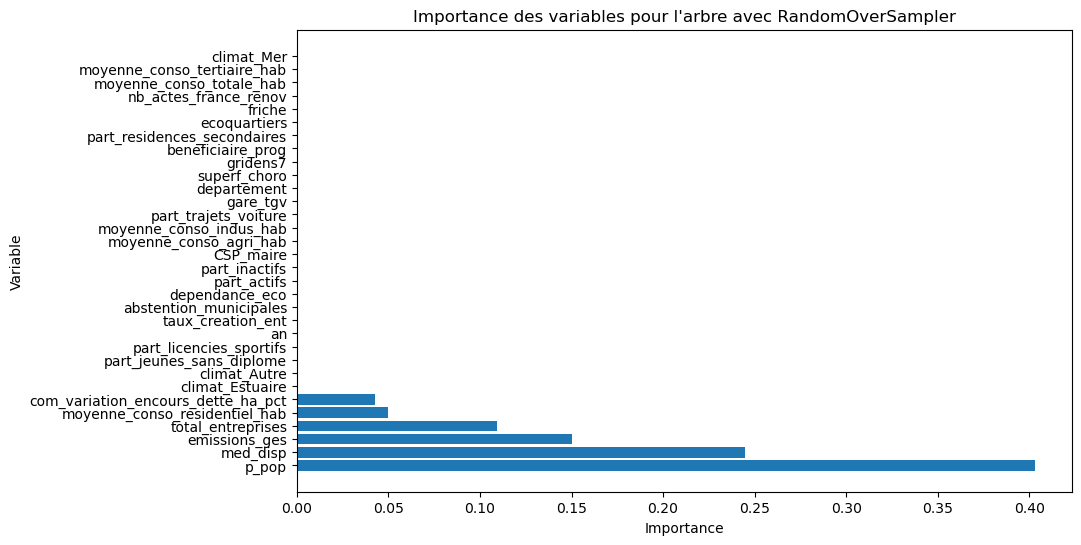

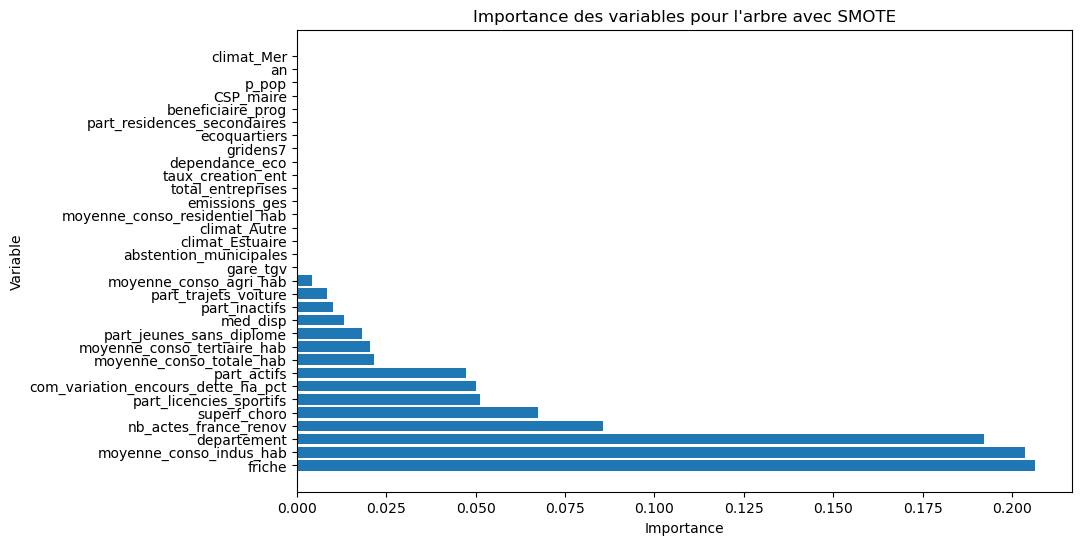

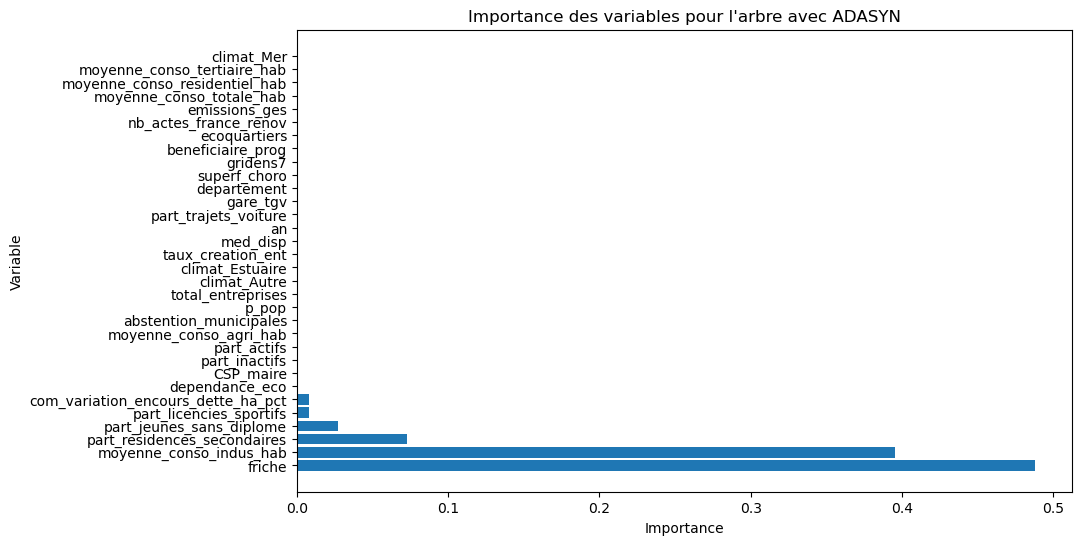

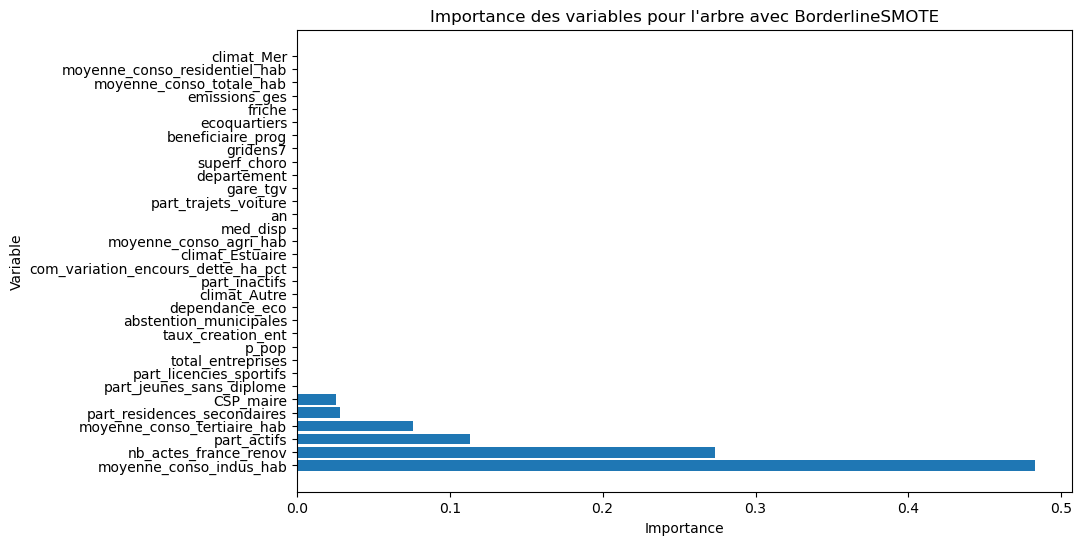

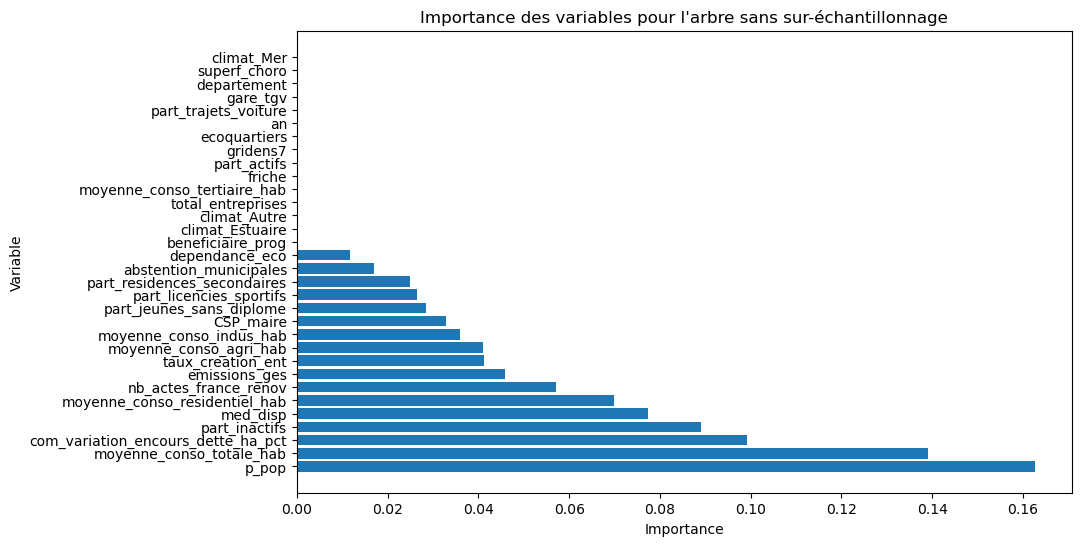

In [81]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_oversampler['Variable'], resultats_importance_variables_arbre_oversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_smote['Variable'], resultats_importance_variables_arbre_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_adasyn['Variable'], resultats_importance_variables_arbre_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_borderline_smote['Variable'], resultats_importance_variables_arbre_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre['Variable'], resultats_importance_variables_arbre['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre sans sur-échantillonnage')
plt.show()

## I.2.4. Forêts Aléatoires

### A) Construction des modèles

In [82]:
# Construction du modèle de forêts aléatoires avec rééquilibrage des classes

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

etapes_rf_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('rf', RandomForestClassifier())
        ]

etapes_rf_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('rf', RandomForestClassifier()), # Forets aléatoires
        ]

etapes_rf_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('rf', RandomForestClassifier()), # Forets aléatoires
        ]

etapes_rf_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('rf', RandomForestClassifier()), # Forets aléatoires
        ]

etapes_rf = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('rf', RandomForestClassifier()) # Forets aléatoires
        ]


modele_rf_oversampler = Pipeline(steps=etapes_rf_oversampler) # Création du pipeline
modele_rf_smote = Pipeline(steps=etapes_rf_smote) # Création du pipeline
modele_rf_adasyn = Pipeline(steps=etapes_rf_adasyn) # Création du pipeline
modele_rf_borderline_smote = Pipeline(steps=etapes_rf_borderline_smote) # Création du pipeline
modele_rf = Pipeline(steps=etapes_rf) # Création du pipeline

modele_rf_oversampler.fit(X_train, y_train) # Entraînement
modele_rf_smote.fit(X_train, y_train) # Entraînement
modele_rf_adasyn.fit(X_train, y_train) # Entraînement
modele_rf_borderline_smote.fit(X_train, y_train) # Entraînement
modele_rf.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('rf', RandomForestClassifier())])

In [83]:
# Prédictions

y_proba_rf_oversampler = modele_rf_oversampler.predict_proba(X_test)[:, 1]
y_pred_rf_oversampler = modele_rf_oversampler.predict(X_test)

y_proba_rf_smote = modele_rf_smote.predict_proba(X_test)[:, 1]
y_pred_rf_smote = modele_rf_smote.predict(X_test)

y_proba_rf_adasyn = modele_rf_adasyn.predict_proba(X_test)[:, 1]
y_pred_rf_adasyn = modele_rf_adasyn.predict(X_test)

y_proba_rf_borderline_smote = modele_rf_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_rf_borderline_smote = modele_rf_borderline_smote.predict(X_test)

y_proba_rf = modele_rf.predict_proba(X_test)[:, 1]
y_pred_rf = modele_rf.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [84]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score

auc_roc_rf_oversampler = roc_auc_score(y_test, y_proba_rf_oversampler)
auc_pr_rf_oversampler = average_precision_score(y_test, y_proba_rf_oversampler)
log_loss_value_rf_oversampler = log_loss(y_test, y_proba_rf_oversampler)
precision_rf_oversampler = precision_score(y_test, y_pred_rf_oversampler)
recall_rf_oversampler = recall_score(y_test, y_pred_rf_oversampler)
f1_rf_oversampler = f1_score(y_test, y_pred_rf_oversampler)
mcc_rf_oversampler = matthews_corrcoef(y_test, y_pred_rf_oversampler)
balanced_acc_rf_oversampler = balanced_accuracy_score(y_test, y_pred_rf_oversampler)
specificity_rf_oversampler = confusion_matrix(y_test, y_pred_rf_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_rf_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_rf_oversampler)[0, 1])
cohen_kappa_rf_oversampler = cohen_kappa_score(y_test, y_pred_rf_oversampler)

auc_roc_rf_smote = roc_auc_score(y_test, y_proba_rf_smote)
auc_pr_rf_smote = average_precision_score(y_test, y_proba_rf_smote)
log_loss_value_rf_smote = log_loss(y_test, y_proba_rf_smote)
precision_rf_smote = precision_score(y_test, y_pred_rf_smote)
recall_rf_smote = recall_score(y_test, y_pred_rf_smote)
f1_rf_smote = f1_score(y_test, y_pred_rf_smote)
mcc_rf_smote = matthews_corrcoef(y_test, y_pred_rf_smote)
balanced_acc_rf_smote = balanced_accuracy_score(y_test, y_pred_rf_smote)
specificity_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)[0, 0] / (confusion_matrix(y_test, y_pred_rf_smote)[0, 0] + confusion_matrix(y_test, y_pred_rf_smote)[0, 1])
cohen_kappa_rf_smote = cohen_kappa_score(y_test, y_pred_rf_smote)

auc_roc_rf_adasyn = roc_auc_score(y_test, y_proba_rf_adasyn)
auc_pr_rf_adasyn = average_precision_score(y_test, y_proba_rf_adasyn)
log_loss_value_rf_adasyn = log_loss(y_test, y_proba_rf_adasyn)
precision_rf_adasyn = precision_score(y_test, y_pred_rf_adasyn)
recall_rf_adasyn = recall_score(y_test, y_pred_rf_adasyn)
f1_rf_adasyn = f1_score(y_test, y_pred_rf_adasyn)
mcc_rf_adasyn = matthews_corrcoef(y_test, y_pred_rf_adasyn)
balanced_acc_rf_adasyn = balanced_accuracy_score(y_test, y_pred_rf_adasyn)
specificity_rf_adasyn = confusion_matrix(y_test, y_pred_rf_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_rf_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_rf_adasyn)[0, 1])
cohen_kappa_rf_adasyn = cohen_kappa_score(y_test, y_pred_rf_adasyn)

auc_roc_rf_borderline_smote = roc_auc_score(y_test, y_proba_rf_borderline_smote)
auc_pr_rf_borderline_smote = average_precision_score(y_test, y_proba_rf_borderline_smote)
log_loss_value_rf_borderline_smote = log_loss(y_test, y_proba_rf_borderline_smote)
precision_rf_borderline_smote = precision_score(y_test, y_pred_rf_borderline_smote)
recall_rf_borderline_smote = recall_score(y_test, y_pred_rf_borderline_smote)
f1_rf_borderline_smote = f1_score(y_test, y_pred_rf_borderline_smote)
mcc_rf_borderline_smote = matthews_corrcoef(y_test, y_pred_rf_borderline_smote)
balanced_acc_rf_borderline_smote = balanced_accuracy_score(y_test, y_pred_rf_borderline_smote)
specificity_rf_borderline_smote = confusion_matrix(y_test, y_pred_rf_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_rf_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_rf_borderline_smote)[0, 1])
cohen_kappa_rf_borderline_smote = cohen_kappa_score(y_test, y_pred_rf_borderline_smote)

auc_roc_rf = roc_auc_score(y_test, y_proba_rf)
auc_pr_rf = average_precision_score(y_test, y_proba_rf)
log_loss_value_rf = log_loss(y_test, y_proba_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)
balanced_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)
specificity_rf = confusion_matrix(y_test, y_pred_rf)[0, 0] / (confusion_matrix(y_test, y_pred_rf)[0, 0] + confusion_matrix(y_test, y_pred_rf)[0, 1])
cohen_kappa_rf = cohen_kappa_score(y_test, y_pred_rf)

In [85]:
# Affichage des résultats

resultats_rf = pd.DataFrame({
    "Forêts aléatoires sans sur-échantillonnage": [auc_roc_rf, auc_pr_rf, f1_rf, balanced_acc_rf],
    "Forêts aléatoires avec SMOTE": [auc_roc_rf_smote, auc_pr_rf_smote, f1_rf_smote, balanced_acc_rf_smote],
    "Forêts aléatoires avec RandomOverSampler": [auc_roc_rf_oversampler, auc_pr_rf_oversampler, f1_rf_oversampler, balanced_acc_rf_oversampler],
    "Forêts aléatoires avec ADASYN": [auc_roc_rf_adasyn, auc_pr_rf_adasyn, f1_rf_adasyn, balanced_acc_rf_adasyn],
    "Forêts aléatoires avec BorderlineSMOTE": [auc_roc_rf_borderline_smote, auc_pr_rf_borderline_smote, f1_rf_borderline_smote, balanced_acc_rf_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_rf = resultats_rf.round(3)
resultats_rf

Forêts aléatoires sans sur-échantillonnage  \
AUC-ROC                                                 0.561   
AUC-PR                                                  0.217   
F1-score                                                0.100   
Balanced accuracy                                       0.525   

                   Forêts aléatoires avec SMOTE  \
AUC-ROC                                   0.621   
AUC-PR                                    0.301   
F1-score                                  0.234   
Balanced accuracy                         0.546   

                   Forêts aléatoires avec RandomOverSampler  \
AUC-ROC                                               0.574   
AUC-PR                                                0.225   
F1-score                                              0.130   
Balanced accuracy                                     0.526   

                   Forêts aléatoires avec ADASYN  \
AUC-ROC                                    0.636   
AUC-PR                                     0.291   
F1-score                                   0.250   
Balanced accuracy                          0.558   

                   Forêts aléatoires avec BorderlineSMOTE  
AUC-ROC                                             0.641  
AUC-PR                                              0.274  
F1-score                                            0.237  
Balanced accuracy                                   0.548

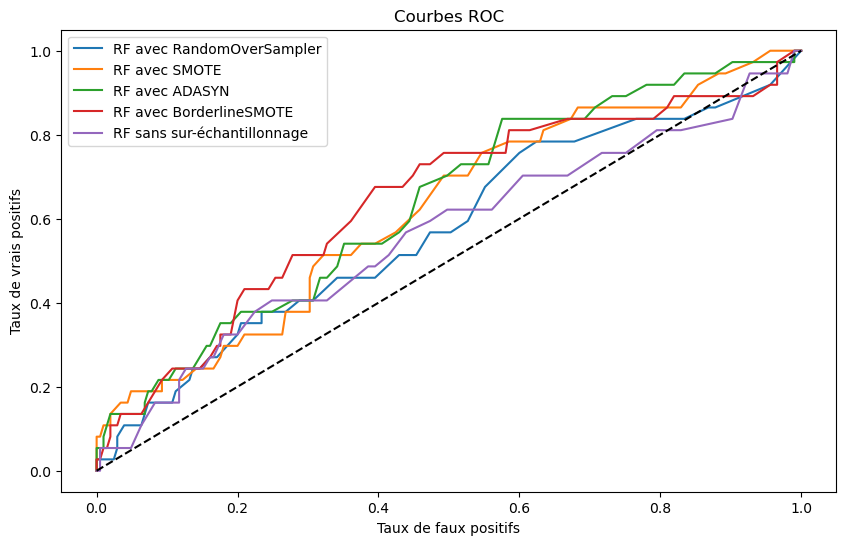

In [86]:
# Courbes ROC

from sklearn.metrics import roc_curve

fpr_rf_oversampler, tpr_rf_oversampler, _ = roc_curve(y_test, y_proba_rf_oversampler)
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test, y_proba_rf_smote)
fpr_rf_adasyn, tpr_rf_adasyn, _ = roc_curve(y_test, y_proba_rf_adasyn)
fpr_rf_borderline_smote, tpr_rf_borderline_smote, _ = roc_curve(y_test, y_proba_rf_borderline_smote)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_oversampler, tpr_rf_oversampler, label='RF avec RandomOverSampler')
plt.plot(fpr_rf_smote, tpr_rf_smote, label='RF avec SMOTE')
plt.plot(fpr_rf_adasyn, tpr_rf_adasyn, label='RF avec ADASYN')
plt.plot(fpr_rf_borderline_smote, tpr_rf_borderline_smote, label='RF avec BorderlineSMOTE')
plt.plot(fpr_rf, tpr_rf, label='RF sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_rf.png')

plt.show()



### C) Ajustement des hyperparamètres

In [87]:
# Ajustement des hyperparamètres par validation croisée

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score

# Définition de la grille des hyperparamètres pour les forêts aléatoires
param_grid_rf_oversampler = {
    'oversampler__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1], # Stratégie de sur-échantillonnage
    'rf__n_estimators': [100, 300, 500], # Moins d'options pour le nombre d'arbres
    'rf__criterion': ['gini', 'entropy'], # Utilisation d'un seul critère d'impureté
    'rf__max_depth': [3, 15, 21, 27], # Réduction des options de profondeur maximale
    'rf__min_samples_split': [2, 7, 15, 27], # Moins d'options pour le nombre minimum d'échantillons pour diviser un nœud
    'rf__min_samples_leaf': [1, 4],
    'rf__bootstrap': [True, False]
}


param_grid_rf_smote = {
    'smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'smote__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1], # Stratégie de sur-échantillonnage
    'rf__n_estimators': [100, 300, 500], # Moins d'options pour le nombre d'arbres
    'rf__criterion': ['gini', 'entropy'], # Utilisation d'un seul critère d'impureté
    'rf__max_depth': [3, 15, 21, 27], # Réduction des options de profondeur maximale
    'rf__min_samples_split': [2, 7, 15, 27], # Moins d'options pour le nombre minimum d'échantillons pour diviser un nœud
    'rf__min_samples_leaf': [1, 4],
    'rf__bootstrap': [True, False]
}


param_grid_rf_adasyn = {
    'adasyn__n_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'adasyn__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1], # Stratégie de sur-échantillonnage
    'rf__n_estimators': [100, 300, 500], # Moins d'options pour le nombre d'arbres
    'rf__criterion': ['gini', 'entropy'], # Utilisation d'un seul critère d'impureté
    'rf__max_depth': [3, 15, 21, 27], # Réduction des options de profondeur maximale
    'rf__min_samples_split': [2, 7, 15, 27], # Moins d'options pour le nombre minimum d'échantillons pour diviser un nœud
    'rf__min_samples_leaf': [1, 4],
    'rf__bootstrap': [True, False]
}
param_grid_rf_borderline_smote = {
    'borderline_smote__k_neighbors': [3, 5, 7, 9], # Nombre de 
    'borderline_smote__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1], # Stratégie de sur-échantillonnage
    'rf__n_estimators': [100, 300, 500], # Moins d'options pour le nombre d'arbres
    'rf__criterion': ['gini', 'entropy'], # Utilisation d'un seul critère d'impureté
    'rf__max_depth': [3, 15, 21, 27], # Réduction des options de profondeur maximale
    'rf__min_samples_split': [2, 7, 15, 27], # Moins d'options pour le nombre minimum d'échantillons pour diviser un nœud
    'rf__min_samples_leaf': [1, 4],
    'rf__bootstrap': [True, False]
}


param_grid_rf = {
    'rf__n_estimators': [100, 300, 500], # Moins d'options pour le nombre d'arbres
    'rf__criterion': ['gini', 'entropy'], # Utilisation d'un seul critère d'impureté
    'rf__max_depth': [3, 15, 21, 27], # Réduction des options de profondeur maximale
    'rf__min_samples_split': [2, 7, 15, 27], # Moins d'options pour le nombre minimum d'échantillons pour diviser un nœud
    'rf__min_samples_leaf': [1, 4],
    'rf__bootstrap': [True, False]
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}

In [88]:
# Ajustement des hyperparamètres

grille_recherche_rf_oversampler = RandomizedSearchCV(modele_rf_oversampler, param_grid_rf_oversampler, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)
grille_recherche_rf_smote = RandomizedSearchCV(modele_rf_smote, param_grid_rf_smote, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)
grille_recherche_rf_adasyn = RandomizedSearchCV(modele_rf_adasyn, param_grid_rf_adasyn, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)
grille_recherche_rf_borderline_smote = RandomizedSearchCV(modele_rf_borderline_smote, param_grid_rf_borderline_smote, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)
grille_recherche_rf = RandomizedSearchCV(modele_rf, param_grid_rf, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)

In [89]:
modele_rf_oversampler_opt = grille_recherche_rf_oversampler.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, 

In [90]:
modele_rf_smote_opt = grille_recherche_rf_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, 

In [91]:
modele_rf_adasyn_opt = grille_recherche_rf_adasyn.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, 

In [92]:
modele_rf_borderline_smote_opt = grille_recherche_rf_borderline_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, 

In [93]:
modele_rf_opt = grille_recherche_rf.fit(X_train, y_train).best_estimator_

In [94]:
# Affichage des meilleurs paramètres
best_params_rf_oversampler = modele_rf_oversampler_opt.get_params()
best_params_rf_smote = modele_rf_smote_opt.get_params()
best_params_rf_adasyn = modele_rf_adasyn_opt.get_params()
best_params_rf_borderline_smote = modele_rf_borderline_smote_opt.get_params()
best_params_rf = modele_rf_opt.get_params()

In [95]:
# Affichage des meilleurs paramètres pour chaque modèle

print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec oversampler : \n", best_params_rf_oversampler)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec smote :\n", best_params_rf_smote)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec adasyn :\n", best_params_rf_adasyn)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec borderline smote :\n", best_params_rf_borderline_smote)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires sans méthode de sur-échantillonnage :\n", best_params_rf)


Les meilleurs paramètres pour le modèle de forêts aléatoires avec oversampler : 
 {'memory': None, 'steps': [('std_scaler', StandardScaler()), ('oversampler', RandomOverSampler(sampling_strategy=1)), ('rf', RandomForestClassifier(criterion='entropy', max_depth=27, min_samples_split=15))], 'verbose': False, 'std_scaler': StandardScaler(), 'oversampler': RandomOverSampler(sampling_strategy=1), 'rf': RandomForestClassifier(criterion='entropy', max_depth=27, min_samples_split=15), 'std_scaler__copy': True, 'std_scaler__with_mean': True, 'std_scaler__with_std': True, 'oversampler__random_state': None, 'oversampler__sampling_strategy': 1, 'oversampler__shrinkage': None, 'rf__bootstrap': True, 'rf__ccp_alpha': 0.0, 'rf__class_weight': None, 'rf__criterion': 'entropy', 'rf__max_depth': 27, 'rf__max_features': 'sqrt', 'rf__max_leaf_nodes': None, 'rf__max_samples': None, 'rf__min_impurity_decrease': 0.0, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 15, 'rf__min_weight_fraction_leaf': 0.0,

In [96]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_rf_oversampler_cv = modele_rf_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_rf_oversampler_cv = modele_rf_oversampler_opt.predict(X_test)

y_proba_rf_smote_cv = modele_rf_smote_opt.predict_proba(X_test)[:, 1]
y_pred_rf_smote_cv = modele_rf_smote_opt.predict(X_test)

y_proba_rf_adasyn_cv = modele_rf_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_rf_adasyn_cv = modele_rf_adasyn_opt.predict(X_test)

y_proba_rf_borderline_smote_cv = modele_rf_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_rf_borderline_smote_cv = modele_rf_borderline_smote_opt.predict(X_test)

y_proba_rf_cv = modele_rf_opt.predict_proba(X_test)[:, 1]
y_pred_rf_cv = modele_rf_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [97]:
# Calcul des métriques

auc_roc_rf_oversampler_cv = roc_auc_score(y_test, y_proba_rf_oversampler_cv)
auc_pr_rf_oversampler_cv = average_precision_score(y_test, y_proba_rf_oversampler_cv)
log_loss_value_rf_oversampler_cv = log_loss(y_test, y_proba_rf_oversampler_cv)
precision_rf_oversampler_cv = precision_score(y_test, y_pred_rf_oversampler_cv)
recall_rf_oversampler_cv = recall_score(y_test, y_pred_rf_oversampler_cv)
f1_rf_oversampler_cv = f1_score(y_test, y_pred_rf_oversampler_cv)
mcc_rf_oversampler_cv = matthews_corrcoef(y_test, y_pred_rf_oversampler_cv)
balanced_acc_rf_oversampler_cv = balanced_accuracy_score(y_test, y_pred_rf_oversampler_cv)
specificity_rf_oversampler_cv = confusion_matrix(y_test, y_pred_rf_oversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_oversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_oversampler_cv)[0, 1])
cohen_kappa_rf_oversampler_cv = cohen_kappa_score(y_test, y_pred_rf_oversampler_cv)

auc_roc_rf_smote_cv = roc_auc_score(y_test, y_proba_rf_smote_cv)
auc_pr_rf_smote_cv = average_precision_score(y_test, y_proba_rf_smote_cv)
log_loss_value_rf_smote_cv = log_loss(y_test, y_proba_rf_smote_cv)
precision_rf_smote_cv = precision_score(y_test, y_pred_rf_smote_cv)
recall_rf_smote_cv = recall_score(y_test, y_pred_rf_smote_cv)
f1_rf_smote_cv = f1_score(y_test, y_pred_rf_smote_cv)
mcc_rf_smote_cv = matthews_corrcoef(y_test, y_pred_rf_smote_cv)
balanced_acc_rf_smote_cv = balanced_accuracy_score(y_test, y_pred_rf_smote_cv)
specificity_rf_smote_cv = confusion_matrix(y_test, y_pred_rf_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_smote_cv)[0, 1])
cohen_kappa_rf_smote_cv = cohen_kappa_score(y_test, y_pred_rf_smote_cv)

auc_roc_rf_adasyn_cv = roc_auc_score(y_test, y_proba_rf_adasyn_cv)
auc_pr_rf_adasyn_cv = average_precision_score(y_test, y_proba_rf_adasyn_cv)
log_loss_value_rf_adasyn_cv = log_loss(y_test, y_proba_rf_adasyn_cv)
precision_rf_adasyn_cv = precision_score(y_test, y_pred_rf_adasyn_cv)
recall_rf_adasyn_cv = recall_score(y_test, y_pred_rf_adasyn_cv)
f1_rf_adasyn_cv = f1_score(y_test, y_pred_rf_adasyn_cv)
mcc_rf_adasyn_cv = matthews_corrcoef(y_test, y_pred_rf_adasyn_cv)
balanced_acc_rf_adasyn_cv = balanced_accuracy_score(y_test, y_pred_rf_adasyn_cv)
specificity_rf_adasyn_cv = confusion_matrix(y_test, y_pred_rf_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_adasyn_cv)[0, 1])
cohen_kappa_rf_adasyn_cv = cohen_kappa_score(y_test, y_pred_rf_adasyn_cv)

auc_roc_rf_borderline_smote_cv = roc_auc_score(y_test, y_proba_rf_borderline_smote_cv)
auc_pr_rf_borderline_smote_cv = average_precision_score(y_test, y_proba_rf_borderline_smote_cv)
log_loss_value_rf_borderline_smote_cv = log_loss(y_test, y_proba_rf_borderline_smote_cv)
precision_rf_borderline_smote_cv = precision_score(y_test, y_pred_rf_borderline_smote_cv)
recall_rf_borderline_smote_cv = recall_score(y_test, y_pred_rf_borderline_smote_cv)
f1_rf_borderline_smote_cv = f1_score(y_test, y_pred_rf_borderline_smote_cv)
mcc_rf_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_rf_borderline_smote_cv)
balanced_acc_rf_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_rf_borderline_smote_cv)
specificity_rf_borderline_smote_cv = confusion_matrix(y_test, y_pred_rf_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_borderline_smote_cv)[0, 1])
cohen_kappa_rf_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_rf_borderline_smote_cv)

auc_roc_rf_cv = roc_auc_score(y_test, y_proba_rf_cv)
auc_pr_rf_cv = average_precision_score(y_test, y_proba_rf_cv)
log_loss_value_rf_cv = log_loss(y_test, y_proba_rf_cv)
precision_rf_cv = precision_score(y_test, y_pred_rf_cv)
recall_rf_cv = recall_score(y_test, y_pred_rf_cv)
f1_rf_cv = f1_score(y_test, y_pred_rf_cv)
mcc_rf_cv = matthews_corrcoef(y_test, y_pred_rf_cv)
balanced_acc_rf_cv = balanced_accuracy_score(y_test, y_pred_rf_cv)
specificity_rf_cv = confusion_matrix(y_test, y_pred_rf_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_cv)[0, 1])
cohen_kappa_rf_cv = cohen_kappa_score(y_test, y_pred_rf_cv)

In [98]:
# Affichage des résultats

resultats_rf_opt = pd.DataFrame({
    "Forêts aléatoires sans sur-échantillonnage": [auc_roc_rf_cv, auc_pr_rf_cv, f1_rf_cv, balanced_acc_rf_cv],
    "Forêts aléatoires avec SMOTE": [auc_roc_rf_smote_cv, auc_pr_rf_smote_cv, f1_rf_smote_cv, balanced_acc_rf_smote_cv],
    "Forêts aléatoires avec RandomOverSampler": [auc_roc_rf_oversampler_cv, auc_pr_rf_oversampler_cv, f1_rf_oversampler_cv, balanced_acc_rf_oversampler_cv],
    "Forêts aléatoires avec ADASYN": [auc_roc_rf_adasyn_cv, auc_pr_rf_adasyn_cv, f1_rf_adasyn_cv, balanced_acc_rf_adasyn_cv],
    "Forêts aléatoires avec BorderlineSMOTE": [auc_roc_rf_borderline_smote_cv, auc_pr_rf_borderline_smote_cv, f1_rf_borderline_smote_cv, balanced_acc_rf_borderline_smote_cv]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)
# Arrondir les résultats à 3 chiffres après la virgule
resultats_rf_opt = resultats_rf_opt.round(3)
resultats_rf_opt


Forêts aléatoires sans sur-échantillonnage  \
AUC-ROC                                                 0.596   
AUC-PR                                                  0.235   
F1-score                                                0.098   
Balanced accuracy                                       0.522   

                   Forêts aléatoires avec SMOTE  \
AUC-ROC                                   0.641   
AUC-PR                                    0.279   
F1-score                                  0.311   
Balanced accuracy                         0.596   

                   Forêts aléatoires avec RandomOverSampler  \
AUC-ROC                                               0.589   
AUC-PR                                                0.200   
F1-score                                              0.174   
Balanced accuracy                                     0.518   

                   Forêts aléatoires avec ADASYN  \
AUC-ROC                                    0.630   
AUC-PR                                     0.274   
F1-score                                   0.258   
Balanced accuracy                          0.555   

                   Forêts aléatoires avec BorderlineSMOTE  
AUC-ROC                                             0.622  
AUC-PR                                              0.216  
F1-score                                            0.235  
Balanced accuracy                                   0.533

In [99]:
# Export
resultats_rf_opt.to_csv("data/resultats_rf_opt.csv", index=True)
latex_table_rf = resultats_rf_opt.to_latex(index=True)
print(latex_table_rf)

\begin{tabular}{lrrrrr}
\toprule
 & Forêts aléatoires sans sur-échantillonnage & Forêts aléatoires avec SMOTE & Forêts aléatoires avec RandomOverSampler & Forêts aléatoires avec ADASYN & Forêts aléatoires avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.596000 & 0.641000 & 0.589000 & 0.630000 & 0.622000 \\
AUC-PR & 0.235000 & 0.279000 & 0.200000 & 0.274000 & 0.216000 \\
F1-score & 0.098000 & 0.311000 & 0.174000 & 0.258000 & 0.235000 \\
Balanced accuracy & 0.522000 & 0.596000 & 0.518000 & 0.555000 & 0.533000 \\
\bottomrule
\end{tabular}



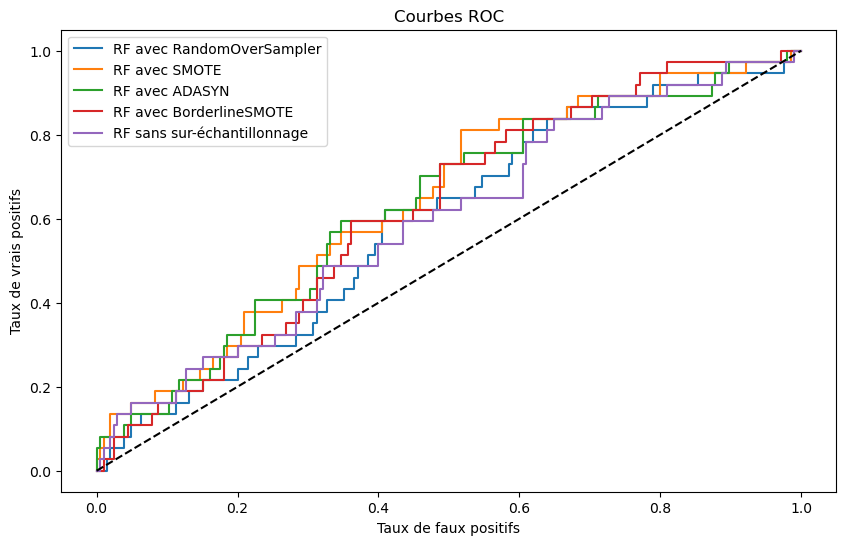

In [100]:
# Comparaison des courbes ROC

fpr_rf_oversampler_cv, tpr_rf_oversampler_cv, _ = roc_curve(y_test, y_proba_rf_oversampler_cv)
fpr_rf_smote_cv, tpr_rf_smote_cv, _ = roc_curve(y_test, y_proba_rf_smote_cv)
fpr_rf_adasyn_cv, tpr_rf_adasyn_cv, _ = roc_curve(y_test, y_proba_rf_adasyn_cv)
fpr_rf_borderline_smote_cv, tpr_rf_borderline_smote_cv, _ = roc_curve(y_test, y_proba_rf_borderline_smote_cv)
fpr_rf_cv, tpr_rf_cv, _ = roc_curve(y_test, y_proba_rf_cv)


plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_oversampler_cv, tpr_rf_oversampler_cv, label='RF avec RandomOverSampler')
plt.plot(fpr_rf_smote_cv, tpr_rf_smote_cv, label='RF avec SMOTE')
plt.plot(fpr_rf_adasyn_cv, tpr_rf_adasyn_cv, label='RF avec ADASYN')
plt.plot(fpr_rf_borderline_smote_cv, tpr_rf_borderline_smote_cv, label='RF avec BorderlineSMOTE')
plt.plot(fpr_rf_cv, tpr_rf_cv, label='RF sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_rf_cv.png')

plt.show()

### E) Importance des variables

In [101]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importance_rf_oversampler = modele_rf_oversampler_opt.named_steps['rf'].feature_importances_
importance_rf_smote = modele_rf_smote_opt.named_steps['rf'].feature_importances_
importance_rf_adasyn = modele_rf_adasyn_opt.named_steps['rf'].feature_importances_
importance_rf_borderline_smote = modele_rf_borderline_smote_opt.named_steps['rf'].feature_importances_
importance_rf = modele_rf_opt.named_steps['rf'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_rf_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_oversampler
})

resultats_importance_variables_rf_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_smote
})

resultats_importance_variables_rf_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_adasyn
})

resultats_importance_variables_rf_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_borderline_smote
})

resultats_importance_variables_rf = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf
})

# Affichage des résultats
resultats_importance_variables_rf_oversampler = resultats_importance_variables_rf_oversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_smote = resultats_importance_variables_rf_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_adasyn = resultats_importance_variables_rf_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_borderline_smote = resultats_importance_variables_rf_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf = resultats_importance_variables_rf.sort_values(by="Importance", ascending=False)

resultats_importance_variables_rf_oversampler

Variable  Importance
22                         part_actifs    0.063519
21                       part_inactifs    0.056778
18                               p_pop    0.054914
24              abstention_municipales    0.052367
12                        superf_choro    0.049034
26                   total_entreprises    0.047247
5                        emissions_ges    0.046740
6                nb_actes_france_renov    0.045522
2          moyenne_conso_tertiaire_hab    0.044538
16                            med_disp    0.043525
23                      dependance_eco    0.041757
20  com_variation_encours_dette_ha_pct    0.041058
4             moyenne_conso_totale_hab    0.040271
27             part_licencies_sportifs    0.039167
25                   taux_creation_ent    0.038694
9          part_residences_secondaires    0.038498
3        moyenne_conso_residentiel_hab    0.038069
19                           CSP_maire    0.033884
1              moyenne_conso_indus_hab    0.033607
28            part_jeunes_sans_diplome    0.032953
0               moyenne_conso_agri_hab    0.032400
15                part_trajets_voiture    0.031670
11                            gridens7    0.015563
7                               friche    0.014365
13                         departement    0.013967
29                        climat_Autre    0.002722
14                            gare_tgv    0.002428
31                          climat_Mer    0.001785
10                   beneficiaire_prog    0.001356
8                         ecoquartiers    0.001286
30                     climat_Estuaire    0.000316
17                                  an    0.000000

In [102]:
resultats_importance_variables_rf_smote

Variable  Importance
1              moyenne_conso_indus_hab    0.141470
7                               friche    0.102539
26                   total_entreprises    0.096932
18                               p_pop    0.090257
11                            gridens7    0.082266
13                         departement    0.066958
6                nb_actes_france_renov    0.066136
12                        superf_choro    0.047494
22                         part_actifs    0.043968
5                        emissions_ges    0.035267
21                       part_inactifs    0.029390
23                      dependance_eco    0.027981
19                           CSP_maire    0.021177
24              abstention_municipales    0.019276
27             part_licencies_sportifs    0.018340
9          part_residences_secondaires    0.017147
28            part_jeunes_sans_diplome    0.017102
20  com_variation_encours_dette_ha_pct    0.013231
16                            med_disp    0.011195
3        moyenne_conso_residentiel_hab    0.011135
4             moyenne_conso_totale_hab    0.011132
2          moyenne_conso_tertiaire_hab    0.009040
0               moyenne_conso_agri_hab    0.007405
25                   taux_creation_ent    0.006745
15                part_trajets_voiture    0.003962
14                            gare_tgv    0.000863
31                          climat_Mer    0.000510
10                   beneficiaire_prog    0.000377
29                        climat_Autre    0.000257
30                     climat_Estuaire    0.000229
8                         ecoquartiers    0.000221
17                                  an    0.000000

In [103]:
resultats_importance_variables_rf_adasyn

Variable  Importance
1              moyenne_conso_indus_hab    0.072732
7                               friche    0.055285
21                       part_inactifs    0.046353
18                               p_pop    0.046181
20  com_variation_encours_dette_ha_pct    0.046164
13                         departement    0.046039
6                nb_actes_france_renov    0.045137
11                            gridens7    0.045091
26                   total_entreprises    0.043966
12                        superf_choro    0.041063
23                      dependance_eco    0.039557
22                         part_actifs    0.038885
27             part_licencies_sportifs    0.037522
19                           CSP_maire    0.037221
16                            med_disp    0.034791
9          part_residences_secondaires    0.034617
5                        emissions_ges    0.033283
28            part_jeunes_sans_diplome    0.033048
24              abstention_municipales    0.032961
25                   taux_creation_ent    0.032292
0               moyenne_conso_agri_hab    0.031512
3        moyenne_conso_residentiel_hab    0.030236
15                part_trajets_voiture    0.029869
2          moyenne_conso_tertiaire_hab    0.028661
4             moyenne_conso_totale_hab    0.026369
14                            gare_tgv    0.003272
31                          climat_Mer    0.002715
10                   beneficiaire_prog    0.001872
29                        climat_Autre    0.001862
8                         ecoquartiers    0.001446
17                                  an    0.000000
30                     climat_Estuaire    0.000000

In [104]:
resultats_importance_variables_rf_borderline_smote

Variable  Importance
18                               p_pop    0.169888
26                   total_entreprises    0.127161
1              moyenne_conso_indus_hab    0.085762
6                nb_actes_france_renov    0.072496
22                         part_actifs    0.064449
7                               friche    0.059603
11                            gridens7    0.057881
23                      dependance_eco    0.050573
2          moyenne_conso_tertiaire_hab    0.044333
5                        emissions_ges    0.035491
24              abstention_municipales    0.034149
12                        superf_choro    0.029761
21                       part_inactifs    0.025115
16                            med_disp    0.024059
20  com_variation_encours_dette_ha_pct    0.017398
25                   taux_creation_ent    0.014692
13                         departement    0.012979
28            part_jeunes_sans_diplome    0.012678
27             part_licencies_sportifs    0.011544
3        moyenne_conso_residentiel_hab    0.010674
15                part_trajets_voiture    0.008196
9          part_residences_secondaires    0.007828
4             moyenne_conso_totale_hab    0.007646
0               moyenne_conso_agri_hab    0.006852
19                           CSP_maire    0.005744
14                            gare_tgv    0.001227
29                        climat_Autre    0.001029
10                   beneficiaire_prog    0.000793
17                                  an    0.000000
8                         ecoquartiers    0.000000
30                     climat_Estuaire    0.000000
31                          climat_Mer    0.000000

In [105]:
resultats_importance_variables_rf

Variable  Importance
18                               p_pop    0.054071
26                   total_entreprises    0.053442
21                       part_inactifs    0.053320
6                nb_actes_france_renov    0.053021
12                        superf_choro    0.051489
5                        emissions_ges    0.051414
22                         part_actifs    0.050268
24              abstention_municipales    0.044869
20  com_variation_encours_dette_ha_pct    0.044078
27             part_licencies_sportifs    0.043936
16                            med_disp    0.042598
2          moyenne_conso_tertiaire_hab    0.041120
4             moyenne_conso_totale_hab    0.040802
1              moyenne_conso_indus_hab    0.040391
3        moyenne_conso_residentiel_hab    0.038831
9          part_residences_secondaires    0.038366
23                      dependance_eco    0.036237
25                   taux_creation_ent    0.035968
0               moyenne_conso_agri_hab    0.035744
28            part_jeunes_sans_diplome    0.033873
15                part_trajets_voiture    0.031925
19                           CSP_maire    0.029931
7                               friche    0.016192
13                         departement    0.013792
11                            gridens7    0.013297
14                            gare_tgv    0.005718
29                        climat_Autre    0.002057
31                          climat_Mer    0.001862
10                   beneficiaire_prog    0.000898
8                         ecoquartiers    0.000460
30                     climat_Estuaire    0.000033
17                                  an    0.000000

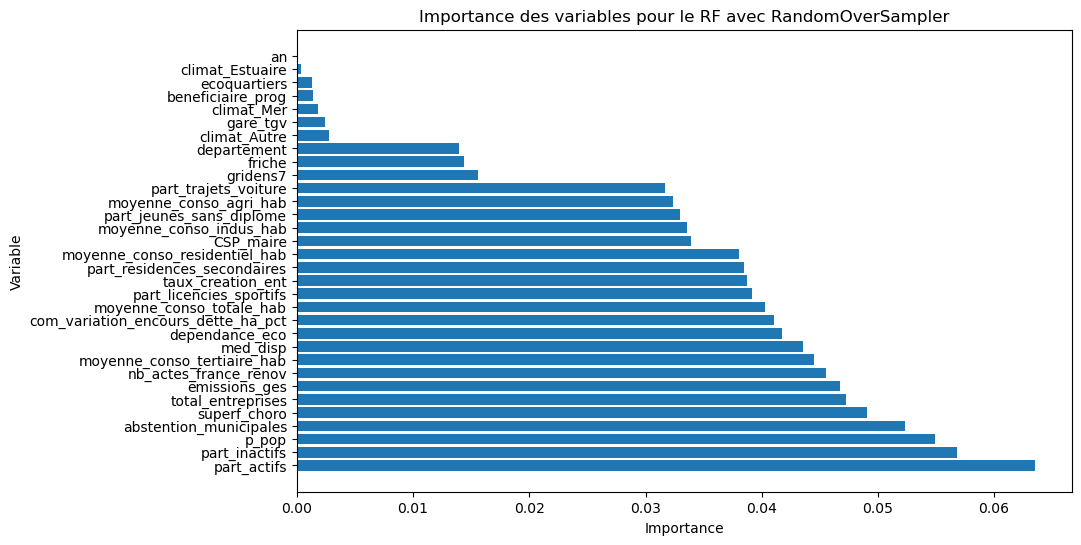

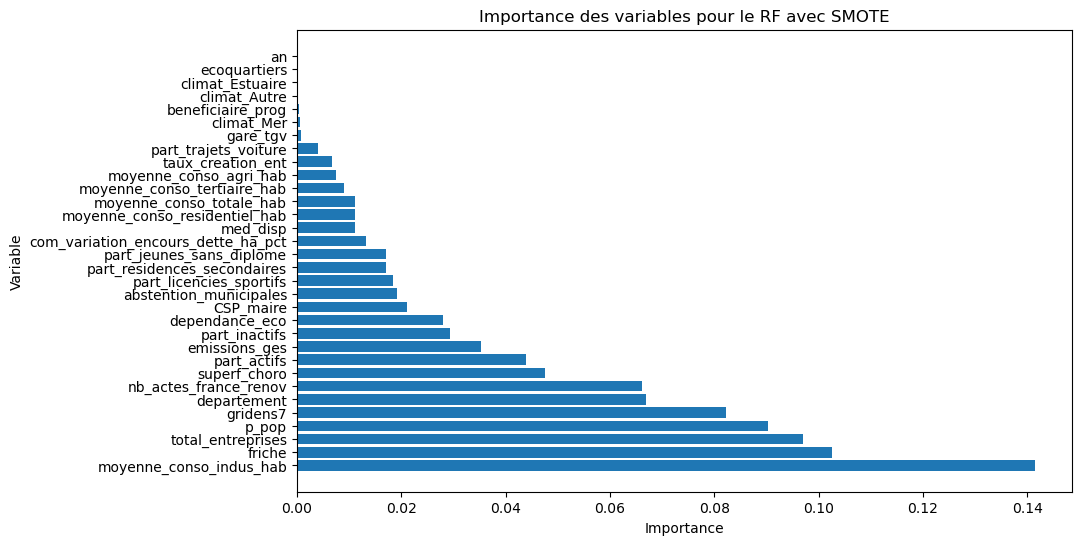

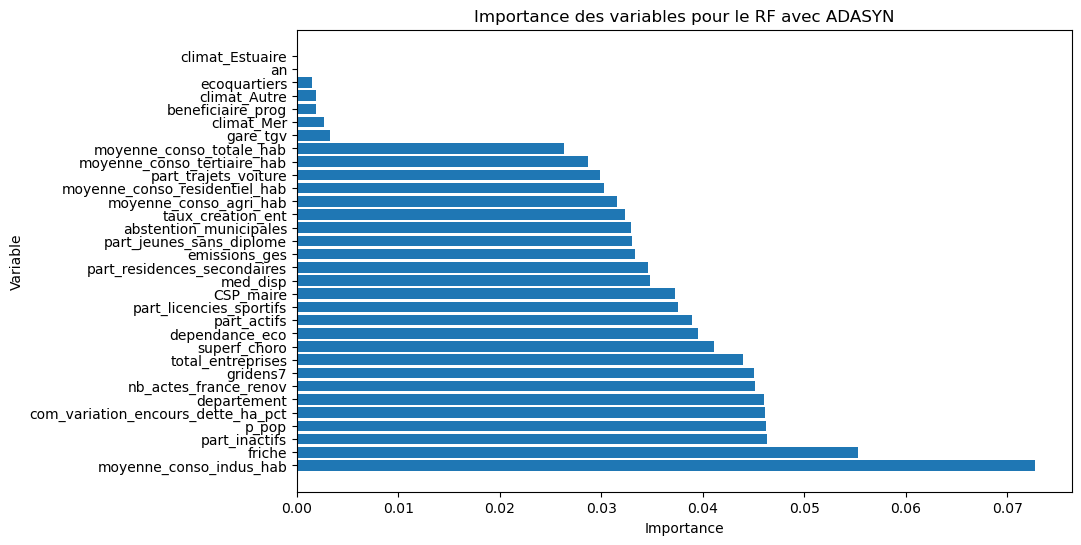

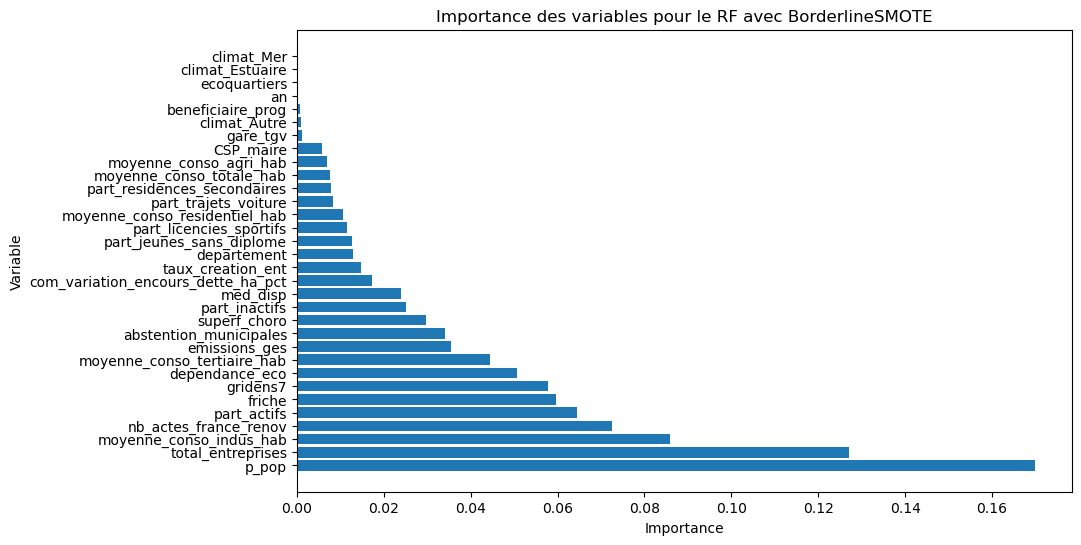

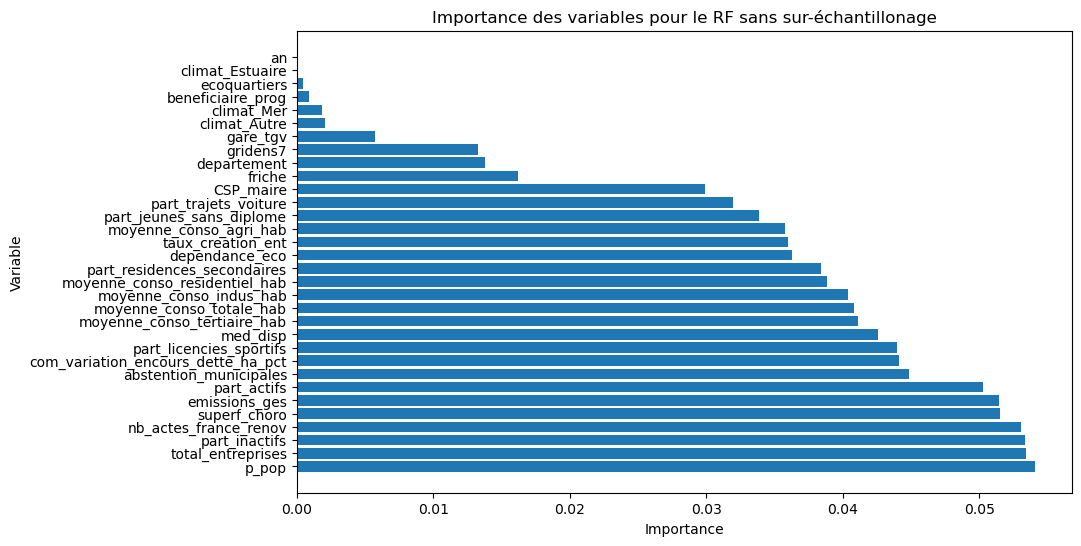

In [106]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_oversampler['Variable'], resultats_importance_variables_rf_oversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_smote['Variable'], resultats_importance_variables_rf_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_adasyn['Variable'], resultats_importance_variables_rf_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_borderline_smote['Variable'], resultats_importance_variables_rf_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf['Variable'], resultats_importance_variables_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF sans sur-échantillonage')
plt.show()

## I.2.4. Gradient Boosting

### A) Construction des modèles

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

# Construction des étapes
etapes_gb_randomoversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

etapes_gb_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

etapes_gb_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

etapes_gb_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

etapes_gb = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

modele_gb_randomoversampler = Pipeline(steps=etapes_gb_randomoversampler) # Création du pipeline
modele_gb_smote = Pipeline(steps=etapes_gb_smote) # Création du pipeline
modele_gb_adasyn = Pipeline(steps=etapes_gb_adasyn) # Création du pipeline
modele_gb_borderline_smote = Pipeline(steps=etapes_gb_borderline_smote) # Création du pipeline
modele_gb = Pipeline(steps=etapes_gb) # Création du pipeline

In [108]:
# Entraînement des modèles
modele_gb_randomoversampler.fit(X_train, y_train) # Entraînement
modele_gb_smote.fit(X_train, y_train) # Entraînement
modele_gb_adasyn.fit(X_train, y_train) # Entraînement
modele_gb_borderline_smote.fit(X_train, y_train) # Entraînement
modele_gb.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('gb', GradientBoostingClassifier())])

In [109]:
# Prédictions

y_proba_gb_randomoversampler = modele_gb_randomoversampler.predict_proba(X_test)[:, 1]
y_pred_gb_randomoversampler = modele_gb_randomoversampler.predict(X_test)

y_proba_gb_smote = modele_gb_smote.predict_proba(X_test)[:, 1]
y_pred_gb_smote = modele_gb_smote.predict(X_test)

y_proba_gb_adasyn = modele_gb_adasyn.predict_proba(X_test)[:, 1]
y_pred_gb_adasyn = modele_gb_adasyn.predict(X_test)

y_proba_gb_borderline_smote = modele_gb_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_gb_borderline_smote = modele_gb_borderline_smote.predict(X_test)

y_proba_gb = modele_gb.predict_proba(X_test)[:, 1]
y_pred_gb = modele_gb.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [110]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

auc_roc_gb_randomoversampler = roc_auc_score(y_test, y_proba_gb_randomoversampler)
auc_pr_gb_randomoversampler = average_precision_score(y_test, y_proba_gb_randomoversampler)
log_loss_value_gb_randomoversampler = log_loss(y_test, y_proba_gb_randomoversampler)
precision_gb_randomoversampler = precision_score(y_test, y_pred_gb_randomoversampler)
recall_gb_randomoversampler = recall_score(y_test, y_pred_gb_randomoversampler)
f1_gb_randomoversampler = f1_score(y_test, y_pred_gb_randomoversampler)
mcc_gb_randomoversampler = matthews_corrcoef(y_test, y_pred_gb_randomoversampler)
balanced_acc_gb_randomoversampler = balanced_accuracy_score(y_test, y_pred_gb_randomoversampler)
specificity_gb_randomoversampler = confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 0] / (confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 0] + confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 1])
cohen_kappa_gb_randomoversampler = cohen_kappa_score(y_test, y_pred_gb_randomoversampler)

auc_roc_gb_smote = roc_auc_score(y_test, y_proba_gb_smote)
auc_pr_gb_smote = average_precision_score(y_test, y_proba_gb_smote)
log_loss_value_gb_smote = log_loss(y_test, y_proba_gb_smote)
precision_gb_smote = precision_score(y_test, y_pred_gb_smote)
recall_gb_smote = recall_score(y_test, y_pred_gb_smote)
f1_gb_smote = f1_score(y_test, y_pred_gb_smote)
mcc_gb_smote = matthews_corrcoef(y_test, y_pred_gb_smote)
balanced_acc_gb_smote = balanced_accuracy_score(y_test, y_pred_gb_smote)
specificity_gb_smote = confusion_matrix(y_test, y_pred_gb_smote)[0, 0] / (confusion_matrix(y_test, y_pred_gb_smote)[0, 0] + confusion_matrix(y_test, y_pred_gb_smote)[0, 1])
cohen_kappa_gb_smote = cohen_kappa_score(y_test, y_pred_gb_smote)

auc_roc_gb_adasyn = roc_auc_score(y_test, y_proba_gb_adasyn)
auc_pr_gb_adasyn = average_precision_score(y_test, y_proba_gb_adasyn)
log_loss_value_gb_adasyn = log_loss(y_test, y_proba_gb_adasyn)
precision_gb_adasyn = precision_score(y_test, y_pred_gb_adasyn)
recall_gb_adasyn = recall_score(y_test, y_pred_gb_adasyn)
f1_gb_adasyn = f1_score(y_test, y_pred_gb_adasyn)
mcc_gb_adasyn = matthews_corrcoef(y_test, y_pred_gb_adasyn)
balanced_acc_gb_adasyn = balanced_accuracy_score(y_test, y_pred_gb_adasyn)
specificity_gb_adasyn = confusion_matrix(y_test, y_pred_gb_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_gb_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_gb_adasyn)[0, 1])
cohen_kappa_gb_adasyn = cohen_kappa_score(y_test, y_pred_gb_adasyn)

auc_roc_gb_borderline_smote = roc_auc_score(y_test, y_proba_gb_borderline_smote)
auc_pr_gb_borderline_smote = average_precision_score(y_test, y_proba_gb_borderline_smote)
log_loss_value_gb_borderline_smote = log_loss(y_test, y_proba_gb_borderline_smote)
precision_gb_borderline_smote = precision_score(y_test, y_pred_gb_borderline_smote)
recall_gb_borderline_smote = recall_score(y_test, y_pred_gb_borderline_smote)
f1_gb_borderline_smote = f1_score(y_test, y_pred_gb_borderline_smote)
mcc_gb_borderline_smote = matthews_corrcoef(y_test, y_pred_gb_borderline_smote)
balanced_acc_gb_borderline_smote = balanced_accuracy_score(y_test, y_pred_gb_borderline_smote)
specificity_gb_borderline_smote = confusion_matrix(y_test, y_pred_gb_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_gb_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_gb_borderline_smote)[0, 1])
cohen_kappa_gb_borderline_smote = cohen_kappa_score(y_test, y_pred_gb_borderline_smote)

auc_roc_gb = roc_auc_score(y_test, y_proba_gb)
auc_pr_gb = average_precision_score(y_test, y_proba_gb)
log_loss_value_gb = log_loss(y_test, y_proba_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
mcc_gb = matthews_corrcoef(y_test, y_pred_gb)
balanced_acc_gb = balanced_accuracy_score(y_test, y_pred_gb)
specificity_gb = confusion_matrix(y_test, y_pred_gb)[0, 0] / (confusion_matrix(y_test, y_pred_gb)[0, 0] + confusion_matrix(y_test, y_pred_gb)[0, 1])
cohen_kappa_gb = cohen_kappa_score(y_test, y_pred_gb)

In [111]:
# Affichage des résultats
resultats_gb = pd.DataFrame({
    "Gradient Boosting sans sur-échantillonnage": [auc_roc_gb, auc_pr_gb, f1_gb, balanced_acc_gb],
    "Gradient Boosting avec SMOTE": [auc_roc_gb_smote, auc_pr_gb_smote, f1_gb_smote, balanced_acc_gb_smote],
    "Gradient Boosting avec RandomOverSampler": [auc_roc_gb_randomoversampler, auc_pr_gb_randomoversampler, f1_gb_randomoversampler, balanced_acc_gb_randomoversampler],
    "Gradient Boosting avec ADASYN": [auc_roc_gb_adasyn, auc_pr_gb_adasyn, f1_gb_adasyn, balanced_acc_gb_adasyn],
    "Gradient Boosting avec BorderlineSMOTE": [auc_roc_gb_borderline_smote, auc_pr_gb_borderline_smote, f1_gb_borderline_smote, balanced_acc_gb_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)
# Arrondir les résultats à 3 chiffres après la virgule
resultats_gb = resultats_gb.round(3)
resultats_gb

Gradient Boosting sans sur-échantillonnage  \
AUC-ROC                                                 0.624   
AUC-PR                                                  0.230   
F1-score                                                0.089   
Balanced accuracy                                       0.512   

                   Gradient Boosting avec SMOTE  \
AUC-ROC                                   0.661   
AUC-PR                                    0.311   
F1-score                                  0.300   
Balanced accuracy                         0.587   

                   Gradient Boosting avec RandomOverSampler  \
AUC-ROC                                               0.585   
AUC-PR                                                0.212   
F1-score                                              0.167   
Balanced accuracy                                     0.524   

                   Gradient Boosting avec ADASYN  \
AUC-ROC                                    0.608   
AUC-PR                                     0.253   
F1-score                                   0.177   
Balanced accuracy                          0.509   

                   Gradient Boosting avec BorderlineSMOTE  
AUC-ROC                                             0.636  
AUC-PR                                              0.249  
F1-score                                            0.247  
Balanced accuracy                                   0.549

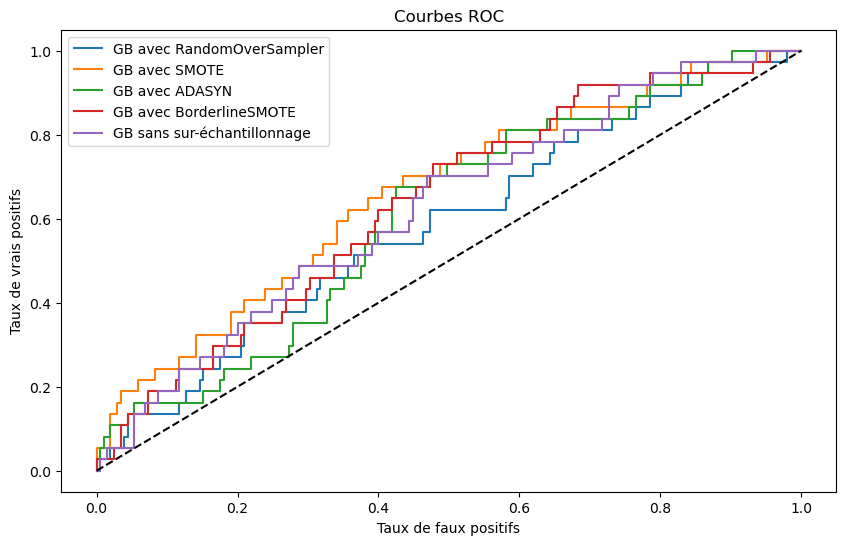

In [112]:
# Courbes ROC

from sklearn.metrics import roc_curve

fpr_gb_randomoversampler, tpr_gb_randomoversampler, _ = roc_curve(y_test, y_proba_gb_randomoversampler)
fpr_gb_smote, tpr_gb_smote, _ = roc_curve(y_test, y_proba_gb_smote)
fpr_gb_adasyn, tpr_gb_adasyn, _ = roc_curve(y_test, y_proba_gb_adasyn)
fpr_gb_borderline_smote, tpr_gb_borderline_smote, _ = roc_curve(y_test, y_proba_gb_borderline_smote)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb_randomoversampler, tpr_gb_randomoversampler, label='GB avec RandomOverSampler')
plt.plot(fpr_gb_smote, tpr_gb_smote, label='GB avec SMOTE')
plt.plot(fpr_gb_adasyn, tpr_gb_adasyn, label='GB avec ADASYN')
plt.plot(fpr_gb_borderline_smote, tpr_gb_borderline_smote, label='GB avec BorderlineSMOTE')
plt.plot(fpr_gb, tpr_gb, label='GB sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()


# Export de l'image
plt.savefig('data/Courbes_ROC_gb.png')

plt.show()


### C) Ajustement des hyperparamètres

In [113]:
# Ajustement des hyperparamètres par validation croisée

from sklearn.model_selection import GridSearchCV

# Définition de la grille des hyperparamètres pour le gradient boosting

param_grid_gb_oversampler = {
    'oversampler__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1.0], 
    'gb__n_estimators': [100, 200, 300, 400, 500], # Nombre d'arbres
    'gb__learning_rate': [0.05, 0.1, 0.5], # Taux d'apprentissage
    'gb__max_depth': [3, 5, 7, 9], # Profondeur maximale de l'arbre
}

param_grid_gb_smote = {
    'smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'smote__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1.0], # Stratégie de sur-échantillonnage
    'gb__n_estimators': [100, 200, 300, 400, 500], # Nombre d'arbres
    'gb__learning_rate': [0.05, 0.1, 0.5], # Taux d'apprentissage
    'gb__max_depth': [3, 5, 7, 9], # Profondeur maximale de l'arbre
}

param_grid_gb_adasyn = {
    'adasyn__n_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'adasyn__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1.0], # Stratégie de sur-échantillonnage
    'gb__n_estimators': [100, 200, 300, 400, 500], # Nombre d'arbres
    'gb__learning_rate': [0.05, 0.1, 0.5], # Taux d'apprentissage
    'gb__max_depth': [3, 5, 7, 9], # Profondeur maximale de l'arbre
}

param_grid_gb_borderline_smote = {
    'borderline_smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'borderline_smote__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1.0], # Stratégie de sur-échantillonnage
    'gb__n_estimators': [100, 200, 300, 400, 500], # Nombre d'arbres
    'gb__learning_rate': [0.05, 0.1, 0.5], # Taux d'apprentissage
    'gb__max_depth': [3, 5, 7, 9], # Profondeur maximale de l'arbre
}


param_grid_gb = {
    'gb__n_estimators': [100, 200, 300, 400, 500], # Nombre d'arbres
    'gb__learning_rate': [0.05, 0.1, 0.5], # Taux d'apprentissage
    'gb__max_depth': [3, 5, 7, 9], # Profondeur maximale de l'arbre
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}


In [114]:
from sklearn.model_selection import RandomizedSearchCV

# Ajustement des hyperparamètres
grille_recherche_gb_randomoversampler = RandomizedSearchCV(modele_gb_randomoversampler, param_grid_gb_oversampler, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)
grille_recherche_gb_smote = RandomizedSearchCV(modele_gb_smote, param_grid_gb_smote, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_gb_adasyn = RandomizedSearchCV(modele_gb_adasyn, param_grid_gb_adasyn, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_gb_borderline_smote = RandomizedSearchCV(modele_gb_borderline_smote, param_grid_gb_borderline_smote, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_gb = RandomizedSearchCV(modele_gb, param_grid_gb, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)

In [115]:
modele_gb_oversampler_opt = grille_recherche_gb_randomoversampler.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, 

In [116]:
modele_gb_smote_opt = grille_recherche_gb_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y,

In [117]:
modele_gb_adasyn_opt = grille_recherche_gb_adasyn.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y,

In [118]:
modele_gb_borderline_smote_opt = grille_recherche_gb_borderline_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, 

In [119]:
modele_gb_opt = grille_recherche_gb.fit(X_train, y_train).best_estimator_

In [120]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_gb_randomoversampler_cv = modele_gb_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_gb_randomoversampler_cv = modele_gb_oversampler_opt.predict(X_test)

y_proba_gb_smote_cv = modele_gb_smote_opt.predict_proba(X_test)[:, 1]
y_pred_gb_smote_cv = modele_gb_smote_opt.predict(X_test)

y_proba_gb_adasyn_cv = modele_gb_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_gb_adasyn_cv = modele_gb_adasyn_opt.predict(X_test)

y_proba_gb_borderline_smote_cv = modele_gb_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_gb_borderline_smote_cv = modele_gb_borderline_smote_opt.predict(X_test)

y_proba_gb_cv = modele_gb_opt.predict_proba(X_test)[:, 1]
y_pred_gb_cv = modele_gb_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [121]:
# Calcul des métriques

auc_roc_gb_randomoversampler_cv = roc_auc_score(y_test, y_proba_gb_randomoversampler_cv)
auc_pr_gb_randomoversampler_cv = average_precision_score(y_test, y_proba_gb_randomoversampler_cv)
log_loss_value_gb_randomoversampler_cv = log_loss(y_test, y_proba_gb_randomoversampler_cv)
precision_gb_randomoversampler_cv = precision_score(y_test, y_pred_gb_randomoversampler_cv)
recall_gb_randomoversampler_cv = recall_score(y_test, y_pred_gb_randomoversampler_cv)
f1_gb_randomoversampler_cv = f1_score(y_test, y_pred_gb_randomoversampler_cv)
mcc_gb_randomoversampler_cv = matthews_corrcoef(y_test, y_pred_gb_randomoversampler_cv)
balanced_acc_gb_randomoversampler_cv = balanced_accuracy_score(y_test, y_pred_gb_randomoversampler_cv)
specificity_gb_randomoversampler_cv = confusion_matrix(y_test, y_pred_gb_randomoversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_randomoversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_randomoversampler_cv)[0, 1])
cohen_kappa_gb_randomoversampler_cv = cohen_kappa_score(y_test, y_pred_gb_randomoversampler_cv)

auc_roc_gb_smote_cv = roc_auc_score(y_test, y_proba_gb_smote_cv)
auc_pr_gb_smote_cv = average_precision_score(y_test, y_proba_gb_smote_cv)
log_loss_value_gb_smote_cv = log_loss(y_test, y_proba_gb_smote_cv)
precision_gb_smote_cv = precision_score(y_test, y_pred_gb_smote_cv)
recall_gb_smote_cv = recall_score(y_test, y_pred_gb_smote_cv)
f1_gb_smote_cv = f1_score(y_test, y_pred_gb_smote_cv)
mcc_gb_smote_cv = matthews_corrcoef(y_test, y_pred_gb_smote_cv)
balanced_acc_gb_smote_cv = balanced_accuracy_score(y_test, y_pred_gb_smote_cv)
specificity_gb_smote_cv = confusion_matrix(y_test, y_pred_gb_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_smote_cv)[0, 1])
cohen_kappa_gb_smote_cv = cohen_kappa_score(y_test, y_pred_gb_smote_cv)

auc_roc_gb_adasyn_cv = roc_auc_score(y_test, y_proba_gb_adasyn_cv)
auc_pr_gb_adasyn_cv = average_precision_score(y_test, y_proba_gb_adasyn_cv)
log_loss_value_gb_adasyn_cv = log_loss(y_test, y_proba_gb_adasyn_cv)
precision_gb_adasyn_cv = precision_score(y_test, y_pred_gb_adasyn_cv)
recall_gb_adasyn_cv = recall_score(y_test, y_pred_gb_adasyn_cv)
f1_gb_adasyn_cv = f1_score(y_test, y_pred_gb_adasyn_cv)
mcc_gb_adasyn_cv = matthews_corrcoef(y_test, y_pred_gb_adasyn_cv)
balanced_acc_gb_adasyn_cv = balanced_accuracy_score(y_test, y_pred_gb_adasyn_cv)
specificity_gb_adasyn_cv = confusion_matrix(y_test, y_pred_gb_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_adasyn_cv)[0, 1])
cohen_kappa_gb_adasyn_cv = cohen_kappa_score(y_test, y_pred_gb_adasyn_cv)

auc_roc_gb_borderline_smote_cv = roc_auc_score(y_test, y_proba_gb_borderline_smote_cv)
auc_pr_gb_borderline_smote_cv = average_precision_score(y_test, y_proba_gb_borderline_smote_cv)
log_loss_value_gb_borderline_smote_cv = log_loss(y_test, y_proba_gb_borderline_smote_cv)
precision_gb_borderline_smote_cv = precision_score(y_test, y_pred_gb_borderline_smote_cv)
recall_gb_borderline_smote_cv = recall_score(y_test, y_pred_gb_borderline_smote_cv)
f1_gb_borderline_smote_cv = f1_score(y_test, y_pred_gb_borderline_smote_cv)
mcc_gb_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_gb_borderline_smote_cv)
balanced_acc_gb_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_gb_borderline_smote_cv)
specificity_gb_borderline_smote_cv = confusion_matrix(y_test, y_pred_gb_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_borderline_smote_cv)[0, 1])
cohen_kappa_gb_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_gb_borderline_smote_cv)

auc_roc_gb_cv = roc_auc_score(y_test, y_proba_gb_cv)
auc_pr_gb_cv = average_precision_score(y_test, y_proba_gb_cv)
log_loss_value_gb_cv = log_loss(y_test, y_proba_gb_cv)
precision_gb_cv = precision_score(y_test, y_pred_gb_cv)
recall_gb_cv = recall_score(y_test, y_pred_gb_cv)
f1_gb_cv = f1_score(y_test, y_pred_gb_cv)
mcc_gb_cv = matthews_corrcoef(y_test, y_pred_gb_cv)
balanced_acc_gb_cv = balanced_accuracy_score(y_test, y_pred_gb_cv)
specificity_gb_cv = confusion_matrix(y_test, y_pred_gb_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_cv)[0, 1])
cohen_kappa_gb_cv = cohen_kappa_score(y_test, y_pred_gb_cv)

In [122]:
# Affichage des résultats

resultats_gb_cv = pd.DataFrame({
    "Gradient Boosting sans sur-échantillonnage": [auc_roc_gb_cv, auc_pr_gb_cv, f1_gb_cv, balanced_acc_gb_cv],
    "Gradient Boosting avec SMOTE": [auc_roc_gb_smote_cv, auc_pr_gb_smote_cv, f1_gb_smote_cv, balanced_acc_gb_smote_cv],
    "Gradient Boosting avec RandomOverSampler": [auc_roc_gb_randomoversampler_cv, auc_pr_gb_randomoversampler_cv, f1_gb_randomoversampler_cv, balanced_acc_gb_randomoversampler_cv],
    "Gradient Boosting avec ADASYN": [auc_roc_gb_adasyn_cv, auc_pr_gb_adasyn_cv, f1_gb_adasyn_cv, balanced_acc_gb_adasyn_cv],
    "Gradient Boosting avec BorderlineSMOTE": [auc_roc_gb_borderline_smote_cv, auc_pr_gb_borderline_smote_cv, f1_gb_borderline_smote_cv, balanced_acc_gb_borderline_smote_cv]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)
# Arrondir les résultats à 3 chiffres après la virgule
resultats_gb_cv = resultats_gb_cv.round(3)
resultats_gb_cv

Gradient Boosting sans sur-échantillonnage  \
AUC-ROC                                                 0.609   
AUC-PR                                                  0.237   
F1-score                                                0.189   
Balanced accuracy                                       0.541   

                   Gradient Boosting avec SMOTE  \
AUC-ROC                                   0.599   
AUC-PR                                    0.262   
F1-score                                  0.222   
Balanced accuracy                         0.542   

                   Gradient Boosting avec RandomOverSampler  \
AUC-ROC                                               0.580   
AUC-PR                                                0.210   
F1-score                                              0.233   
Balanced accuracy                                     0.540   

                   Gradient Boosting avec ADASYN  \
AUC-ROC                                    0.652   
AUC-PR                                     0.255   
F1-score                                   0.212   
Balanced accuracy                          0.541   

                   Gradient Boosting avec BorderlineSMOTE  
AUC-ROC                                             0.625  
AUC-PR                                              0.258  
F1-score                                            0.250  
Balanced accuracy                                   0.562

In [123]:
# Export
resultats_gb_cv.to_csv("data/resultats_gb_cv.csv", index=True)
latex_table_gb = resultats_gb_cv.to_latex(index=True)
print(latex_table_gb)

\begin{tabular}{lrrrrr}
\toprule
 & Gradient Boosting sans sur-échantillonnage & Gradient Boosting avec SMOTE & Gradient Boosting avec RandomOverSampler & Gradient Boosting avec ADASYN & Gradient Boosting avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.609000 & 0.599000 & 0.580000 & 0.652000 & 0.625000 \\
AUC-PR & 0.237000 & 0.262000 & 0.210000 & 0.255000 & 0.258000 \\
F1-score & 0.189000 & 0.222000 & 0.233000 & 0.212000 & 0.250000 \\
Balanced accuracy & 0.541000 & 0.542000 & 0.540000 & 0.541000 & 0.562000 \\
\bottomrule
\end{tabular}



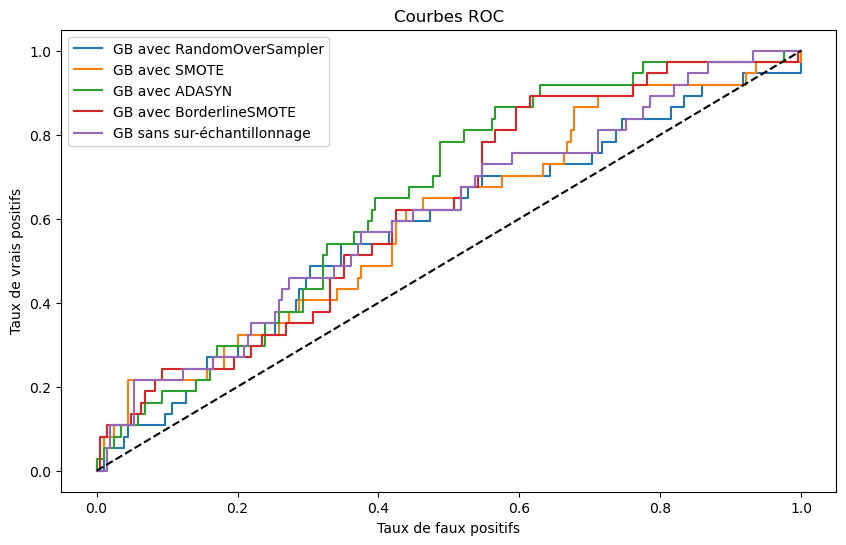

In [124]:
# Courbes ROC

fpr_gb_randomoversampler_cv, tpr_gb_randomoversampler_cv, _ = roc_curve(y_test, y_proba_gb_randomoversampler_cv)
fpr_gb_smote_cv, tpr_gb_smote_cv, _ = roc_curve(y_test, y_proba_gb_smote_cv)
fpr_gb_adasyn_cv, tpr_gb_adasyn_cv, _ = roc_curve(y_test, y_proba_gb_adasyn_cv)
fpr_gb_borderline_smote_cv, tpr_gb_borderline_smote_cv, _ = roc_curve(y_test, y_proba_gb_borderline_smote_cv)
fpr_gb_cv, tpr_gb_cv, _ = roc_curve(y_test, y_proba_gb_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb_randomoversampler_cv, tpr_gb_randomoversampler_cv, label='GB avec RandomOverSampler')
plt.plot(fpr_gb_smote_cv, tpr_gb_smote_cv, label='GB avec SMOTE')
plt.plot(fpr_gb_adasyn_cv, tpr_gb_adasyn_cv, label='GB avec ADASYN')
plt.plot(fpr_gb_borderline_smote_cv, tpr_gb_borderline_smote_cv, label='GB avec BorderlineSMOTE')
plt.plot(fpr_gb_cv, tpr_gb_cv, label='GB sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_gb_cv.png')

plt.show()


### E) Importance des variables

In [125]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_gb_randomoversampler = grille_recherche_gb_randomoversampler.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_smote = grille_recherche_gb_smote.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_adasyn = grille_recherche_gb_adasyn.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_borderline_smote = grille_recherche_gb_borderline_smote.best_estimator_.named_steps['gb'].feature_importances_
importances_gb = grille_recherche_gb.best_estimator_.named_steps['gb'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_gb_randomoversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_randomoversampler
})

resultats_importance_variables_gb_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_smote
})

resultats_importance_variables_gb_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_adasyn
})

resultats_importance_variables_gb_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_borderline_smote
})

resultats_importance_variables_gb = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb
})

# Affichage des résultats
resultats_importance_variables_gb_randomoversampler = resultats_importance_variables_gb_randomoversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_smote = resultats_importance_variables_gb_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_adasyn = resultats_importance_variables_gb_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_borderline_smote = resultats_importance_variables_gb_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_gb = resultats_importance_variables_gb.sort_values(by="Importance", ascending=False)

resultats_importance_variables_gb_randomoversampler

Variable    Importance
18                               p_pop  8.971966e-02
20  com_variation_encours_dette_ha_pct  7.520018e-02
27             part_licencies_sportifs  5.845338e-02
4             moyenne_conso_totale_hab  5.463548e-02
22                         part_actifs  5.452416e-02
12                        superf_choro  5.259047e-02
21                       part_inactifs  5.225300e-02
6                nb_actes_france_renov  5.222629e-02
26                   total_entreprises  5.113711e-02
16                            med_disp  4.230678e-02
24              abstention_municipales  3.957190e-02
5                        emissions_ges  3.934397e-02
9          part_residences_secondaires  3.701757e-02
28            part_jeunes_sans_diplome  3.384706e-02
15                part_trajets_voiture  3.228178e-02
2          moyenne_conso_tertiaire_hab  3.185712e-02
1              moyenne_conso_indus_hab  2.890325e-02
0               moyenne_conso_agri_hab  2.832617e-02
3        moyenne_conso_residentiel_hab  2.645058e-02
11                            gridens7  2.602912e-02
19                           CSP_maire  2.364088e-02
25                   taux_creation_ent  2.056802e-02
23                      dependance_eco  1.911668e-02
7                               friche  1.339371e-02
13                         departement  1.029304e-02
10                   beneficiaire_prog  2.638640e-03
30                     climat_Estuaire  2.535353e-03
14                            gare_tgv  9.277265e-04
8                         ecoquartiers  1.957242e-04
31                          climat_Mer  1.423956e-05
29                        climat_Autre  9.480191e-07
17                                  an  0.000000e+00

In [126]:
resultats_importance_variables_gb_smote

Variable  Importance
7                               friche    0.102006
13                         departement    0.093402
6                nb_actes_france_renov    0.068384
21                       part_inactifs    0.058943
12                        superf_choro    0.056665
1              moyenne_conso_indus_hab    0.050164
18                               p_pop    0.048056
11                            gridens7    0.046877
20  com_variation_encours_dette_ha_pct    0.044925
19                           CSP_maire    0.041580
24              abstention_municipales    0.035807
22                         part_actifs    0.033753
25                   taux_creation_ent    0.033712
27             part_licencies_sportifs    0.033619
3        moyenne_conso_residentiel_hab    0.030906
4             moyenne_conso_totale_hab    0.029614
16                            med_disp    0.029183
2          moyenne_conso_tertiaire_hab    0.025382
5                        emissions_ges    0.023080
9          part_residences_secondaires    0.021801
28            part_jeunes_sans_diplome    0.020901
0               moyenne_conso_agri_hab    0.017624
15                part_trajets_voiture    0.017279
26                   total_entreprises    0.015539
23                      dependance_eco    0.011356
14                            gare_tgv    0.004652
30                     climat_Estuaire    0.001761
8                         ecoquartiers    0.001025
29                        climat_Autre    0.000784
10                   beneficiaire_prog    0.000644
31                          climat_Mer    0.000577
17                                  an    0.000000

In [127]:
resultats_importance_variables_gb_adasyn

Variable  Importance
7                               friche    0.177000
1              moyenne_conso_indus_hab    0.106387
13                         departement    0.081759
20  com_variation_encours_dette_ha_pct    0.049474
6                nb_actes_france_renov    0.046894
21                       part_inactifs    0.040759
11                            gridens7    0.038785
26                   total_entreprises    0.033583
24              abstention_municipales    0.033223
22                         part_actifs    0.033201
19                           CSP_maire    0.033067
12                        superf_choro    0.028261
5                        emissions_ges    0.028118
28            part_jeunes_sans_diplome    0.028064
18                               p_pop    0.026202
2          moyenne_conso_tertiaire_hab    0.024934
25                   taux_creation_ent    0.023943
23                      dependance_eco    0.023775
15                part_trajets_voiture    0.023028
4             moyenne_conso_totale_hab    0.022739
3        moyenne_conso_residentiel_hab    0.021372
27             part_licencies_sportifs    0.017627
9          part_residences_secondaires    0.016677
16                            med_disp    0.016153
0               moyenne_conso_agri_hab    0.014936
31                          climat_Mer    0.002726
29                        climat_Autre    0.001806
30                     climat_Estuaire    0.001780
14                            gare_tgv    0.001714
10                   beneficiaire_prog    0.001263
8                         ecoquartiers    0.000749
17                                  an    0.000000

In [128]:
resultats_importance_variables_gb_adasyn

Variable  Importance
7                               friche    0.177000
1              moyenne_conso_indus_hab    0.106387
13                         departement    0.081759
20  com_variation_encours_dette_ha_pct    0.049474
6                nb_actes_france_renov    0.046894
21                       part_inactifs    0.040759
11                            gridens7    0.038785
26                   total_entreprises    0.033583
24              abstention_municipales    0.033223
22                         part_actifs    0.033201
19                           CSP_maire    0.033067
12                        superf_choro    0.028261
5                        emissions_ges    0.028118
28            part_jeunes_sans_diplome    0.028064
18                               p_pop    0.026202
2          moyenne_conso_tertiaire_hab    0.024934
25                   taux_creation_ent    0.023943
23                      dependance_eco    0.023775
15                part_trajets_voiture    0.023028
4             moyenne_conso_totale_hab    0.022739
3        moyenne_conso_residentiel_hab    0.021372
27             part_licencies_sportifs    0.017627
9          part_residences_secondaires    0.016677
16                            med_disp    0.016153
0               moyenne_conso_agri_hab    0.014936
31                          climat_Mer    0.002726
29                        climat_Autre    0.001806
30                     climat_Estuaire    0.001780
14                            gare_tgv    0.001714
10                   beneficiaire_prog    0.001263
8                         ecoquartiers    0.000749
17                                  an    0.000000

In [129]:
resultats_importance_variables_gb

Variable    Importance
0               moyenne_conso_agri_hab  4.729629e-02
1              moyenne_conso_indus_hab  4.251887e-02
2          moyenne_conso_tertiaire_hab  5.767267e-02
3        moyenne_conso_residentiel_hab  3.293845e-02
4             moyenne_conso_totale_hab  3.513327e-02
5                        emissions_ges  3.694496e-02
6                nb_actes_france_renov  7.003928e-02
7                               friche  1.250202e-02
8                         ecoquartiers  1.127538e-05
9          part_residences_secondaires  3.425690e-02
10                   beneficiaire_prog  2.099272e-03
11                            gridens7  2.996230e-03
12                        superf_choro  6.115282e-02
13                         departement  6.712681e-03
14                            gare_tgv  6.876101e-03
15                part_trajets_voiture  3.847374e-02
16                            med_disp  4.328745e-02
17                                  an  0.000000e+00
18                               p_pop  7.694596e-02
19                           CSP_maire  2.634417e-02
20  com_variation_encours_dette_ha_pct  6.270108e-02
21                       part_inactifs  7.402915e-02
22                         part_actifs  4.050528e-02
23                      dependance_eco  1.588194e-02
24              abstention_municipales  3.471655e-02
25                   taux_creation_ent  1.633174e-02
26                   total_entreprises  2.754180e-02
27             part_licencies_sportifs  5.403450e-02
28            part_jeunes_sans_diplome  3.196731e-02
29                        climat_Autre  3.117250e-03
30                     climat_Estuaire  4.970770e-03
31                          climat_Mer  2.234366e-07

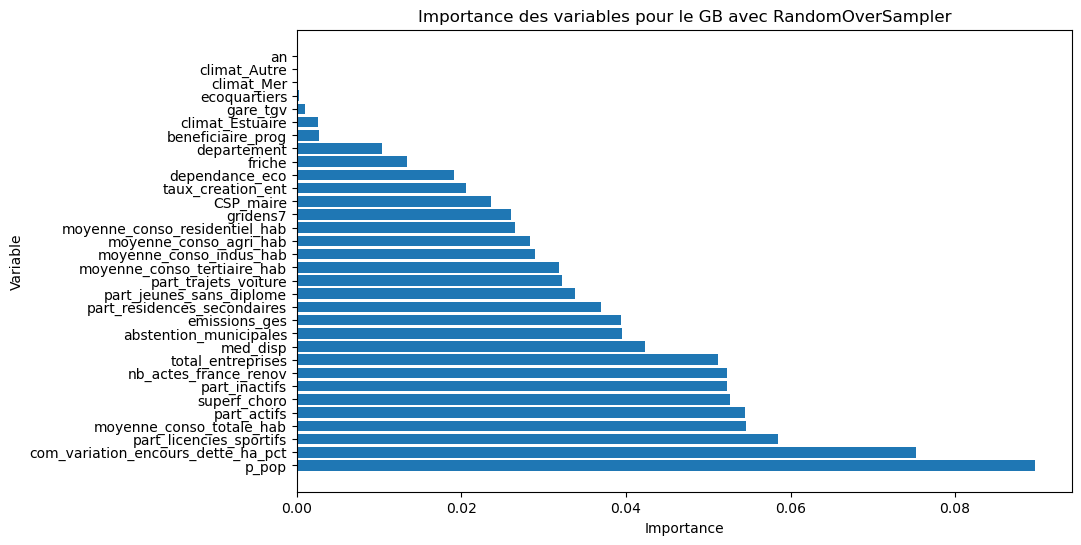

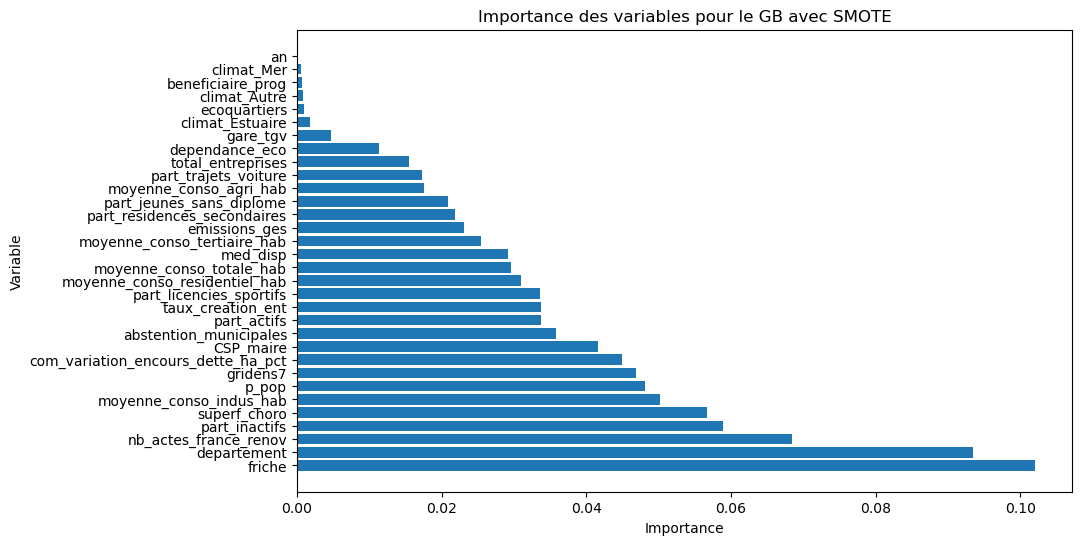

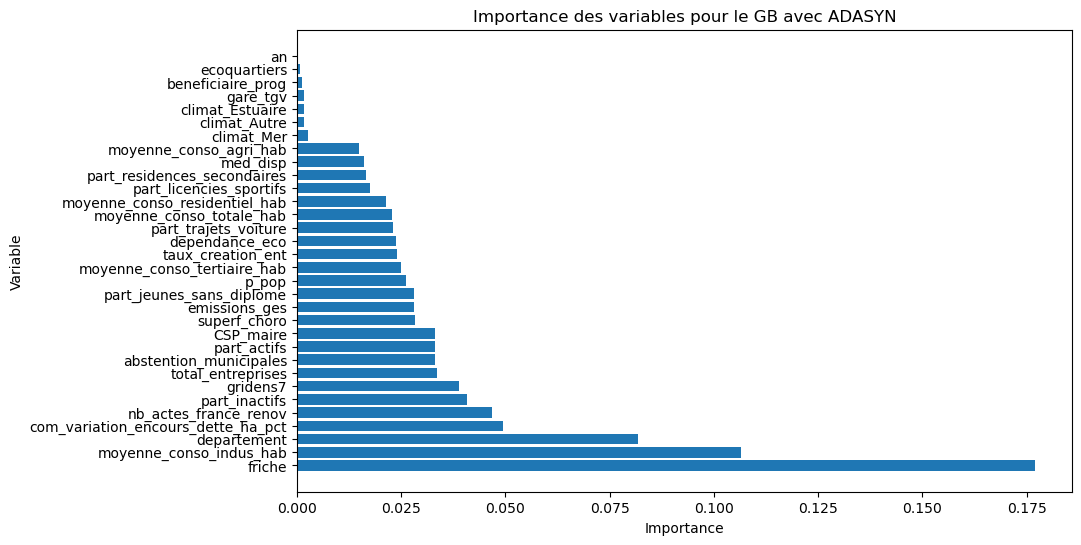

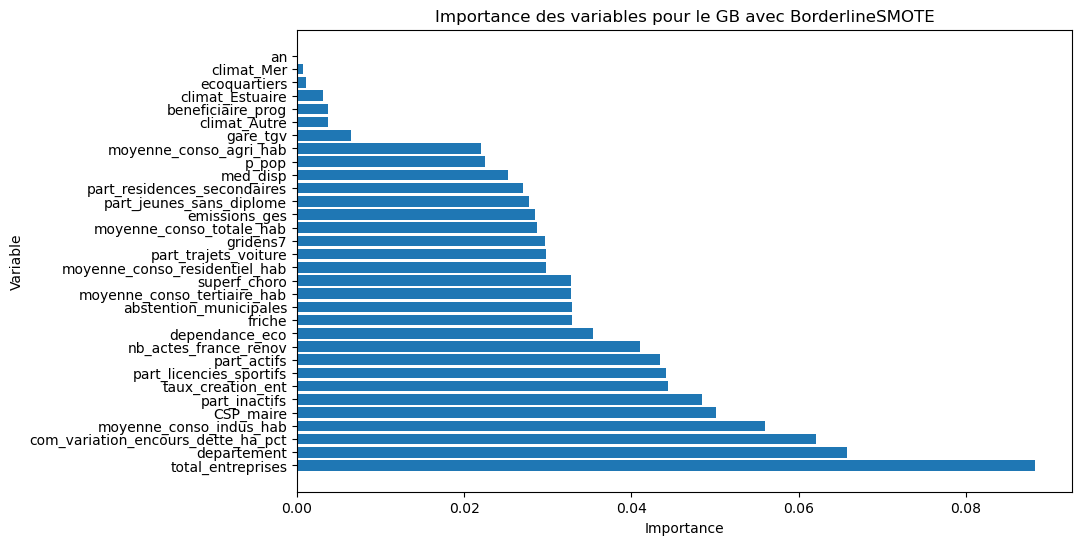

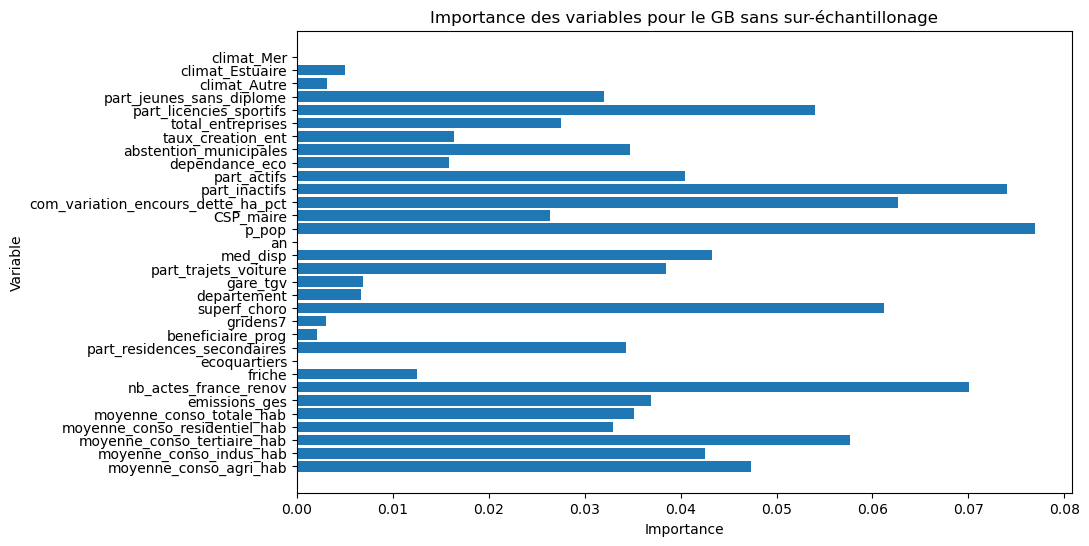

In [130]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_randomoversampler['Variable'], resultats_importance_variables_gb_randomoversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_smote['Variable'], resultats_importance_variables_gb_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_adasyn['Variable'], resultats_importance_variables_gb_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_borderline_smote['Variable'], resultats_importance_variables_gb_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb['Variable'], resultats_importance_variables_gb['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB sans sur-échantillonage')
plt.show()

## I.2.5. Adaboost

### A) Construction des modèles

In [131]:
# Construction des modèles
from sklearn.ensemble import AdaBoostClassifier

etapes_adaboost_randomoversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

etapes_adaboost_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

etapes_adaboost_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

etapes_adaboost_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

etapes_adaboost = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

modele_adaboost_randomoversampler = Pipeline(steps=etapes_adaboost_randomoversampler) # Création du pipeline
modele_adaboost_smote = Pipeline(steps=etapes_adaboost_smote) # Création du pipeline
modele_adaboost_adasyn = Pipeline(steps=etapes_adaboost_adasyn) # Création du pipeline
modele_adaboost_borderline_smote = Pipeline(steps=etapes_adaboost_borderline_smote) # Création du pipeline
modele_adaboost = Pipeline(steps=etapes_adaboost) # Création du pipeline

In [132]:
modele_adaboost_randomoversampler.fit(X_train, y_train) # Entraînement
modele_adaboost_smote.fit(X_train, y_train) # Entraînement
modele_adaboost_adasyn.fit(X_train, y_train) # Entraînement
modele_adaboost_borderline_smote.fit(X_train, y_train) # Entraînement
modele_adaboost.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('adaboost', AdaBoostClassifier())])

In [133]:
# Prédictions

y_proba_adaboost_randomoversampler = modele_adaboost_randomoversampler.predict_proba(X_test)[:, 1]
y_pred_adaboost_randomoversampler = modele_adaboost_randomoversampler.predict(X_test)

y_proba_adaboost_smote = modele_adaboost_smote.predict_proba(X_test)[:, 1]
y_pred_adaboost_smote = modele_adaboost_smote.predict(X_test)

y_proba_adaboost_adasyn = modele_adaboost_adasyn.predict_proba(X_test)[:, 1]
y_pred_adaboost_adasyn = modele_adaboost_adasyn.predict(X_test)

y_proba_adaboost_borderline_smote = modele_adaboost_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_adaboost_borderline_smote = modele_adaboost_borderline_smote.predict(X_test)

y_proba_adaboost = modele_adaboost.predict_proba(X_test)[:, 1]
y_pred_adaboost = modele_adaboost.predict(X_test)

In [134]:
print(f'y_test shape: {y_test.shape}')
print(f'y_proba_adaboost_randomoversampler shape: {y_proba_adaboost_randomoversampler.shape}')
print(f'y_proba_adaboost_smote shape: {y_proba_adaboost_smote.shape}')
print(f'y_proba_adaboost_adasyn shape: {y_proba_adaboost_adasyn.shape}')
print(f'y_proba_adaboost_borderline_smote shape: {y_proba_adaboost_borderline_smote.shape}')
print(f'y_proba_adaboost shape: {y_proba_adaboost.shape}')


y_test shape: (242,)
y_proba_adaboost_randomoversampler shape: (242,)
y_proba_adaboost_smote shape: (242,)
y_proba_adaboost_adasyn shape: (242,)
y_proba_adaboost_borderline_smote shape: (242,)
y_proba_adaboost shape: (242,)


### B) Mesure de la performance des modèles initiaux

In [135]:
# Calcul des métriques

auc_roc_adaboost_randomoversampler = roc_auc_score(y_test, y_proba_adaboost_randomoversampler)
auc_pr_adaboost_randomoversampler = average_precision_score(y_test, y_proba_adaboost_randomoversampler)
log_loss_value_adaboost_randomoversampler = log_loss(y_test, y_proba_adaboost_randomoversampler)
precision_adaboost_randomoversampler = precision_score(y_test, y_pred_adaboost_randomoversampler)
recall_adaboost_randomoversampler = recall_score(y_test, y_pred_adaboost_randomoversampler)
f1_adaboost_randomoversampler = f1_score(y_test, y_pred_adaboost_randomoversampler)
mcc_adaboost_randomoversampler = matthews_corrcoef(y_test, y_pred_adaboost_randomoversampler)
balanced_acc_adaboost_randomoversampler = balanced_accuracy_score(y_test, y_pred_adaboost_randomoversampler)
specificity_adaboost_randomoversampler = confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 1])
cohen_kappa_adaboost_randomoversampler = cohen_kappa_score(y_test, y_pred_adaboost_randomoversampler)

auc_roc_adaboost_smote = roc_auc_score(y_test, y_proba_adaboost_smote)
auc_pr_adaboost_smote = average_precision_score(y_test, y_proba_adaboost_smote)
log_loss_value_adaboost_smote = log_loss(y_test, y_proba_adaboost_smote)
precision_adaboost_smote = precision_score(y_test, y_pred_adaboost_smote)
recall_adaboost_smote = recall_score(y_test, y_pred_adaboost_smote)
f1_adaboost_smote = f1_score(y_test, y_pred_adaboost_smote)
mcc_adaboost_smote = matthews_corrcoef(y_test, y_pred_adaboost_smote)
balanced_acc_adaboost_smote = balanced_accuracy_score(y_test, y_pred_adaboost_smote)
specificity_adaboost_smote = confusion_matrix(y_test, y_pred_adaboost_smote)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_smote)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_smote)[0, 1])
cohen_kappa_adaboost_smote = cohen_kappa_score(y_test, y_pred_adaboost_smote)

auc_roc_adaboost_adasyn = roc_auc_score(y_test, y_proba_adaboost_adasyn)
auc_pr_adaboost_adasyn = average_precision_score(y_test, y_proba_adaboost_adasyn)
log_loss_value_adaboost_adasyn = log_loss(y_test, y_proba_adaboost_adasyn)
precision_adaboost_adasyn = precision_score(y_test, y_pred_adaboost_adasyn)
recall_adaboost_adasyn = recall_score(y_test, y_pred_adaboost_adasyn)
f1_adaboost_adasyn = f1_score(y_test, y_pred_adaboost_adasyn)
mcc_adaboost_adasyn = matthews_corrcoef(y_test, y_pred_adaboost_adasyn)
balanced_acc_adaboost_adasyn = balanced_accuracy_score(y_test, y_pred_adaboost_adasyn)
specificity_adaboost_adasyn = confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 1])
cohen_kappa_adaboost_adasyn = cohen_kappa_score(y_test, y_pred_adaboost_adasyn)

auc_roc_adaboost_borderline_smote = roc_auc_score(y_test, y_proba_adaboost_borderline_smote)
auc_pr_adaboost_borderline_smote = average_precision_score(y_test, y_proba_adaboost_borderline_smote)
log_loss_value_adaboost_borderline_smote = log_loss(y_test, y_proba_adaboost_borderline_smote)
precision_adaboost_borderline_smote = precision_score(y_test, y_pred_adaboost_borderline_smote)
recall_adaboost_borderline_smote = recall_score(y_test, y_pred_adaboost_borderline_smote)
f1_adaboost_borderline_smote = f1_score(y_test, y_pred_adaboost_borderline_smote)
mcc_adaboost_borderline_smote = matthews_corrcoef(y_test, y_pred_adaboost_borderline_smote)
balanced_acc_adaboost_borderline_smote = balanced_accuracy_score(y_test, y_pred_adaboost_borderline_smote)
specificity_adaboost_borderline_smote = confusion_matrix(y_test, y_pred_adaboost_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_borderline_smote)[0, 1])
cohen_kappa_adaboost_borderline_smote = cohen_kappa_score(y_test, y_pred_adaboost_borderline_smote)

auc_roc_adaboost = roc_auc_score(y_test, y_proba_adaboost)
auc_pr_adaboost = average_precision_score(y_test, y_proba_adaboost)
log_loss_value_adaboost = log_loss(y_test, y_proba_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)
mcc_adaboost = matthews_corrcoef(y_test, y_pred_adaboost)
balanced_acc_adaboost = balanced_accuracy_score(y_test, y_pred_adaboost)
specificity_adaboost = confusion_matrix(y_test, y_pred_adaboost)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost)[0, 0] + confusion_matrix(y_test, y_pred_adaboost)[0, 1])
cohen_kappa_adaboost = cohen_kappa_score(y_test, y_pred_adaboost)

In [136]:
# Affichage des résultats

resultats_adaboost = pd.DataFrame({
    "AdaBoost sans sur-échantillonnage": [auc_roc_adaboost, auc_pr_adaboost, f1_adaboost, balanced_acc_adaboost],
    "AdaBoost avec SMOTE": [auc_roc_adaboost_smote, auc_pr_adaboost_smote, f1_adaboost_smote, balanced_acc_adaboost_smote],
    "AdaBoost avec RandomOverSampler": [auc_roc_adaboost_randomoversampler, auc_pr_adaboost_randomoversampler, f1_adaboost_randomoversampler, balanced_acc_adaboost_randomoversampler],
    "AdaBoost avec ADASYN": [auc_roc_adaboost_adasyn, auc_pr_adaboost_adasyn, f1_adaboost_adasyn, balanced_acc_adaboost_adasyn],
    "AdaBoost avec BorderlineSMOTE": [auc_roc_adaboost_borderline_smote, auc_pr_adaboost_borderline_smote, f1_adaboost_borderline_smote, balanced_acc_adaboost_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_adaboost = resultats_adaboost.round(3)
resultats_adaboost

AdaBoost sans sur-échantillonnage  AdaBoost avec SMOTE  \
AUC-ROC                                        0.628                0.589   
AUC-PR                                         0.270                0.204   
F1-score                                       0.197                0.218   
Balanced accuracy                              0.537                0.519   

                   AdaBoost avec RandomOverSampler  AdaBoost avec ADASYN  \
AUC-ROC                                      0.638                 0.635   
AUC-PR                                       0.274                 0.229   
F1-score                                     0.331                 0.275   
Balanced accuracy                            0.617                 0.565   

                   AdaBoost avec BorderlineSMOTE  
AUC-ROC                                    0.607  
AUC-PR                                     0.205  
F1-score                                   0.300  
Balanced accuracy                          0.586

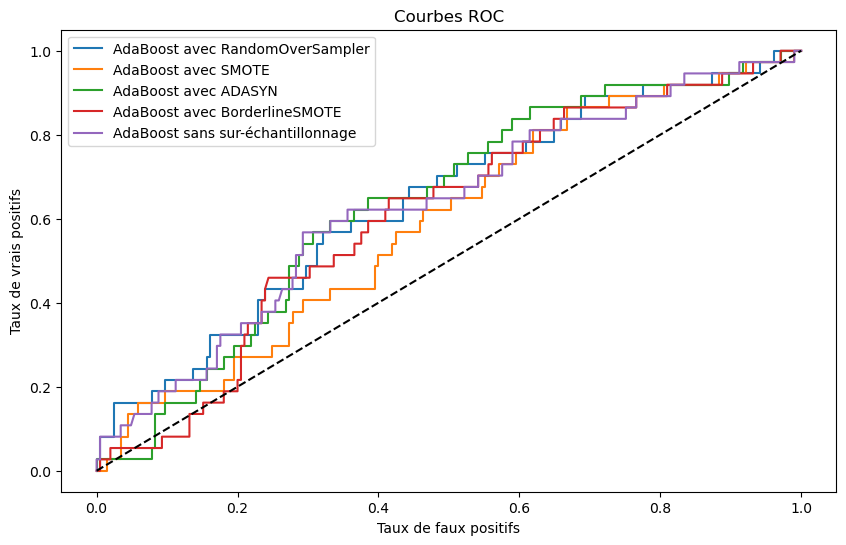

In [137]:
# Courbes ROC

fpr_adaboost_randomoversampler, tpr_adaboost_randomoversampler, _ = roc_curve(y_test, y_proba_adaboost_randomoversampler)
fpr_adaboost_smote, tpr_adaboost_smote, _ = roc_curve(y_test, y_proba_adaboost_smote)
fpr_adaboost_adasyn, tpr_adaboost_adasyn, _ = roc_curve(y_test, y_proba_adaboost_adasyn)
fpr_adaboost_borderline_smote, tpr_adaboost_borderline_smote, _ = roc_curve(y_test, y_proba_adaboost_borderline_smote)
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_proba_adaboost)

plt.figure(figsize=(10, 6))
plt.plot(fpr_adaboost_randomoversampler, tpr_adaboost_randomoversampler, label='AdaBoost avec RandomOverSampler')
plt.plot(fpr_adaboost_smote, tpr_adaboost_smote, label='AdaBoost avec SMOTE')
plt.plot(fpr_adaboost_adasyn, tpr_adaboost_adasyn, label='AdaBoost avec ADASYN')
plt.plot(fpr_adaboost_borderline_smote, tpr_adaboost_borderline_smote, label='AdaBoost avec BorderlineSMOTE')
plt.plot(fpr_adaboost, tpr_adaboost, label='AdaBoost sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_adaboost.png')

plt.show()


### C) Ajustement des hyperparamètres

In [138]:
# Ajustement des hyperparamètres par validation croisée

# Définition de la grille des hyperparamètres pour le AdaBoost

param_grid_adaboost_oversampler = {
    'oversampler__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1.0],
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500], # Nombre d'arbres
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], # Taux d'apprentissage
}

param_grid_adaboost_smote = {
    'smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'smote__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1.0], # Stratégie de sur-échantillonnage
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500], # Nombre d'arbres
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], # Taux d'apprentissage
}

param_grid_adaboost_adasyn = {
    'adasyn__n_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'adasyn__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1.0], # Stratégie de sur-échantillonnage
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500], # Nombre d'arbres
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], # Taux d'apprentissage
}

param_grid_adaboost_borderline_smote = {
    'borderline_smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'borderline_smote__sampling_strategy': ['auto', 0.2, 0.4, 0.5, 0.75, 1.0], # Stratégie de sur-échantillonnage
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500], # Nombre d'arbres
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], # Taux d'apprentissage
}

param_grid_adaboost = {
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500], # Nombre d'arbres
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], # Taux d'apprentissage
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score),
    'AUC': make_scorer(roc_auc_score),
}


In [139]:
# Ajustement des hyperparamètres

grille_recherche_adaboost_randomoversampler = RandomizedSearchCV(modele_adaboost_randomoversampler, param_grid_adaboost_oversampler, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)
grille_recherche_adaboost_smote = RandomizedSearchCV(modele_adaboost_smote, param_grid_adaboost_smote, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_adaboost_adasyn = RandomizedSearchCV(modele_adaboost_adasyn, param_grid_adaboost_adasyn, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_adaboost_borderline_smote = RandomizedSearchCV(modele_adaboost_borderline_smote, param_grid_adaboost_borderline_smote, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_adaboost = RandomizedSearchCV(modele_adaboost, param_grid_adaboost, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)

In [140]:
# Sélection du meilleur modèle

modele_adaboost_randomoversampler_opt = grille_recherche_adaboost_randomoversampler.fit(X_train, y_train).best_estimator_

In [141]:
modele_adaboost_smote_opt = grille_recherche_adaboost_smote.fit(X_train, y_train).best_estimator_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y,

In [142]:
modele_adaboost_adasyn_opt = grille_recherche_adaboost_adasyn.fit(X_train, y_train).best_estimator_

In [143]:
modele_adaboost_borderline_smote_opt = grille_recherche_adaboost_borderline_smote.fit(X_train, y_train).best_estimator_

In [144]:
modele_adaboost_opt = grille_recherche_adaboost.fit(X_train, y_train).best_estimator_

In [145]:
# Prédictions

y_proba_adaboost_randomoversampler_cv = modele_adaboost_randomoversampler_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_randomoversampler_cv = modele_adaboost_randomoversampler_opt.predict(X_test)

y_proba_adaboost_smote_cv = modele_adaboost_smote_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_smote_cv = modele_adaboost_smote_opt.predict(X_test)

y_proba_adaboost_adasyn_cv = modele_adaboost_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_adasyn_cv = modele_adaboost_adasyn_opt.predict(X_test)

y_proba_adaboost_borderline_smote_cv = modele_adaboost_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_borderline_smote_cv = modele_adaboost_borderline_smote_opt.predict(X_test)

y_proba_adaboost_cv = modele_adaboost_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_cv = modele_adaboost_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [146]:
# Calcul des métriques

auc_roc_adaboost_randomoversampler_cv = roc_auc_score(y_test, y_proba_adaboost_randomoversampler_cv)
auc_pr_adaboost_randomoversampler_cv = average_precision_score(y_test, y_proba_adaboost_randomoversampler_cv)
log_loss_value_adaboost_randomoversampler_cv = log_loss(y_test, y_proba_adaboost_randomoversampler_cv)
precision_adaboost_randomoversampler_cv = precision_score(y_test, y_pred_adaboost_randomoversampler_cv)
recall_adaboost_randomoversampler_cv = recall_score(y_test, y_pred_adaboost_randomoversampler_cv)
f1_adaboost_randomoversampler_cv = f1_score(y_test, y_pred_adaboost_randomoversampler_cv)
mcc_adaboost_randomoversampler_cv = matthews_corrcoef(y_test, y_pred_adaboost_randomoversampler_cv)
balanced_acc_adaboost_randomoversampler_cv = balanced_accuracy_score(y_test, y_pred_adaboost_randomoversampler_cv)
specificity_adaboost_randomoversampler_cv = confusion_matrix(y_test, y_pred_adaboost_randomoversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_randomoversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_randomoversampler_cv)[0, 1])
cohen_kappa_adaboost_randomoversampler_cv = cohen_kappa_score(y_test, y_pred_adaboost_randomoversampler_cv)

auc_roc_adaboost_smote_cv = roc_auc_score(y_test, y_proba_adaboost_smote_cv)
auc_pr_adaboost_smote_cv = average_precision_score(y_test, y_proba_adaboost_smote_cv)
log_loss_value_adaboost_smote_cv = log_loss(y_test, y_proba_adaboost_smote_cv)
precision_adaboost_smote_cv = precision_score(y_test, y_pred_adaboost_smote_cv)
recall_adaboost_smote_cv = recall_score(y_test, y_pred_adaboost_smote_cv)
f1_adaboost_smote_cv = f1_score(y_test, y_pred_adaboost_smote_cv)
mcc_adaboost_smote_cv = matthews_corrcoef(y_test, y_pred_adaboost_smote_cv)
balanced_acc_adaboost_smote_cv = balanced_accuracy_score(y_test, y_pred_adaboost_smote_cv)
specificity_adaboost_smote_cv = confusion_matrix(y_test, y_pred_adaboost_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_smote_cv)[0, 1])
cohen_kappa_adaboost_smote_cv = cohen_kappa_score(y_test, y_pred_adaboost_smote_cv)

auc_roc_adaboost_adasyn_cv = roc_auc_score(y_test, y_proba_adaboost_adasyn_cv)
auc_pr_adaboost_adasyn_cv = average_precision_score(y_test, y_proba_adaboost_adasyn_cv)
log_loss_value_adaboost_adasyn_cv = log_loss(y_test, y_proba_adaboost_adasyn_cv)
precision_adaboost_adasyn_cv = precision_score(y_test, y_pred_adaboost_adasyn_cv)
recall_adaboost_adasyn_cv = recall_score(y_test, y_pred_adaboost_adasyn_cv)
f1_adaboost_adasyn_cv = f1_score(y_test, y_pred_adaboost_adasyn_cv)
mcc_adaboost_adasyn_cv = matthews_corrcoef(y_test, y_pred_adaboost_adasyn_cv)
balanced_acc_adaboost_adasyn_cv = balanced_accuracy_score(y_test, y_pred_adaboost_adasyn_cv)
specificity_adaboost_adasyn_cv = confusion_matrix(y_test, y_pred_adaboost_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_adasyn_cv)[0, 1])
cohen_kappa_adaboost_adasyn_cv = cohen_kappa_score(y_test, y_pred_adaboost_adasyn_cv)

auc_roc_adaboost_borderline_smote_cv = roc_auc_score(y_test, y_proba_adaboost_borderline_smote_cv)
auc_pr_adaboost_borderline_smote_cv = average_precision_score(y_test, y_proba_adaboost_borderline_smote_cv)
log_loss_value_adaboost_borderline_smote_cv = log_loss(y_test, y_proba_adaboost_borderline_smote_cv)
precision_adaboost_borderline_smote_cv = precision_score(y_test, y_pred_adaboost_borderline_smote_cv)
recall_adaboost_borderline_smote_cv = recall_score(y_test, y_pred_adaboost_borderline_smote_cv)
f1_adaboost_borderline_smote_cv = f1_score(y_test, y_pred_adaboost_borderline_smote_cv)
mcc_adaboost_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_adaboost_borderline_smote_cv)
balanced_acc_adaboost_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_adaboost_borderline_smote_cv)
specificity_adaboost_borderline_smote_cv = confusion_matrix(y_test, y_pred_adaboost_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_borderline_smote_cv)[0, 1])
cohen_kappa_adaboost_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_adaboost_borderline_smote_cv)

auc_roc_adaboost_cv = roc_auc_score(y_test, y_proba_adaboost_cv)
auc_pr_adaboost_cv = average_precision_score(y_test, y_proba_adaboost_cv)
log_loss_value_adaboost_cv = log_loss(y_test, y_proba_adaboost_cv)
precision_adaboost_cv = precision_score(y_test, y_pred_adaboost_cv)
recall_adaboost_cv = recall_score(y_test, y_pred_adaboost_cv)
f1_adaboost_cv = f1_score(y_test, y_pred_adaboost_cv)
mcc_adaboost_cv = matthews_corrcoef(y_test, y_pred_adaboost_cv)
balanced_acc_adaboost_cv = balanced_accuracy_score(y_test, y_pred_adaboost_cv)
specificity_adaboost_cv = confusion_matrix(y_test, y_pred_adaboost_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_cv)[0, 1])
cohen_kappa_adaboost_cv = cohen_kappa_score(y_test, y_pred_adaboost_cv)

In [147]:
# Affichage des résultats

resultats_adaboost_cv = pd.DataFrame({
    "AdaBoost sans sur-échantillonnage": [auc_roc_adaboost_cv, auc_pr_adaboost_cv, f1_adaboost_cv, balanced_acc_adaboost_cv],
    "AdaBoost avec SMOTE": [auc_roc_adaboost_smote_cv, auc_pr_adaboost_smote_cv, f1_adaboost_smote_cv, balanced_acc_adaboost_smote_cv],
    "AdaBoost avec RandomOverSampler": [auc_roc_adaboost_randomoversampler_cv, auc_pr_adaboost_randomoversampler_cv, f1_adaboost_randomoversampler_cv, balanced_acc_adaboost_randomoversampler_cv],
    "AdaBoost avec ADASYN": [auc_roc_adaboost_adasyn_cv, auc_pr_adaboost_adasyn_cv, f1_adaboost_adasyn_cv, balanced_acc_adaboost_adasyn_cv],
    "AdaBoost avec BorderlineSMOTE": [auc_roc_adaboost_borderline_smote_cv, auc_pr_adaboost_borderline_smote_cv, f1_adaboost_borderline_smote_cv, balanced_acc_adaboost_borderline_smote_cv]
    },
    index = ["AUC-ROC", "AUC-PR", "F1-score", "Balanced accuracy"]
)
# Arrondir les résultats à 3 chiffres après la virgule
resultats_adaboost_cv = resultats_adaboost_cv.round(3)
resultats_adaboost_cv

AdaBoost sans sur-échantillonnage  AdaBoost avec SMOTE  \
AUC-ROC                                        0.619                0.617   
AUC-PR                                         0.255                0.200   
F1-score                                       0.182                0.259   
Balanced accuracy                              0.536                0.550   

                   AdaBoost avec RandomOverSampler  AdaBoost avec ADASYN  \
AUC-ROC                                      0.626                 0.622   
AUC-PR                                       0.202                 0.223   
F1-score                                     0.321                 0.283   
Balanced accuracy                            0.607                 0.571   

                   AdaBoost avec BorderlineSMOTE  
AUC-ROC                                    0.650  
AUC-PR                                     0.279  
F1-score                                   0.306  
Balanced accuracy                          0.591

In [148]:
# Export 
resultats_adaboost_cv.to_csv("data/resultats_adaboost_cv.csv", index=True)
latex_table_adaboost = resultats_adaboost_cv.to_latex(index=True)
print(latex_table_adaboost)

\begin{tabular}{lrrrrr}
\toprule
 & AdaBoost sans sur-échantillonnage & AdaBoost avec SMOTE & AdaBoost avec RandomOverSampler & AdaBoost avec ADASYN & AdaBoost avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.619000 & 0.617000 & 0.626000 & 0.622000 & 0.650000 \\
AUC-PR & 0.255000 & 0.200000 & 0.202000 & 0.223000 & 0.279000 \\
F1-score & 0.182000 & 0.259000 & 0.321000 & 0.283000 & 0.306000 \\
Balanced accuracy & 0.536000 & 0.550000 & 0.607000 & 0.571000 & 0.591000 \\
\bottomrule
\end{tabular}



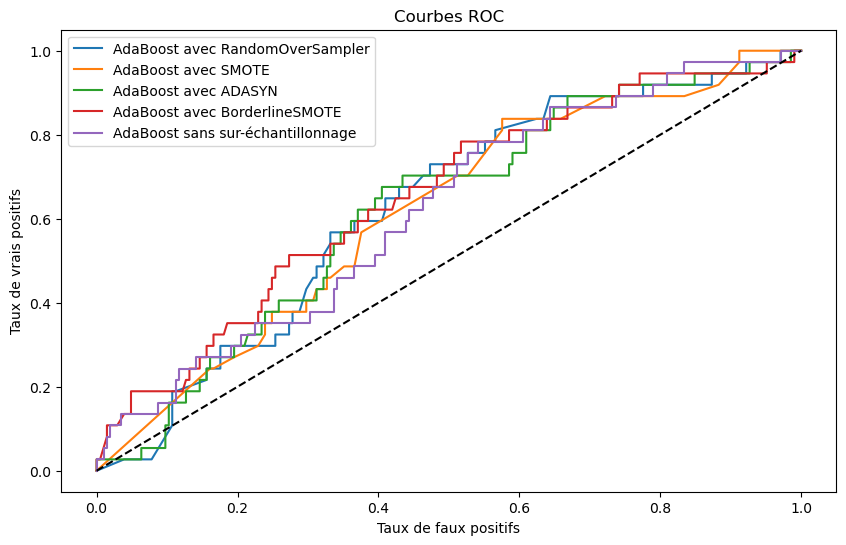

In [149]:
# Courbes ROC

fpr_adaboost_randomoversampler_cv, tpr_adaboost_randomoversampler_cv, _ = roc_curve(y_test, y_proba_adaboost_randomoversampler_cv)
fpr_adaboost_smote_cv, tpr_adaboost_smote_cv, _ = roc_curve(y_test, y_proba_adaboost_smote_cv)
fpr_adaboost_adasyn_cv, tpr_adaboost_adasyn_cv, _ = roc_curve(y_test, y_proba_adaboost_adasyn_cv)
fpr_adaboost_borderline_smote_cv, tpr_adaboost_borderline_smote_cv, _ = roc_curve(y_test, y_proba_adaboost_borderline_smote_cv)
fpr_adaboost_cv, tpr_adaboost_cv, _ = roc_curve(y_test, y_proba_adaboost_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_adaboost_randomoversampler_cv, tpr_adaboost_randomoversampler_cv, label='AdaBoost avec RandomOverSampler')
plt.plot(fpr_adaboost_smote_cv, tpr_adaboost_smote_cv, label='AdaBoost avec SMOTE')
plt.plot(fpr_adaboost_adasyn_cv, tpr_adaboost_adasyn_cv, label='AdaBoost avec ADASYN')
plt.plot(fpr_adaboost_borderline_smote_cv, tpr_adaboost_borderline_smote_cv, label='AdaBoost avec BorderlineSMOTE')
plt.plot(fpr_adaboost_cv, tpr_adaboost_cv, label='AdaBoost sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

# Export de l'image
plt.savefig('data/Courbes_ROC_adaboost_cv.png')

plt.show()

### E) Importance des variables

In [150]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_adaboost_randomoversampler = modele_adaboost_randomoversampler_opt.named_steps['adaboost'].feature_importances_
importances_adaboost_smote = modele_adaboost_smote_opt.named_steps['adaboost'].feature_importances_
importances_adaboost_adasyn = modele_adaboost_adasyn_opt.named_steps['adaboost'].feature_importances_
importances_adaboost_borderline_smote = modele_adaboost_borderline_smote_opt.named_steps['adaboost'].feature_importances_
importances_adaboost = modele_adaboost_opt.named_steps['adaboost'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_adaboost_randomoversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_randomoversampler
})

resultats_importance_variables_adaboost_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_smote
})

resultats_importance_variables_adaboost_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_adasyn
})

resultats_importance_variables_adaboost_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_borderline_smote
})

resultats_importance_variables_adaboost = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost
})

# Affichage des résultats
resultats_importance_variables_adaboost_randomoversampler = resultats_importance_variables_adaboost_randomoversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_smote = resultats_importance_variables_adaboost_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_adasyn = resultats_importance_variables_adaboost_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_borderline_smote = resultats_importance_variables_adaboost_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost = resultats_importance_variables_adaboost.sort_values(by="Importance", ascending=False)

resultats_importance_variables_adaboost_randomoversampler

Variable  Importance
22                         part_actifs        0.30
18                               p_pop        0.16
26                   total_entreprises        0.12
24              abstention_municipales        0.08
21                       part_inactifs        0.08
12                        superf_choro        0.08
20  com_variation_encours_dette_ha_pct        0.06
5                        emissions_ges        0.06
6                nb_actes_france_renov        0.06
23                      dependance_eco        0.00
0               moyenne_conso_agri_hab        0.00
25                   taux_creation_ent        0.00
27             part_licencies_sportifs        0.00
28            part_jeunes_sans_diplome        0.00
29                        climat_Autre        0.00
30                     climat_Estuaire        0.00
19                           CSP_maire        0.00
16                            med_disp        0.00
17                                  an        0.00
1              moyenne_conso_indus_hab        0.00
15                part_trajets_voiture        0.00
14                            gare_tgv        0.00
13                         departement        0.00
11                            gridens7        0.00
10                   beneficiaire_prog        0.00
9          part_residences_secondaires        0.00
8                         ecoquartiers        0.00
7                               friche        0.00
4             moyenne_conso_totale_hab        0.00
3        moyenne_conso_residentiel_hab        0.00
2          moyenne_conso_tertiaire_hab        0.00
31                          climat_Mer        0.00

In [151]:
resultats_importance_variables_adaboost_smote

Variable  Importance
1              moyenne_conso_indus_hab        0.32
18                               p_pop        0.28
26                   total_entreprises        0.15
22                         part_actifs        0.11
6                nb_actes_france_renov        0.10
12                        superf_choro        0.03
11                            gridens7        0.01
0               moyenne_conso_agri_hab        0.00
20  com_variation_encours_dette_ha_pct        0.00
21                       part_inactifs        0.00
24              abstention_municipales        0.00
23                      dependance_eco        0.00
25                   taux_creation_ent        0.00
27             part_licencies_sportifs        0.00
28            part_jeunes_sans_diplome        0.00
29                        climat_Autre        0.00
30                     climat_Estuaire        0.00
19                           CSP_maire        0.00
16                            med_disp        0.00
17                                  an        0.00
15                part_trajets_voiture        0.00
14                            gare_tgv        0.00
13                         departement        0.00
10                   beneficiaire_prog        0.00
9          part_residences_secondaires        0.00
8                         ecoquartiers        0.00
7                               friche        0.00
5                        emissions_ges        0.00
4             moyenne_conso_totale_hab        0.00
3        moyenne_conso_residentiel_hab        0.00
2          moyenne_conso_tertiaire_hab        0.00
31                          climat_Mer        0.00

In [152]:
resultats_importance_variables_adaboost_smote

Variable  Importance
1              moyenne_conso_indus_hab        0.32
18                               p_pop        0.28
26                   total_entreprises        0.15
22                         part_actifs        0.11
6                nb_actes_france_renov        0.10
12                        superf_choro        0.03
11                            gridens7        0.01
0               moyenne_conso_agri_hab        0.00
20  com_variation_encours_dette_ha_pct        0.00
21                       part_inactifs        0.00
24              abstention_municipales        0.00
23                      dependance_eco        0.00
25                   taux_creation_ent        0.00
27             part_licencies_sportifs        0.00
28            part_jeunes_sans_diplome        0.00
29                        climat_Autre        0.00
30                     climat_Estuaire        0.00
19                           CSP_maire        0.00
16                            med_disp        0.00
17                                  an        0.00
15                part_trajets_voiture        0.00
14                            gare_tgv        0.00
13                         departement        0.00
10                   beneficiaire_prog        0.00
9          part_residences_secondaires        0.00
8                         ecoquartiers        0.00
7                               friche        0.00
5                        emissions_ges        0.00
4             moyenne_conso_totale_hab        0.00
3        moyenne_conso_residentiel_hab        0.00
2          moyenne_conso_tertiaire_hab        0.00
31                          climat_Mer        0.00

In [153]:
resultats_importance_variables_adaboost_borderline_smote

Variable  Importance
13                         departement       0.152
11                            gridens7       0.124
7                               friche       0.110
19                           CSP_maire       0.102
1              moyenne_conso_indus_hab       0.086
21                       part_inactifs       0.080
12                        superf_choro       0.068
23                      dependance_eco       0.066
26                   total_entreprises       0.064
22                         part_actifs       0.040
24              abstention_municipales       0.036
5                        emissions_ges       0.024
20  com_variation_encours_dette_ha_pct       0.022
6                nb_actes_france_renov       0.018
28            part_jeunes_sans_diplome       0.008
0               moyenne_conso_agri_hab       0.000
27             part_licencies_sportifs       0.000
29                        climat_Autre       0.000
30                     climat_Estuaire       0.000
25                   taux_creation_ent       0.000
16                            med_disp       0.000
18                               p_pop       0.000
17                                  an       0.000
15                part_trajets_voiture       0.000
14                            gare_tgv       0.000
10                   beneficiaire_prog       0.000
9          part_residences_secondaires       0.000
8                         ecoquartiers       0.000
4             moyenne_conso_totale_hab       0.000
3        moyenne_conso_residentiel_hab       0.000
2          moyenne_conso_tertiaire_hab       0.000
31                          climat_Mer       0.000

In [154]:
resultats_importance_variables_adaboost

Variable  Importance
3        moyenne_conso_residentiel_hab      0.0675
21                       part_inactifs      0.0650
5                        emissions_ges      0.0650
24              abstention_municipales      0.0600
22                         part_actifs      0.0550
27             part_licencies_sportifs      0.0525
25                   taux_creation_ent      0.0525
28            part_jeunes_sans_diplome      0.0500
20  com_variation_encours_dette_ha_pct      0.0500
2          moyenne_conso_tertiaire_hab      0.0425
16                            med_disp      0.0425
4             moyenne_conso_totale_hab      0.0400
12                        superf_choro      0.0400
6                nb_actes_france_renov      0.0350
26                   total_entreprises      0.0350
23                      dependance_eco      0.0350
1              moyenne_conso_indus_hab      0.0300
19                           CSP_maire      0.0300
13                         departement      0.0275
15                part_trajets_voiture      0.0275
9          part_residences_secondaires      0.0250
18                               p_pop      0.0250
0               moyenne_conso_agri_hab      0.0225
11                            gridens7      0.0125
14                            gare_tgv      0.0050
7                               friche      0.0050
30                     climat_Estuaire      0.0025
17                                  an      0.0000
10                   beneficiaire_prog      0.0000
8                         ecoquartiers      0.0000
29                        climat_Autre      0.0000
31                          climat_Mer      0.0000

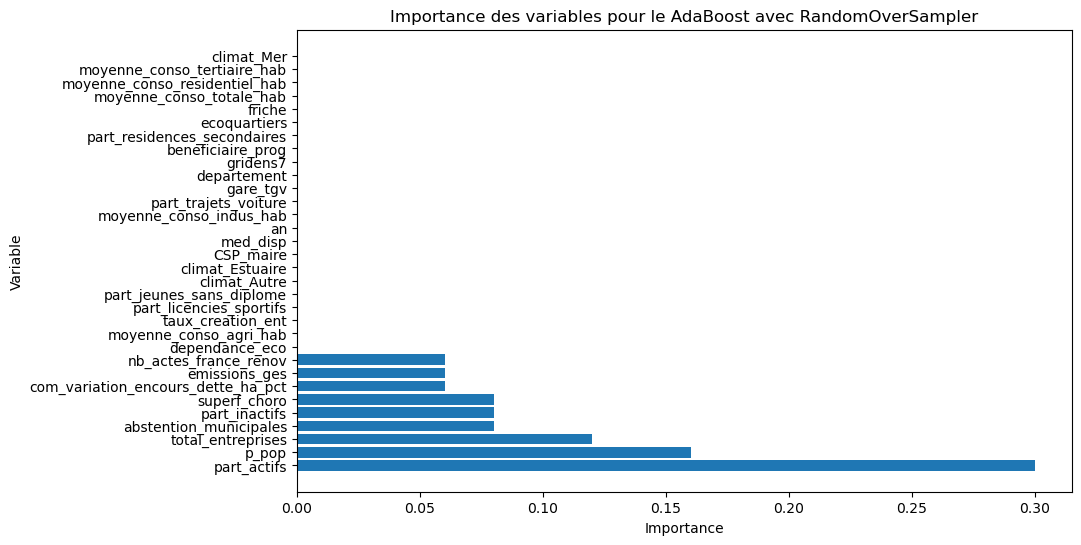

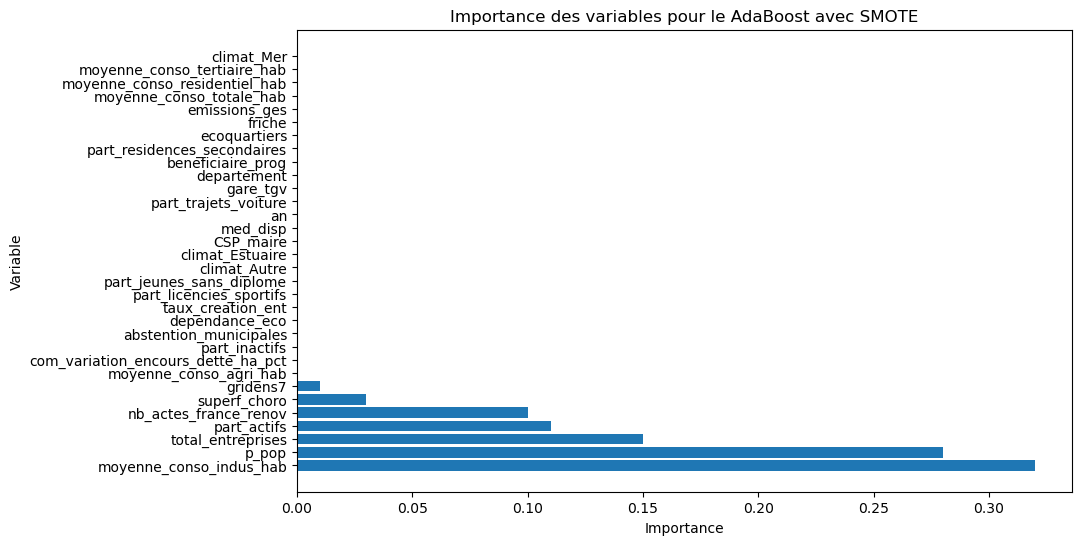

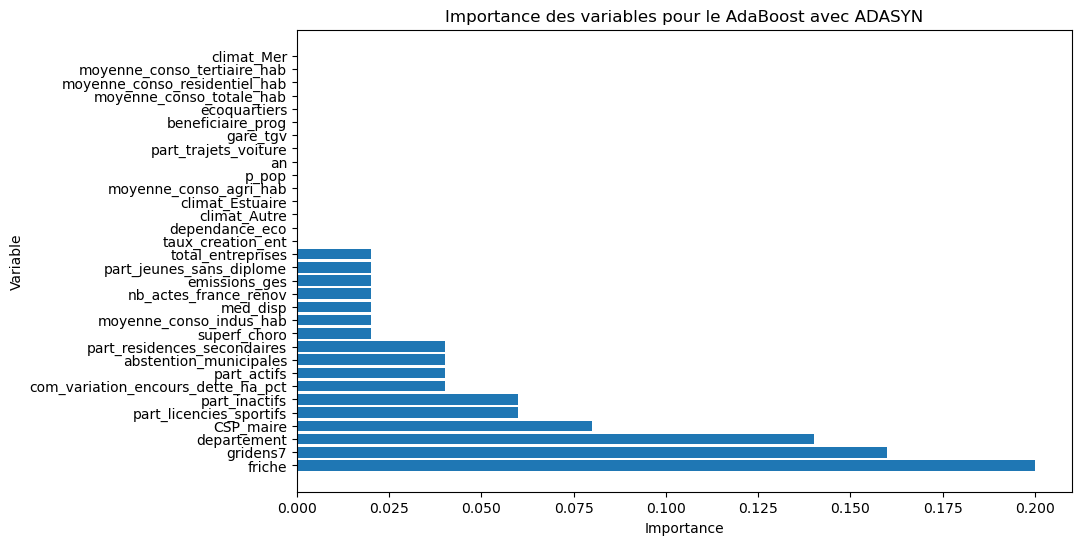

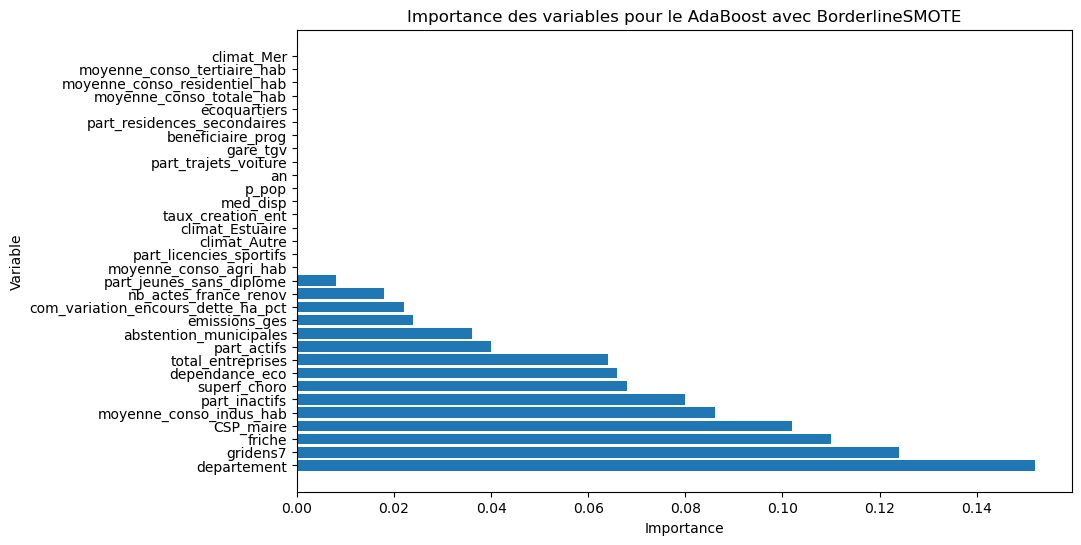

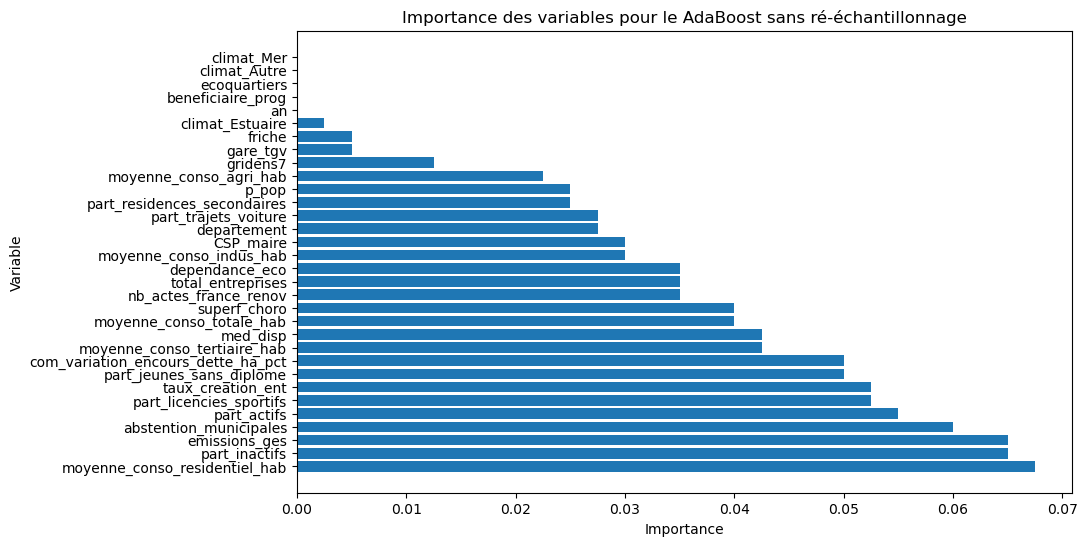

In [155]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_randomoversampler['Variable'], resultats_importance_variables_adaboost_randomoversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_smote['Variable'], resultats_importance_variables_adaboost_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_adasyn['Variable'], resultats_importance_variables_adaboost_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_borderline_smote['Variable'], resultats_importance_variables_adaboost_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost['Variable'], resultats_importance_variables_adaboost['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost sans ré-échantillonnage')
plt.show()

## I.3. Export du modèle

# II. Résultats

## II.1. Export des résultats

In [164]:
len(X)

# Je veux récupérer toutes les probabilités associées à chaque observation avec adaboost et randomoversampler
toutes_probas_communes = modele_adaboost_randomoversampler_opt.predict_proba(X)[:, 1]
len(toutes_probas_communes)


1207

In [165]:
# On récupère chaque probabilité associée à chaque commune

resultats_proba_communes = pd.DataFrame({
    "Code INSEE": X.index,
    "Probabilité": toutes_probas_communes
})
resultats_proba_communes

# Export du tableau
resultats_proba_communes.to_csv("data/resultats_proba_communes.csv", index=False)